In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')

train_df.shape,test_df.shape

((4209, 378), (4209, 377))

In [4]:
import pickle

columns_array = train_df.drop(['y'], axis=1).columns.values

filename = 'Fitted_Object/column_mapping.sav'

pickle.dump(columns_array, open(filename, 'wb')) 

#### There are total 4209 rows in train and test csv file each and 378 and 377 features in train and test csv respectively.

In [5]:
train_df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


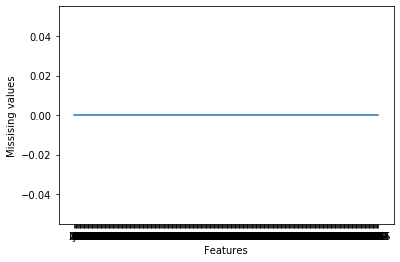

In [12]:
import matplotlib.pyplot as plt 
plt.plot(train_df.isnull().sum())
plt.xlabel("Features")
plt.ylabel("Missising values")
plt.title("")
plt.show()

### Observation

    1. Y is target variable which appears to continous random varaible.
    2. X0 - X8 seems are categorical features.
    3. X375- X385 are showing only one's and zero's values.
    4. ID consist of some discreate values lets.
    5. 1 Float, 396 int64, object 8  count for each dtype.
    6. There are no nan or missing values/Null values.
    
Lets try to explore further starting by knowing datatype of each variable.

In [16]:
### https://www.geeksforgeeks.org/python-pandas-dataframe-dtypes/
dtype_df = train_df.dtypes.reset_index()

dtype_df.columns = ['columns','columns types']

dtype_df.head(10)

,columns,columns types
0,ID,int64
1,y,float64
2,X0,object
3,X1,object
4,X2,object
5,X3,object
6,X4,object
7,X5,object
8,X6,object
9,X8,object


In [8]:
int_dtype = train_df.dtypes[train_df.dtypes=='int64']
int_dtype = int_dtype.reset_index()
int_dtype.columns = ['feature','dtype']
int_dtype.head(10)

,feature,dtype
0,ID,int64
1,X10,int64
2,X11,int64
3,X12,int64
4,X13,int64
5,X14,int64
6,X15,int64
7,X16,int64
8,X17,int64
9,X18,int64


In [15]:
cate_dtype = train_df.dtypes[train_df.dtypes=='object']
cate_dtype = cate_dtype.reset_index()
cate_dtype.columns = ['feature','dtype']
cate_dtype

,feature,dtype
0,X0,object
1,X1,object
2,X2,object
3,X3,object
4,X4,object
5,X5,object
6,X6,object
7,X8,object


In [10]:
float_dtype = train_df.dtypes[train_df.dtypes=='float']
float_dtype = float_dtype.reset_index()
float_dtype.columns = ['feature','dtype']
float_dtype

,feature,dtype
0,y,float64


### Observation :
    1. Y is float variable.
    2. X0 - X8 are categorical features.
    3. X10 - X385 are int64 variable.
    4. From above dataFrame train_df and test_df it seems like the in64 dtype features only contains 1 and 0    value.
    
###   Let's investigate more on int feature.

In [11]:
"""
Here unique value in each feature are calculated, the feature's having same uniqe categories are clustered

together. The unique categories are stored as key of dictionary and all those columns belonging to same category

are added in that cluster in the form of list.

Here UniKvalue_feat dictionary is used to store the unique categories and corresponding features names are 

stored as values.

"""
### column containing the int as dtype
int_feat_column = int_dtype['feature'].values

unikValue_feat = dict()

unik_value = set()
## Iterate though all the features having int as dtype
for i in range(1,len(int_feat_column)):
    
    if str(list(np.sort(train_df[int_feat_column[i]].unique()))) not in unik_value:
        ## add unique value to the set if 
        unikValue_feat[str(list(np.sort(train_df[int_feat_column[i]].unique())))] = list()
    
    ## Add the unique values from columns in set 
    unik_value.add(str(list(np.sort(train_df[int_feat_column[i]].unique()))))
    
    ### Add the unique values as key and name of that feat as value in below dictionary
    unikValue_feat[str(list(np.sort(train_df[int_feat_column[i]].unique())))].append(int_feat_column[i]) 

In [12]:
print('The Unique Values in feat/columns are ::' ,unikValue_feat.keys())

The Unique Values in feat/columns are :: dict_keys(['[0, 1]', '[0]'])


In [13]:
for ele in unikValue_feat.keys():
    
    print("The unique values :: ", ele)
    
    print('-'*100)
    
    print('The columns/features containing above unique values are ::')
    
    print('-'*100)
    
    print(unikValue_feat[ele])
    
    print('\n')

The unique values ::  [0, 1]
----------------------------------------------------------------------------------------------------
The columns/features containing above unique values are ::
----------------------------------------------------------------------------------------------------
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X1

In [14]:
filename = 'Fitted_Object/unikValue_feat.sav'
pickle.dump(unikValue_feat, open(filename, 'wb'))

NameError: name 'pickle' is not defined


### The Numercial Feature broadly contains two types of columns:

1. The first type contains the values containing only 0 and 1's ('[0, 1]').
2. The secound type constitute of only one value, i.e. 0.
3. The secound type of adds no value to the Dataset as it has no variability to the Data and hence to the Model.
4. The ID feature is unique for each row in Dataset it's just index the total Dataset, hence is discarded.
5. Total Discarded Feature will be 13(Zeros valued feature) + 1 (ID) = 14.
    

#### Let's calculate the percentage of zeros in each feature 

In [15]:
## https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python
"""
In integer featured there are some feature containing the unique categories as 0's and 1's.

So, to check the imabalance, here percentage of 0's share is calculated in each feature and stored in the 

dictionary called column_count as shown below.

column_count = {'X12': .90 , X13: .95 ...... so on}

percent_zero_in_feat = [.90,.95 ... so on for all feat with  0's and 1's as unique categories]

"""

column_count = dict()

percent_zero_in_feat = []

## Iterate over all the features which contains 0 and 1 value's
for i in  range(0, len(unikValue_feat['[0, 1]'])):
    ### col with contains zero one feature
    one_zero_feat = train_df[unikValue_feat['[0, 1]'][i]]
    ### calculate count of 0 and 1 in particular col
    unique, counts = np.unique(one_zero_feat, return_counts=True)
    ## Insert percentage of zero value in particular col
    column_count[unikValue_feat['[0, 1]'][i]] = counts[0]/4209
    
    percent_zero_in_feat.append(counts[0]/4209)

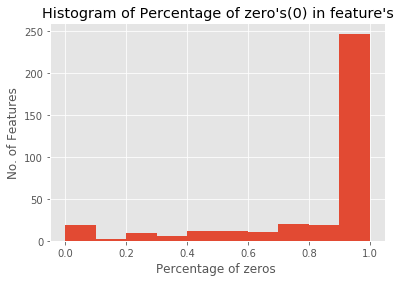

In [16]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.hist(percent_zero_in_feat)
plt.title("Histogram of Percentage of zero's(0) in feature's")
plt.xlabel('Percentage of zeros ')
plt.ylabel('No. of Features')
plt.show()

### Observation
    1. Most of the feat contains above 90 percent of zero value of total points.
    2. Percentage of zeros dominates the curve.
    3. But we cannot remove any columns based on the value shares(0's and 1's), as for algorithms like decision trees entropy is more important at that particulr size of data.
    4. These information can be used further if we need to discard some feature based on imbalance if required.
    

### Univariate Analysis on features

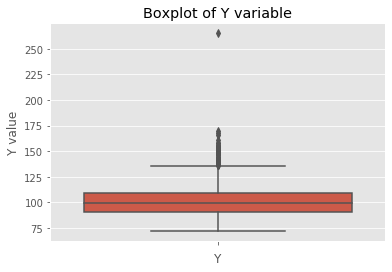

In [17]:
import seaborn as sns

sns.boxplot( y= 'y', data = train_df)
plt.title('Boxplot of Y variable')
plt.ylabel('Y value')
plt.xlabel('Y')
plt.show()

In [18]:
np.percentile(train_df.y.values,[25,75])

array([ 90.82, 109.01])

In [19]:
train_df.y.describe().reset_index()

,index,y
0,count,4209.000000
1,mean,100.669318
2,std,12.679381
3,min,72.110000
4,25%,90.820000
5,50%,99.150000
6,75%,109.010000
7,max,265.320000


In [20]:
train_df = train_df[train_df['y'] <= 136]

train_df.shape

(4159, 378)

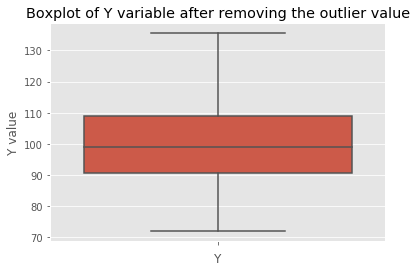

In [21]:
sns.boxplot( y= 'y', data = train_df)
plt.title('Boxplot of Y variable after removing the outlier value')
plt.ylabel('Y value')
plt.xlabel('Y')
plt.show()

### Observation

    There are no more points that are present outside the Quantile limit. We can say that Y variable is outlier free.

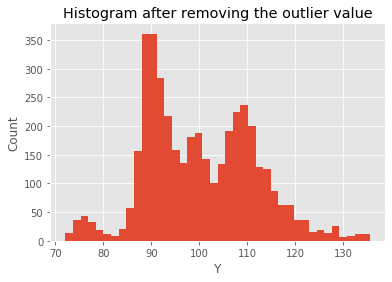

In [22]:
plt.hist(train_df['y'].values, bins=40)
plt.title("Histogram after removing the outlier value")
plt.xlabel('Y')
plt.ylabel('Count')
plt.show()

### Observation of Univariate on Y - Target Variable

1. The desrcibe method gives the summary of some statistics.
2. The 136 is the upper limit for the outlier in dependent variable Y.

### Visualisation and Outlier Treatment of  ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [23]:
feat = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

### Plot of X0 vs y

Text(0.5, 0, 'The categories in feat :: X0')

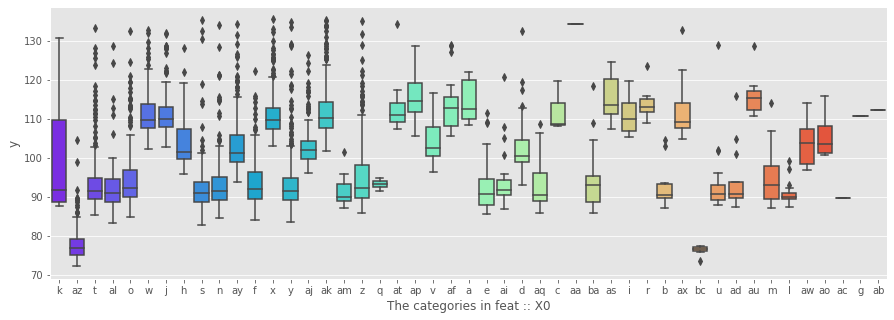

In [24]:
## https://datascienceplus.com/seaborn-categorical-plots-in-python/
var_name = 'X0'
plt.figure(figsize=(15,5))
sns.boxplot(x= var_name , y='y', data=train_df, palette='rainbow')
plt.xlabel('The categories')
plt.xlabel('The categories in feat :: '+ feat[0])

In [25]:
print("The total number of categories in X0 ::",len(train_df['X0'].unique()))

The total number of categories in X0 :: 47


### Observation for X0

This plot is y vs categories in X0 feature. The x value represent's catgeories from X0 and the y value shows the boxplot for corresponding y value points.

There are total 47 categories in X0 as mentioned in the above cells. In some categories there outlier points upto some extent.

### Plot of X1 vs y

Text(0.5, 0, 'The categories in feat :: X1')

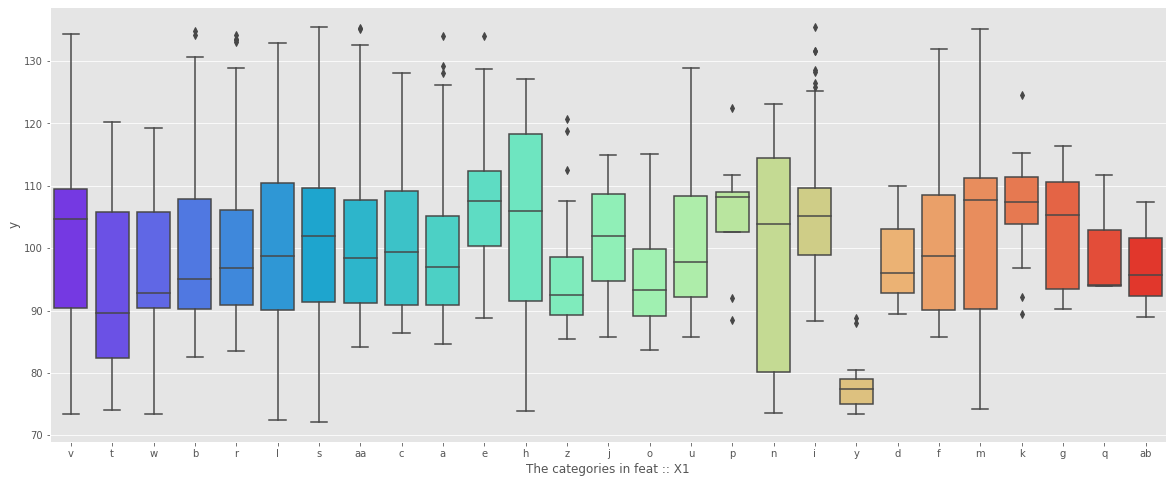

In [26]:
var_name = 'X1'
plt.figure(figsize=(20,8))
sns.boxplot(x= var_name , y='y', data=train_df, palette='rainbow')
plt.xlabel('The categories in feat :: '+ feat[1])

In [27]:
print("The total number of categories in X0 ::",len(train_df['X1'].unique()))

The total number of categories in X0 :: 27


### Observation for X1

This plot is y vs categories in X1 feature. The x value represent's catgeories from X1 and the y value shows the boxplot for corresponding y value points.

There are total 27 categories in X0 as mentioned in the above cells. There are many little number of outlier which can be ignored.

### Plot of X2 vs y

Text(0.5, 0, 'The categories in feat :: X2')

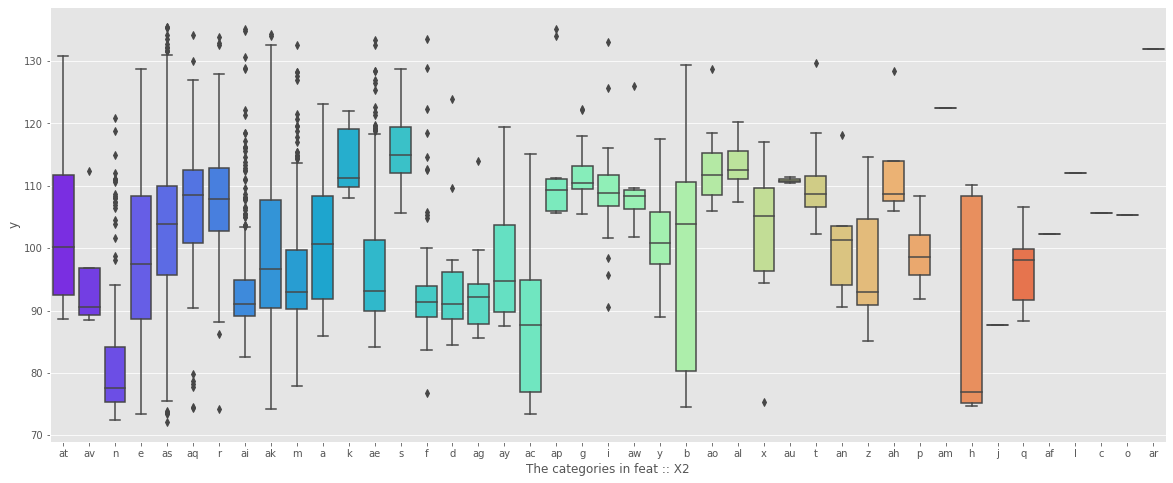

In [28]:
var_name = 'X2'
plt.figure(figsize=(20,8))
sns.boxplot(x= var_name , y='y', data=train_df, palette='rainbow')
plt.xlabel('The categories in feat :: '+ feat[2])

In [29]:
print("The total number of categories in X2 ::",len(train_df['X2'].unique()))

The total number of categories in X2 :: 43


### Observation for X2

This plot is y vs categories in X2 feature. The x value represent's catgeories from X1 and the y value shows the boxplot for corresponding y value points.

There are total 43 categories in X2 as mentioned in the above cells. 

### Plot of X3 vs y

Text(0.5, 0, 'The categories in feat :: X3')

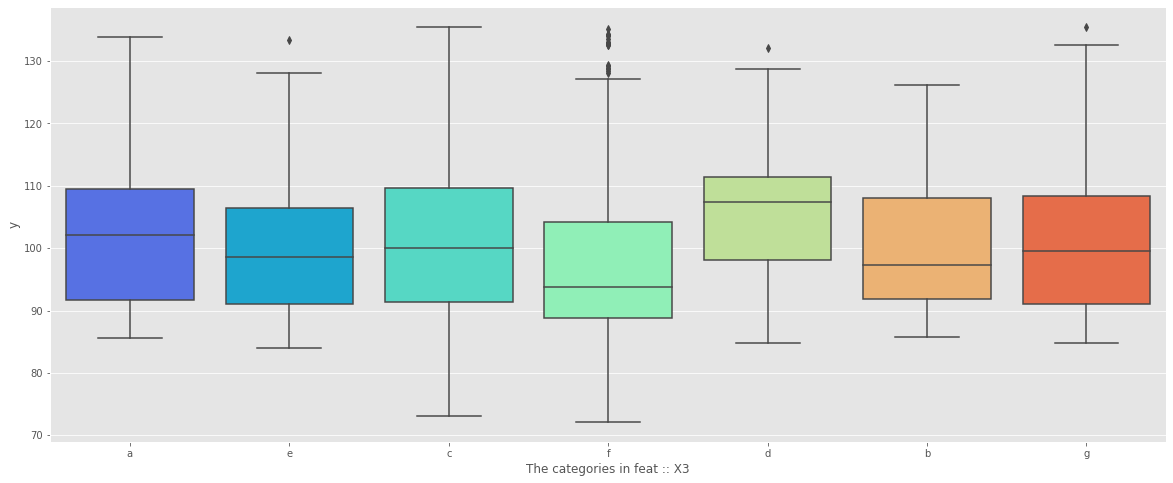

In [30]:
var_name = 'X3'
plt.figure(figsize=(20,8))
sns.boxplot(x= var_name , y='y', data=train_df, palette='rainbow')
plt.xlabel('The categories in feat :: '+ feat[3])

In [31]:
print("The total number of categories in X3 ::",len(train_df['X3'].unique()))

The total number of categories in X3 :: 7


### Observation for X3

This plot is y vs categories in X3 feature. The x value represent's catgeories from X3 and the y value shows the boxplot for corresponding y value points.

There are total 7 categories in X3 as mentioned in the above cells. The outlier are also less hence can be ignored.


Such type of setting is good for tree based Model provided having less entropy for given number of split.


### Plot of X4 vs y

Text(0.5, 0, 'The categories in feat :: X4')

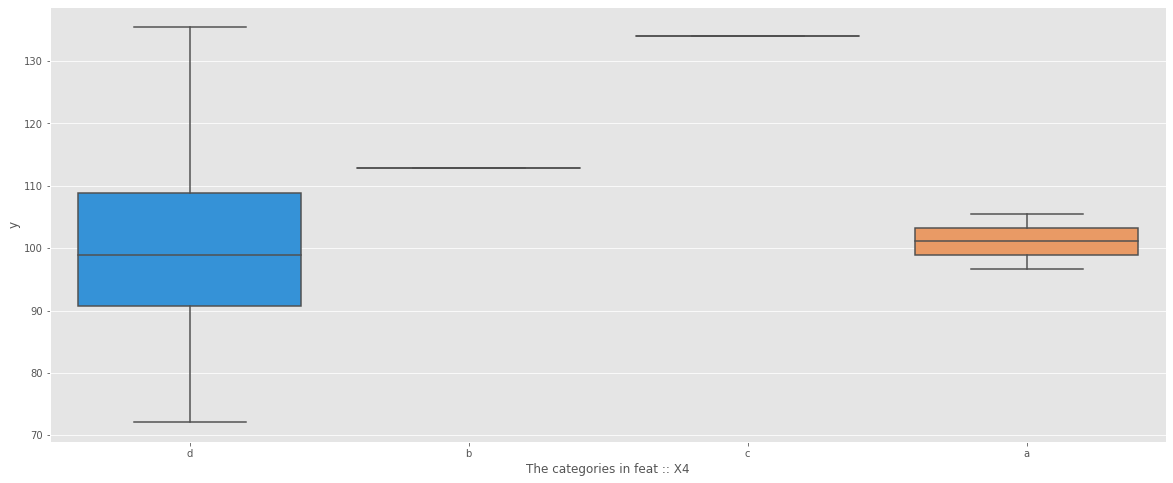

In [32]:
var_name = 'X4'
plt.figure(figsize=(20,8))
sns.boxplot(x= var_name , y='y', data=train_df, palette='rainbow')
plt.xlabel('The categories in feat :: '+  feat[4])

In [33]:
print("The total number of categories in X4 ::",len(train_df['X4'].unique()))

The total number of categories in X4 :: 4


### Observation for X4

This plot is y vs categories in X4 feature. The x value represent's catgeories from X1 and the y value shows the boxplot for corresponding y value points.

There are total 4 categories in X4 as mentioned in the above cells. 

There are very few values in some categories as can be seen from above plot.



### Plot of X5 vs y

Text(0.5, 0, 'The categories in feat :: X5')

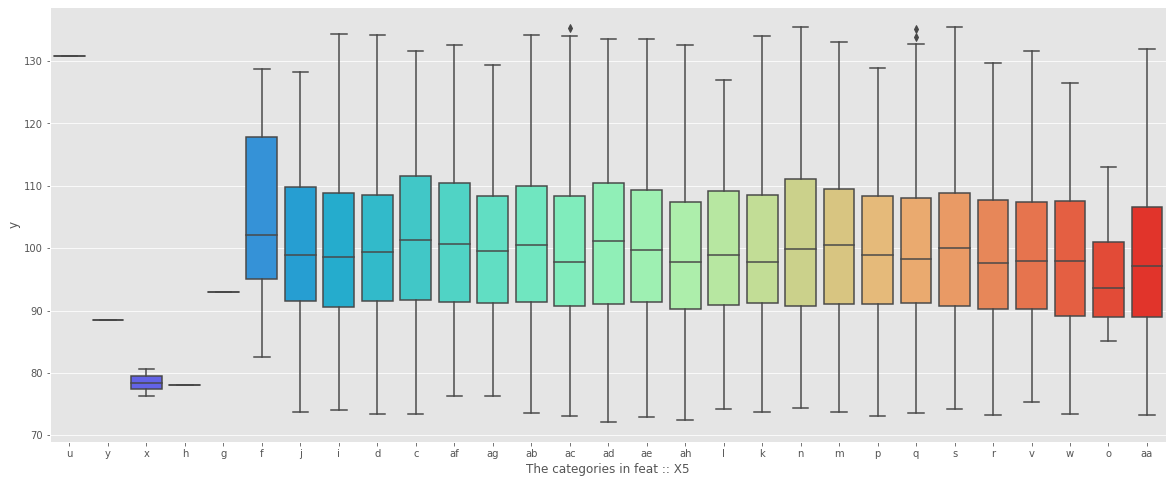

In [34]:

var_name = 'X5'
plt.figure(figsize=(20,8))
sns.boxplot(x= var_name , y='y', data=train_df, palette='rainbow')
plt.xlabel('The categories in feat :: '+ feat[5])

In [35]:
print("The total number of categories in X5 ::",len(train_df['X5'].unique()))

The total number of categories in X5 :: 29


### Observation for X5

This plot is y vs categories in X5 feature. The x value represent's catgeories from X1 and the y value shows the boxplot for corresponding y value points.

There are total 29 categories in X5 as mentioned in the above cells. 

There are very few values in some categories like u, y, h, g such things could create problem when we split the data in train and test split.

There can a case where no points among those categories are distributed in train and it directly comes in test so that can create a problem.

### Plot of X6 vs y

Text(0.5, 0, 'The categories in feat :: X6')

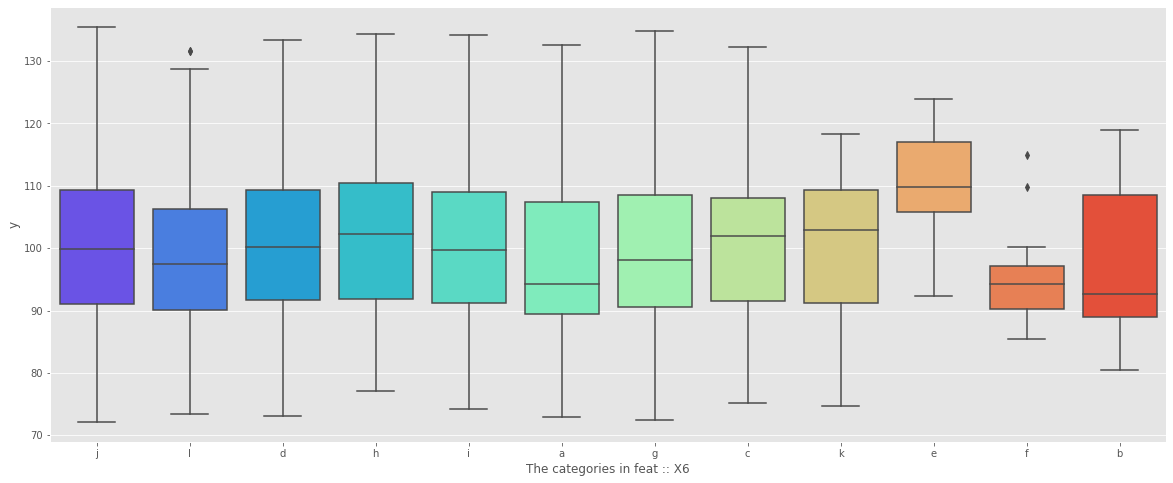

In [36]:
var_name = 'X6'
plt.figure(figsize=(20,8))
sns.boxplot(x= var_name , y='y', data=train_df, palette='rainbow')
plt.xlabel('The categories in feat :: '+ feat[6])

In [37]:
print("The total number of categories in X6 ::",len(train_df['X6'].unique()))

The total number of categories in X6 :: 12


### Observation for X6

This plot is y vs categories in X6 feature. The x value represent's catgeories from X1 and the y value shows the boxplot for corresponding y value points.

There are total 12 categories in X6 as mentioned in the above cells. The outlier's in this plot can be ignored as there so few and not of high magnitude. And few outliers with decent magnitude should be there in dataset to make the model robust.

### Plot of X8 vs y

Text(0.5, 0, 'The categories in feat :: X8')

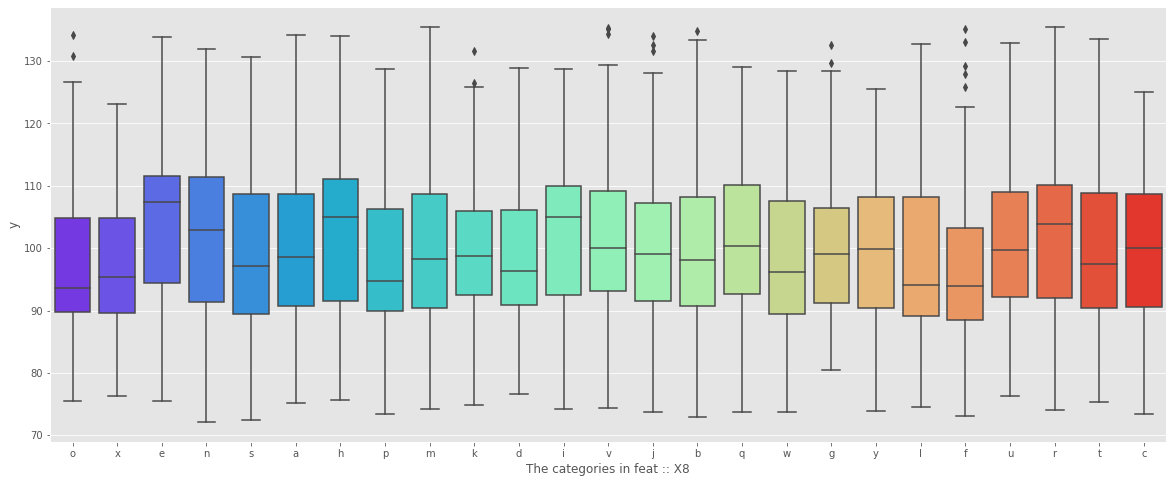

In [38]:
var_name = 'X8'
plt.figure(figsize=(20,8))
sns.boxplot(x= var_name , y='y', data=train_df, palette='rainbow')
plt.xlabel('The categories in feat :: '+ feat[7])

In [39]:
print("The total number of categories in X8 ::",len(train_df['X8'].unique()))

The total number of categories in X8 :: 25


### Observation for X8

This plot is y vs categories in X8 feature. The x value represent's catgeories from X1 and the y value shows the boxplot for corresponding y value points.

There are total 12 categories in X8 as mentioned in the above cells. The outlier's in this plot can be ignored as there so few and not of high magnitude. And few outliers with decent magnitude should be there in dataset to make the model robust.

### Mutlicolinearity Analysis

In [40]:
## https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # initialise vif Dataframe
    vif = pd.DataFrame()
    # create columns "variables" and add all column in dataframe. 
    vif["variables"] = X.columns
    # Calculate VIF for each variable keeping all other variable as independent variables
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    # return vif dictionary
    return(vif)

In [41]:
### removing categorical features/non-numeric features

X = train_df.drop(['ID','y','X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8','X11', 'X93', 'X107', 'X233', 'X235',\
                   'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'],axis=1)


### passing X to cal_vif function 

vif = calc_vif(X)

In [42]:
## print vif
vif

,variables,VIF
0,X10,inf
1,X12,inf
2,X13,inf
3,X14,inf
4,X15,inf
...,...,...
351,X380,inf
352,X382,inf
353,X383,1.171675
354,X384,1.782908


The variables columns contains numerical features and VIF columns contais Variable Inflation factor of the respective variable.

In [43]:
## disaply vif column to get the gist of the values 

vif['VIF'].values

array([         inf,          inf,          inf,          inf,
                inf,          inf,          inf,          inf,
                inf,          inf,          inf,          inf,
                inf,          inf,          inf,   4.00512957,
                inf,          inf,          inf,          inf,
                inf,          inf,          inf,          inf,
                inf,          inf,   1.23442661,          inf,
                inf,          inf,   1.08744606,  20.51535751,
                inf,  37.65379761,   2.40782408,   4.00061557,
                inf, 301.50549258,   3.44664086,   2.70069249,
                inf,          inf,          inf,   2.73838662,
         2.18491675,  14.52373312,          inf,          inf,
                inf,          inf,          inf,          inf,
         2.62968557,   9.00479423,          inf,          inf,
         3.59474991,   4.28654152,   3.83528568,          inf,
         1.34793194,          inf,   4.35300995,       

### Observation

1. We have removed categorical/Non-numerical feature, ID and y(target variable) to calculate the VIF.


2. It takes only numerical variable as input.


3. The greater the value of VIF greater is the multicollinearity of that variable w.r.t other independent variable.


4. From above values we can say that there are so many vairable's which has multicollinearity.


5. VIF starts at 1 and has no upper limit.


6. VIF = 1, no correlation between the independent variable and the other variables.


7. VIF becomes infinfity when R2_score becomes 1, that means high correlation or association.


8. VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others.


9. This usually won't affect the model performance but reduces the model interpreatbility.


### Encoding Categorical Variables feat = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

### Description of below class


    Here we have designed a class with base class as LabelEncoder from scikitlearn, and is such that, if any new category is encountered in test data then, for those newly encountered category in unseen data we replace that value with the category having maximum number of occurance from train data from that particular feature. This can be called as mode value imputation.
    
    As beacause there are many feature which has only few or sometimes only one value of that particular category which may come in train or in test data at the time of split, so to deal with such type of categories in a feature this type of solution is applied

In [105]:
data = X_train.head(1)

In [43]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy import stats


class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it mode of classes,
        Mode of a value in class will be added in fit and transform will take care of new item.
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        
        
        self.label_encoder = self.label_encoder.fit(list(data_list) ) #+ ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to mode class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        mode = stats.mode(new_data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = [mode.mode[0] if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [44]:
def encode_categorical(train_df, test_df, return_encoder_object=False):
    """
    Input :: 
    
    train_df :: train dataframe containing ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'] features. 
    
    test_df :: test dataframe containing ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'] features. 
    
    return_encoder_object :: default value = False, if True returns fitted encoder dictionary with key as feature 
    
    value as encoder object.
    
    Encode the categorical features ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'] and returns the dictionary 
    
    with key as feature and value as encoded value's of train and test dataframe.

    """
    ### list of categorical feat that needs to be transformed
    feat = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
    ### initilalise dict to store the object of labelEncoderExt for a particuler feat 
    enc_obj_dict = dict()
    ### to store transfrom train data
    train_enc_feat = pd.DataFrame()
    ### to store transformed test data
    test_enc_feat = pd.DataFrame()

    ## iterate for all the categorical feat 
    for ele in feat:
        ### creat object
        enc_obj = LabelEncoderExt()
        ## fit the object to the train data
        enc_obj.fit(train_df[ele])
        
        enc_obj_dict[ele] = enc_obj
        ## transform the train data
        train_enc_feat[ele] = enc_obj.transform(train_df[ele].values)
        ## transform the test data
        test_enc_feat[ele] = enc_obj.transform(test_df[ele].values)
     
    
    if return_encoder_object:
        return train_enc_feat, test_enc_feat, enc_obj_dict
    else:
        return train_enc_feat, test_enc_feat

### Encoding Train and Test DataFrame

In [45]:
'''
Encoding 8 categorical features using encode_categorical function which takes train, test dataframe and 

a boolean argument which when is True returns the fitted encoder dictionary.

The function returns train, test encoded dataframe and fitted encoder dictionary with key as feature and value 

as fitted encoder object.


'''

train_enc_feat, test_enc_feat, enc_obj_dict = encode_categorical(train_df, test_df, return_encoder_object=True)

In [93]:
enc_cat_obj = 'Fitted_Object/enc_obj_dict.sav'
pickle.dump(enc_obj_dict, open(enc_cat_obj, 'wb'))

In [46]:
enc_obj_dict.keys()

dict_keys(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'])

In [47]:
zero_value_feat = ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']

In [48]:
### create a copy of original data 
"""
Concatination of encoded feature train and train_df 

Similarly, concatinating encoded feature test and test_df


"""
new_train_df = pd.concat([train_enc_feat,train_df.reset_index().drop(['index'],\
                         axis=1).drop(feat + zero_value_feat ,axis=1)],axis=1)
new_test_df = pd.concat([test_enc_feat,test_df.reset_index().drop(['index'],\
                         axis=1).drop(feat + zero_value_feat ,axis=1)],axis=1)

new_train_df.head(5)

,X0,X1,X2,X3,X4,X5,X6,X8,ID,y,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,16,0,3,24,9,14,0,130.81,...,0,0,1,0,0,0,0,0,0,0
1,32,21,18,4,3,28,11,14,6,88.53,...,1,0,0,0,0,0,0,0,0,0
2,20,24,33,2,3,27,9,23,7,76.26,...,0,0,0,0,0,0,1,0,0,0
3,20,21,33,5,3,27,11,4,9,80.62,...,0,0,0,0,0,0,0,0,0,0
4,20,23,33,5,3,12,3,13,13,78.02,...,0,0,0,0,0,0,0,0,0,0


In [49]:
new_test_df.head(5)

,X0,X1,X2,X3,X4,X5,X6,X8,ID,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,20,23,33,5,3,25,0,22,1,0,...,0,0,0,1,0,0,0,0,0,0
1,40,3,6,0,3,25,6,24,2,0,...,0,0,1,0,0,0,0,0,0,0
2,20,23,15,5,3,25,9,9,3,0,...,0,0,0,1,0,0,0,0,0,0
3,20,13,33,5,3,25,11,13,4,0,...,0,0,0,1,0,0,0,0,0,0
4,43,20,15,2,3,28,8,12,5,0,...,1,0,0,0,0,0,0,0,0,0


### Train Test Split with 80 :: 20 Ratio

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(new_train_df.drop(['ID','y'], axis = 1),\
                                                    new_train_df.y, test_size= 0.8 , random_state=42) 

In [109]:
print('The number of Datapoints in train X and Y :: ',X_train.shape[0])
print('The number of Datapoints in test X and Y :: ', X_test.shape[0])
print('The number of features in Train and Test set are :: ',X_train.shape[1])

The number of Datapoints in train X and Y ::  831
The number of Datapoints in test X and Y ::  3328
The number of features in Train and Test set are ::  364


### Find no. of components of decomposition to preserve maximum variance and low noise level.

I have referred this paper https://arxiv.org/pdf/1305.5870.pdf to calculate the optimal value of no of components to decompose X_train. Below are the steps i have followed to calculate the same.

1. Calculate beta :: aspect ratio of X_train.
2. Calculate the omega which is correction factor for rectangular shaped input matrix.
3. Calculate threshold tau = oemga * medain(singular values)
4. The singular value above this value are with minimum noise and maximum information.

In [110]:
from sklearn.utils.extmath import randomized_svd

from IPython.display import Image

import math

### Singular value decompositon of X_train into U (left singular) S(singular values)
### and V (right singular values)
U ,S , V = randomized_svd(X_train.values,364)

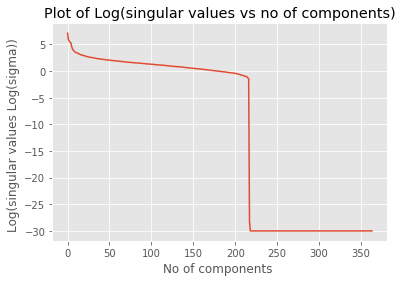

In [111]:
plt.plot(np.log(S))
plt.title("Plot of Log(singular values vs no of components)")
plt.ylabel("Log(singular values Log(sigma)) ")
plt.xlabel("No of components ")
plt.show()

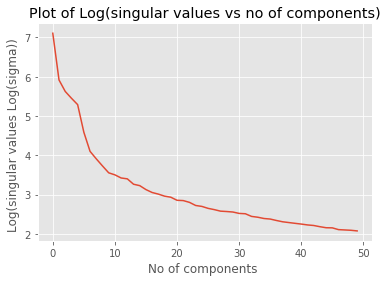

In [112]:
plt.plot(np.log(S[0:50]))
plt.title("Plot of Log(singular values vs no of components)")
plt.ylabel("Log(singular values Log(sigma)) ")
plt.xlabel("No of components ")
plt.show()

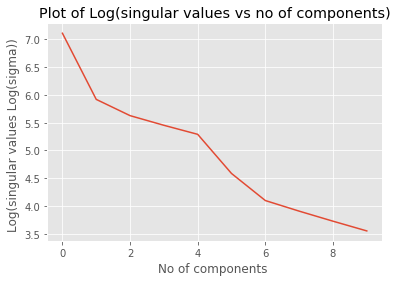

In [113]:
plt.plot(np.log(S[0:10]))
plt.title("Plot of Log(singular values vs no of components)")
plt.ylabel("Log(singular values Log(sigma)) ")
plt.xlabel("No of components ")
plt.show()

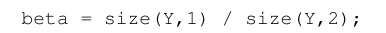

In [114]:
Image(filename = "img/beta_formula.png" ,width = 600 , height = 800 )

In [115]:
### calculate beta (aspect ratio of input matrix )
beta = X_train.shape[0]/X_train.shape[1]
beta

2.282967032967033

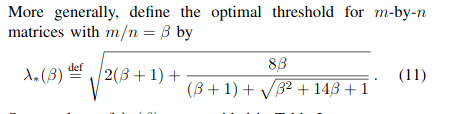

In [116]:
Image(filename = "img/formula_omega.png" ,width = 600 , height = 800 )

In [117]:
### calculate omega 
omega = math.pow(( 2*(beta+1) +  ( ( 8 * beta )/ (beta + 1 + math.pow(beta**2 + 14 *beta + 1 ,.5)) ) ) ,.5) 

omega

2.914835945520384

In [118]:
Image(filename = "img/tau_formula.png" ,width = 600 , height = 800 )

In [119]:
### calculate any threshold tau = omega * median ( Diag(X_train ))
tau = omega * np.median(S)
tau

2.769935104071162

In [120]:
### Take all the singular values which are greater than threshold from the presort S array 
Singular_value = S[S>tau]

Singular_value

array([1221.66391496,  371.91332485,  277.72443456,  233.48479947,
        198.44994206,   98.16844503,   60.34150456,   49.88060412,
         41.63358548,   34.94891434,   33.17925416,   30.64821812,
         29.97270756,   26.13697996,   25.21388427,   22.79619029,
         21.16404747,   20.31648723,   19.28599052,   18.7794344 ,
         17.36279686,   17.23378213,   16.47364545,   15.21242989,
         14.85793654,   14.13796933,   13.69186444,   13.17012801,
         13.04115944,   12.87730753,   12.42974506,   12.32628713,
         11.517456  ,   11.28056496,   10.92045342,   10.77056373,
         10.38399119,   10.04605531,    9.84889894,    9.65654535,
          9.47568136,    9.27148498,    9.14102932,    8.8632901 ,
          8.63212737,    8.60643905,    8.22627325,    8.15825528,
          8.09039389,    7.96039613,    7.77479109,    7.71502123,
          7.54229781,    7.47479148,    7.27757027,    7.16852854,
          7.07169419,    6.92173353,    6.80390301,    6.67627

In [121]:
print("Any components between this is number are feasible to choose \n\n" , np.nonzero(S > tau) )

Any components between this is number are feasible to choose 

 (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119]),)


### Creating and Adding decomposed feature

In [122]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

## Get all those features which contains 0 and 1 as unique value

column = unikValue_feat['[0, 1]']

def add_decompose_feat(X_train, X_test,no_of_comp):
    """
    
    Add decompose feat to training data and testing data given X_train, X_test,
    
    no_of component, feat_list that is to be decomposed
    
    """

    trunc_SVD = TruncatedSVD(n_components=no_of_comp,random_state=42)

    trunc_SVD_train = trunc_SVD.fit_transform(X_train[column])

    trunc_SVD_test = trunc_SVD.transform(X_test[column])

    PCA_obj = PCA(n_components=no_of_comp,random_state=42)

    PCA_train = PCA_obj.fit_transform(X_train[column])

    PCA_test = PCA_obj.transform(X_test[column])
    
    decom_feat_train = pd.DataFrame()
    
    decom_feat_test = pd.DataFrame()


    for i in range(1, no_of_comp + 1):
        
        decom_feat_train['tsvd_' + str(i)] = trunc_SVD_train[:, i - 1]
        decom_feat_test['tsvd_' + str(i)] = trunc_SVD_test[:, i - 1]
        decom_feat_train['pca_' + str(i)] = PCA_train[:, i - 1]
        decom_feat_test['pca_' + str(i)] = PCA_test[:, i - 1]
        
        
    return decom_feat_train, decom_feat_test, trunc_SVD, PCA_obj

In [123]:
def select_n_comp(X_train,Y_train,n_comp):
    """
    Imput X_train, Y_train, list of n_comp
    
    Decomposition of X_train features to n_comp dimension using 
    
    Will return the list of R2_score per component
    
    """
    R2_score = []

    for no_of_comp in n_comp:

        new_train,new_test,_,_ = add_decompose_feat(X_train,X_test,no_of_comp)
        ## Taking decend depth of tree and create object
        DT =  DecisionTreeRegressor(max_depth= 3,random_state=42 )
        ## Fit the Decision Tree to the Data
        DT.fit(pd.concat([X_train.reset_index().drop(['index'],axis=1), new_train ], axis = 1) , Y_train)
        ## Predict of test data
        Y_pred = DT.predict(pd.concat([X_test.reset_index().drop(['index'],axis=1), new_test], axis= 1 ))
        ## calculate R2_score
        R2 = r2_score(Y_test, Y_pred)
        ## add it in the list
        R2_score.append(R2)
        
    return R2_score


comp = [2, 3 ,5, 7, 9, 11, 12, 13, 15,17, 20]

R2_score = select_n_comp(X_train,Y_train,comp)

Text(0.5, 1.0, 'The Number of Component vs R2_score')

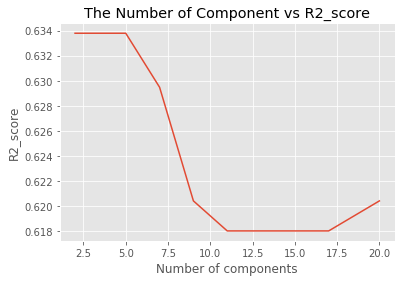

In [124]:
plt.plot(comp, R2_score)
plt.xlabel('Number of components')
plt.ylabel('R2_score')
plt.title("The Number of Component vs R2_score")

### Observation

    Above is the plot of comp to decompose v/s R2_score, from above plot it is clear that n = 5 will be the optimum choice of the component's to decompose the numerical features.
    
    We have arbitarily taken the decent depth of tree, which is 5 here.



## Observation and Conclusion




1. The Dataset contains anonymous features where we don't know what the actual feature/columns represents in real world. Hence, the problem we are dealing with becomes totally and ML problem where domain knowledge is of no use.


2. The problem belongs to regression type of setting where one has to minimize the means square error or maximise the R2_score(Coefficient of Determination).


3. We have to predict y which is time of total process a car takes, so we are dealing with a continous random variable.


4. In EDA we came to know there are 8 categorical variables, target variable(y) as continous random variable and rest are interger(dataype) variables.


5. The integer variable contains two distinct values 0's and 1's, some of the integer variables/features have only zero's. So, we have discarded such variables which contains zero's as only there unique value, as such types of varible's does not add any value to the model.


6. From univariate analysis of target variable (y) we have removed points which has y value greater that 136. 


7. In integer variable anaylsis of the share of '0' value, that is, percentage of '0' value and found that most of the variables contains '0' value greater that 90 %  we tells that imabalance of categories.


8. In analysis of the 8 categorical variable, where some varibles contains many category and some of them contains very few can be seen by plotting distribution of the y value for those categories. 


9. In multicollinearity analysis VIF is calculated for all the variables and it appears that there is high level of multicollinearity present in between independent variables, which will lead to low/incorrect interpretability but this won't affect the Goodness of fit as well the performance of model those features are kept as it is for now.


10. In featurisation categerical encoding and decomposition of features are two types of featurisation are performed.
    
       a. In categorical encoding the 8 categorical features are assigned to unique number's where we have used scikitlearn LabelEncoder and did slight modification to it, where if any new category is found in any features it is then replace by the mode of that particular feature.
    
       b. In Decomposition featurisation all feature are taken and decomposed into the 'N' numner of component's in such a way that maximum information of original varibles are preserved. The number of component's is integer, to find the best number of component (N) a decent amount depth of DecisionTreeRegressor is trained for the various value's of number and component's and the number of componeny which gives highest R2_score is choosen.

In [125]:
X_train

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
470,43,20,15,6,3,9,6,22,0,0,...,1,0,0,0,0,0,0,0,0,0
3634,35,20,15,2,3,25,7,21,0,0,...,1,0,0,0,0,0,0,0,0,0
1396,45,19,37,5,3,2,11,2,0,1,...,0,0,0,0,0,0,0,0,0,0
3675,40,1,2,2,3,25,3,22,0,0,...,1,0,0,0,0,0,0,0,0,0
1549,43,24,15,2,3,3,0,22,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,44,1,15,6,3,22,6,12,0,0,...,1,0,0,0,0,0,0,0,0,0
466,8,13,15,5,3,9,6,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3092,44,3,2,0,3,21,3,4,0,0,...,0,0,1,0,0,0,0,0,0,0
3772,43,23,15,2,3,25,3,8,0,0,...,1,0,0,0,0,0,0,0,0,0


In [73]:
no_of_comp = 5

new_train,new_test,trunc_SVD, PCA_obj = add_decompose_feat(X_train,X_test,no_of_comp)

In [75]:
import pickle

SVD_Filename = 'Fitted_Object/trunc_SVD.sav'
pickle.dump(trunc_SVD, open(base_filename, 'wb'))


PCA_Filename = 'Fitted_Object/PCA_obj.sav'
pickle.dump(PCA_obj, open(meta_filename, 'wb'))

In [76]:
### create featurised X_train and X_test set by adding decompose feature.

X_train_featurised = pd.concat([X_train.reset_index().drop(['index'],axis=1), new_train ], axis = 1)

X_test_featurised = pd.concat([X_test.reset_index().drop(['index'],axis=1), new_test], axis= 1 )

## Linear Regressor Tuning

In [77]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV


In [90]:
# Create logistic regression
logistic = linear_model.SGDRegressor()

# Create regularization penalty space
penalty = [ 'l1','l2','elasticnet']

scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
X_SGD = scaler.fit_transform(X_train_featurised)

# Create regularization hyperparameter space
alpha = np.logspace(0, 4, 10)#[1, 10, 100, 1000, 10000]

# Create hyperparameter options
hyperparameters = dict(alpha = alpha , penalty=penalty)

scorer = make_scorer(r2_score, greater_is_better=True)


# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0 , scoring= scorer)

clf.fit(X_SGD , Y_train) #.astype('int'))

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                      

In [91]:
clf.best_estimator_

SGDRegressor(alpha=1.0, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [92]:
best_model_SGR = clf.best_estimator_

r2_train_LR = r2_score(Y_train ,best_model_SGR.predict(X_SGD) )

r2_test_LR = r2_score(Y_test , best_model_SGR.predict(scaler.transform(X_test_featurised)))

print("The r2_score on train set is  :: ", r2_train_LR)
print("The r2_score on test set is :: ", r2_test_LR)

The r2_score on train set is  ::  0.4605728440787381
The r2_score on test set is ::  0.506369362464423


### Preparing Y_test

In [79]:
enc_test_final_df = pd.DataFrame()

for ele in feat:
    
    enc_test_final_df[ele] = enc_obj_dict[ele].transform(test_df[ele])
    
final_test = pd.concat([enc_test_final_df,test_df.drop(feat+['ID'],axis=1)], axis=1)

final_test

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,20,23,33,5,3,25,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,40,3,6,0,3,25,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,20,23,15,5,3,25,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,20,13,33,5,3,25,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,43,20,15,2,3,28,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,7,9,15,5,3,0,9,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,40,1,6,3,3,0,9,24,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,45,23,15,5,3,0,3,22,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,8,23,15,0,3,0,2,16,0,0,...,0,0,1,0,0,0,0,0,0,0


In [81]:
no_of_comp = 5

new_train,decompose_test,_,_ = add_decompose_feat(X_train,final_test,no_of_comp)

In [82]:
submission_df = pd.concat([final_test,decompose_test], axis=1).drop(zero_value_feat,axis=1)
submission_df

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,tsvd_1,pca_1,tsvd_2,pca_2,tsvd_3,pca_3,tsvd_4,pca_4,tsvd_5,pca_5
0,20,23,33,5,3,25,0,22,0,0,...,3.903828,-0.397793,-0.653340,0.835483,1.472025,-2.067594,-1.099269,3.637277,-2.364018,-1.021227
1,40,3,6,0,3,25,6,24,0,0,...,5.775383,3.730382,3.813730,1.271216,1.067512,0.479351,0.439712,-0.650491,1.559095,1.446607
2,20,23,15,5,3,25,9,9,0,0,...,4.688485,-1.297481,-1.413914,0.766617,1.028260,-0.422166,0.195717,2.072835,-0.379550,0.436652
3,20,13,33,5,3,25,11,13,0,0,...,4.389518,-0.397618,-0.616948,0.752981,1.355125,-2.050645,-1.161999,3.568926,-2.484304,-1.129616
4,43,20,15,2,3,28,8,12,0,0,...,7.056324,-2.816707,-2.625433,0.573450,0.319297,0.746679,0.478041,-1.552230,1.195442,0.665301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,7,9,15,5,3,0,9,4,0,0,...,6.558071,-2.950157,-2.871078,-0.698285,-0.753760,0.309829,0.149281,-0.006800,-0.314418,-0.241653
4205,40,1,6,3,3,0,9,24,0,0,...,6.457944,2.110877,2.205088,0.612664,0.584301,-0.728101,-0.899842,-0.810670,1.791981,1.788675
4206,45,23,15,5,3,0,3,22,0,0,...,5.910590,-1.437960,-1.458556,-2.700796,-2.706469,0.418380,0.065805,0.422747,-0.537140,-0.294390
4207,8,23,15,0,3,0,2,16,0,0,...,7.102051,-2.207143,-1.996069,1.388434,1.050262,1.338132,1.246006,-0.964448,0.493896,0.110957


In [95]:
Y_pred_SGR = best_model_SGR.predict(scaler.transform(pd.concat([final_test,decompose_test], axis=1).drop(zero_value_feat,axis=1)))

y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_SGR

y_final.to_csv('submission_modelling_1.csv', index= False)

## SupportVectorRegressor Tuning 

In [84]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from time import time
from sklearn.metrics import make_scorer

In [85]:
# Create logistic regression
svr = SVR()


scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
X_svr = scaler.fit_transform(X_train_featurised)

# Create regularization hyperparameter space
C = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Create hyperparameter options
hyperparameters =  [{'kernel': ['lnear','rbf','poly'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],\
                                 'C': [1, 10, 100, 1000, 10000]}]
#dict(C = C , kernel =kernel)

scorer = make_scorer(r2_score, greater_is_better=True)

# Create grid search using 5-fold cross validation
clf = GridSearchCV( svr, hyperparameters, cv=5, verbose=0 , scoring= scorer ,n_jobs=-1)

start = time()

clf.fit(X_svr , Y_train)

print("Linear Kernel Normalized Fit Time: {} s".format(time() - start))

Linear Kernel Normalized Fit Time: 100.66155076026917 s


In [86]:
clf.best_estimator_

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [87]:
best_model_SVR = clf.best_estimator_

r2_train_SVR = r2_score(Y_train ,best_model_SVR.predict(X_svr))

r2_test_SVR = r2_score(Y_test , best_model_SVR.predict(scaler.transform(X_test_featurised)))

print("The r2_score on train set is  :: ", r2_train_SVR)
print("The r2_score on test set is :: ", r2_test_SVR)

The r2_score on train set is  ::  0.6235668186401301
The r2_score on test set is ::  0.6025588952493659


In [83]:
Y_pred_SVR = best_model_SVR.predict(scaler.transform(pd.concat([final_test,decompose_test], axis=1).drop(zero_value_feat,axis=1)))

y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_SVR

y_final.to_csv('submission_modelling_2.csv', index= False)

## DecisonTreeRegressor Tuning

In [88]:
Tree = DecisionTreeRegressor(random_state=42)

### parameter's to tune

max_depth = [3, 4, 5, 8, 15, 25, 30, 50, 100]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10, 20, 30] 

### parameter dictionary used to pass
hyperF = dict( max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

scorer = make_scorer(r2_score, greater_is_better=True)

### creating object of GridSearchCV 
grid = GridSearchCV(Tree, hyperF, cv = 3, verbose = 1, n_jobs = -1 ,scoring=scorer)


### fit the model
grid.fit(X_train_featurised, Y_train)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 755 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 787 out of 810 | elapsed:    2.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:    2.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 8, 15, 25, 30, 50, 100],
                         'min_samples_leaf': [1, 2, 5, 10, 20, 30],
                         'min_samples_split': [2, 5, 10, 15, 10

In [90]:
best_model_DT = grid.best_estimator_
best_model_DT

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=100,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [132]:
base_filename = 'Fitted_Object/best_model_regressor.sav'
pickle.dump(best_model_DT, open(base_filename, 'wb'))

In [89]:


r2_train_DT = r2_score(Y_train ,best_model_DT.predict(X_train_featurised) )

r2_test_DT = r2_score(Y_test , best_model_DT.predict(X_test_featurised))

print("The r2_score on train set is  :: ", r2_train_DT)
print("The r2_score on test set is :: ", r2_test_DT)

The r2_score on train set is  ::  0.6252917971612755
The r2_score on test set is ::  0.641127322651597


In [173]:
Y_pred_DT = best_model_DT.predict(pd.concat([final_test,decompose_test], axis=1).drop(zero_value_feat,axis=1))

y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_DT

y_final.to_csv('submission_modelling_3.csv', index= False)

## Tuning RandomForestRegressor

In [97]:
from sklearn.ensemble import RandomForestRegressor

### create object of randomforestregressor class
forest = RandomForestRegressor(random_state=42)

### parameter's to tune
n_estimators = [100, 300, 500]
max_depth = [ 3, 4, 5, 8, 15, 25, 30, 50, 100]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10, 20, 30] 

### parameter dictionary used to pass
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)


### creating object of GridSearchCV 
gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)


### fit the model
gridF.fit(X_train_featurised, Y_train)

Fitting 3 folds for each of 810 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  7.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [104]:
best_model_rf = gridF.best_estimator_

In [100]:
r2_train_RF = r2_score(Y_train ,best_model_rf.predict(X_train_featurised) )

r2_test_RF = r2_score(Y_test , best_model_rf.predict(X_test_featurised))

print("The r2_score on train set is  :: ", r2_train_RF)
print("The r2_score on test set is :: ", r2_test_RF)

The r2_score on train set is  ::  0.6260926478439053
The r2_score on test set is ::  0.6458889911998129


In [174]:
Y_pred_rf = best_model_rf.predict(pd.concat([final_test,decompose_test], axis=1).drop(zero_value_feat,axis=1))

y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_rf

y_final.to_csv('submission_modelling_4.csv', index= False)

## XGBRegressor Tuning

In [102]:
import xgboost as xgb

model = xgb.XGBRegressor()

param_dist = {"max_depth": [ 3, 4, 5, 8, 15, 25, 30, 50, 100],
              "min_child_weight" : [ 1, 3, 6],
              "n_estimators": [100, 200 , 300, 500],
              "learning_rate": [0.05, 0.1,0.16]}

grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3, verbose=10, n_jobs=-1, scoring='r2')

grid_search.fit(X_train_featurised, Y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={

In [103]:
best_model_xgb = grid_search.best_estimator_

r2_train_xgb = r2_score(Y_train ,best_model_xgb.predict(X_train_featurised) )

r2_test_xgb = r2_score(Y_test , best_model_xgb.predict(X_test_featurised))

print("The r2_score on train set is  :: ", r2_train_xgb)
print("The r2_score on test set is :: ", r2_test_xgb)

The r2_score on train set is  ::  0.6907559420438926
The r2_score on test set is ::  0.6306931488876093


In [105]:
Y_pred_xgb = best_model_xgb.predict(pd.concat([final_test,decompose_test], axis=1).drop(zero_value_feat,axis=1))

y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_xgb

y_final.to_csv('submission_modelling_5.csv', index= False)

## CatboostRegressor Tuning

In [74]:
import catboost as cb


params = {'depth': [ 3, 4, 5, 8, 15, 25, 30, 50, 100],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [ 1, 4, 9],
         'iterations': [300]}

cb = cb.CatBoostRegressor(random_state=42)

cb_model = GridSearchCV(cb, params, scoring="r2", cv = 3)


cb_model.fit(X_train_featurised, Y_train)

0:	learn: 11.4623402	total: 51.8ms	remaining: 15.5s
1:	learn: 11.2995359	total: 54.7ms	remaining: 8.15s
2:	learn: 11.1500389	total: 57.5ms	remaining: 5.69s
3:	learn: 11.0113507	total: 59.9ms	remaining: 4.43s
4:	learn: 10.8739711	total: 62.2ms	remaining: 3.67s
5:	learn: 10.7360136	total: 64.4ms	remaining: 3.15s
6:	learn: 10.6099399	total: 66.6ms	remaining: 2.79s
7:	learn: 10.4485431	total: 68.9ms	remaining: 2.52s
8:	learn: 10.3549707	total: 71.1ms	remaining: 2.3s
9:	learn: 10.2563750	total: 73.3ms	remaining: 2.13s
10:	learn: 10.1530804	total: 75ms	remaining: 1.97s
11:	learn: 10.0217643	total: 76.5ms	remaining: 1.84s
12:	learn: 9.9016247	total: 78.1ms	remaining: 1.72s
13:	learn: 9.8066004	total: 79.3ms	remaining: 1.62s
14:	learn: 9.7290621	total: 80.5ms	remaining: 1.53s
15:	learn: 9.6461206	total: 81.7ms	remaining: 1.45s
16:	learn: 9.5763275	total: 82.7ms	remaining: 1.38s
17:	learn: 9.4733194	total: 83.8ms	remaining: 1.31s
18:	learn: 9.3789539	total: 84.7ms	remaining: 1.25s
19:	learn: 9.

276:	learn: 6.2998268	total: 231ms	remaining: 19.1ms
277:	learn: 6.2982786	total: 231ms	remaining: 18.3ms
278:	learn: 6.2940646	total: 232ms	remaining: 17.4ms
279:	learn: 6.2892562	total: 233ms	remaining: 16.6ms
280:	learn: 6.2867654	total: 234ms	remaining: 15.8ms
281:	learn: 6.2842345	total: 234ms	remaining: 14.9ms
282:	learn: 6.2764993	total: 235ms	remaining: 14.1ms
283:	learn: 6.2702085	total: 235ms	remaining: 13.3ms
284:	learn: 6.2663398	total: 236ms	remaining: 12.4ms
285:	learn: 6.2619902	total: 236ms	remaining: 11.6ms
286:	learn: 6.2603218	total: 237ms	remaining: 10.7ms
287:	learn: 6.2592675	total: 238ms	remaining: 9.9ms
288:	learn: 6.2552571	total: 238ms	remaining: 9.06ms
289:	learn: 6.2514674	total: 239ms	remaining: 8.23ms
290:	learn: 6.2497756	total: 239ms	remaining: 7.4ms
291:	learn: 6.2440436	total: 240ms	remaining: 6.57ms
292:	learn: 6.2373252	total: 240ms	remaining: 5.74ms
293:	learn: 6.2339838	total: 241ms	remaining: 4.91ms
294:	learn: 6.2303458	total: 241ms	remaining: 4.

0:	learn: 11.2120379	total: 781us	remaining: 234ms
1:	learn: 11.0958437	total: 1.4ms	remaining: 209ms
2:	learn: 10.9498316	total: 2.01ms	remaining: 199ms
3:	learn: 10.8413691	total: 2.93ms	remaining: 217ms
4:	learn: 10.7308660	total: 3.61ms	remaining: 213ms
5:	learn: 10.6063082	total: 4.17ms	remaining: 204ms
6:	learn: 10.4708146	total: 4.71ms	remaining: 197ms
7:	learn: 10.3368245	total: 5.43ms	remaining: 198ms
8:	learn: 10.2347325	total: 5.95ms	remaining: 192ms
9:	learn: 10.1149197	total: 6.48ms	remaining: 188ms
10:	learn: 10.0021754	total: 7ms	remaining: 184ms
11:	learn: 9.8920108	total: 7.52ms	remaining: 180ms
12:	learn: 9.7939577	total: 8.03ms	remaining: 177ms
13:	learn: 9.7113943	total: 8.55ms	remaining: 175ms
14:	learn: 9.6193642	total: 9.07ms	remaining: 172ms
15:	learn: 9.5218500	total: 9.59ms	remaining: 170ms
16:	learn: 9.4543975	total: 10.1ms	remaining: 168ms
17:	learn: 9.3598945	total: 10.6ms	remaining: 167ms
18:	learn: 9.2766336	total: 11.2ms	remaining: 165ms
19:	learn: 9.182

0:	learn: 11.0482329	total: 589us	remaining: 176ms
1:	learn: 10.5654841	total: 1.24ms	remaining: 185ms
2:	learn: 10.1097747	total: 1.84ms	remaining: 182ms
3:	learn: 9.7763637	total: 2.42ms	remaining: 179ms
4:	learn: 9.4809236	total: 2.98ms	remaining: 176ms
5:	learn: 9.2122122	total: 3.55ms	remaining: 174ms
6:	learn: 8.9366599	total: 4.12ms	remaining: 173ms
7:	learn: 8.6497197	total: 4.69ms	remaining: 171ms
8:	learn: 8.5370148	total: 5.26ms	remaining: 170ms
9:	learn: 8.4290187	total: 5.82ms	remaining: 169ms
10:	learn: 8.3641671	total: 6.39ms	remaining: 168ms
11:	learn: 8.1983136	total: 6.96ms	remaining: 167ms
12:	learn: 8.0790496	total: 7.53ms	remaining: 166ms
13:	learn: 7.9726905	total: 8.09ms	remaining: 165ms
14:	learn: 7.8444192	total: 8.66ms	remaining: 165ms
15:	learn: 7.7872794	total: 9.22ms	remaining: 164ms
16:	learn: 7.7159740	total: 9.81ms	remaining: 163ms
17:	learn: 7.6814176	total: 10.4ms	remaining: 162ms
18:	learn: 7.5814602	total: 10.9ms	remaining: 162ms
19:	learn: 7.5409253

0:	learn: 10.5995427	total: 556us	remaining: 166ms
1:	learn: 10.1570360	total: 1.16ms	remaining: 173ms
2:	learn: 9.6289817	total: 1.68ms	remaining: 167ms
3:	learn: 9.2623801	total: 2.18ms	remaining: 161ms
4:	learn: 8.8575614	total: 2.75ms	remaining: 162ms
5:	learn: 8.5124268	total: 3.29ms	remaining: 161ms
6:	learn: 8.1585771	total: 3.83ms	remaining: 160ms
7:	learn: 7.9431035	total: 4.36ms	remaining: 159ms
8:	learn: 7.6782604	total: 4.91ms	remaining: 159ms
9:	learn: 7.4964384	total: 5.44ms	remaining: 158ms
10:	learn: 7.3656261	total: 5.98ms	remaining: 157ms
11:	learn: 7.2404390	total: 6.51ms	remaining: 156ms
12:	learn: 7.1397801	total: 7.05ms	remaining: 156ms
13:	learn: 7.0519935	total: 7.58ms	remaining: 155ms
14:	learn: 6.9329940	total: 8.12ms	remaining: 154ms
15:	learn: 6.8765471	total: 8.69ms	remaining: 154ms
16:	learn: 6.8382184	total: 9.22ms	remaining: 153ms
17:	learn: 6.7786906	total: 9.75ms	remaining: 153ms
18:	learn: 6.7502040	total: 10.3ms	remaining: 152ms
19:	learn: 6.7175849	

0:	learn: 10.8633413	total: 561us	remaining: 168ms
1:	learn: 10.4086250	total: 1.11ms	remaining: 165ms
2:	learn: 10.0178483	total: 1.63ms	remaining: 162ms
3:	learn: 9.7630598	total: 2.15ms	remaining: 159ms
4:	learn: 9.5275896	total: 2.67ms	remaining: 157ms
5:	learn: 9.3932056	total: 3.18ms	remaining: 156ms
6:	learn: 9.1309281	total: 3.71ms	remaining: 155ms
7:	learn: 8.9072244	total: 4.22ms	remaining: 154ms
8:	learn: 8.7304868	total: 4.75ms	remaining: 154ms
9:	learn: 8.6041186	total: 5.29ms	remaining: 153ms
10:	learn: 8.4562558	total: 5.84ms	remaining: 154ms
11:	learn: 8.3102608	total: 6.76ms	remaining: 162ms
12:	learn: 8.1630490	total: 7.28ms	remaining: 161ms
13:	learn: 8.0899841	total: 7.81ms	remaining: 160ms
14:	learn: 8.0353528	total: 8.34ms	remaining: 158ms
15:	learn: 7.9600793	total: 8.86ms	remaining: 157ms
16:	learn: 7.9239157	total: 9.38ms	remaining: 156ms
17:	learn: 7.8766866	total: 9.89ms	remaining: 155ms
18:	learn: 7.8422767	total: 10.4ms	remaining: 154ms
19:	learn: 7.7894600

0:	learn: 10.7621355	total: 1ms	remaining: 299ms
1:	learn: 10.1014039	total: 2.17ms	remaining: 323ms
2:	learn: 9.5072330	total: 3.18ms	remaining: 315ms
3:	learn: 9.1465803	total: 4.15ms	remaining: 307ms
4:	learn: 8.8287366	total: 5.11ms	remaining: 302ms
5:	learn: 8.4714588	total: 6.09ms	remaining: 299ms
6:	learn: 8.2292421	total: 7.07ms	remaining: 296ms
7:	learn: 7.9925870	total: 8.02ms	remaining: 293ms
8:	learn: 7.8990690	total: 8.99ms	remaining: 291ms
9:	learn: 7.7800482	total: 9.94ms	remaining: 288ms
10:	learn: 7.7217884	total: 10.9ms	remaining: 287ms
11:	learn: 7.6056566	total: 11.8ms	remaining: 284ms
12:	learn: 7.5165717	total: 12.8ms	remaining: 283ms
13:	learn: 7.4694501	total: 13.8ms	remaining: 281ms
14:	learn: 7.4227469	total: 14.7ms	remaining: 280ms
15:	learn: 7.3777703	total: 15.7ms	remaining: 278ms
16:	learn: 7.3437937	total: 16.6ms	remaining: 277ms
17:	learn: 7.3119084	total: 17.6ms	remaining: 276ms
18:	learn: 7.2676358	total: 18.6ms	remaining: 275ms
19:	learn: 7.2310254	to

0:	learn: 10.3815685	total: 549us	remaining: 164ms
1:	learn: 9.7702307	total: 1.12ms	remaining: 167ms
2:	learn: 9.0716518	total: 1.69ms	remaining: 167ms
3:	learn: 8.6165183	total: 2.2ms	remaining: 163ms
4:	learn: 8.1556879	total: 2.74ms	remaining: 161ms
5:	learn: 7.8012841	total: 3.26ms	remaining: 160ms
6:	learn: 7.4362244	total: 3.79ms	remaining: 158ms
7:	learn: 7.2447247	total: 4.32ms	remaining: 158ms
8:	learn: 7.0458472	total: 4.83ms	remaining: 156ms
9:	learn: 6.9370627	total: 5.35ms	remaining: 155ms
10:	learn: 6.8028590	total: 5.86ms	remaining: 154ms
11:	learn: 6.7419514	total: 6.38ms	remaining: 153ms
12:	learn: 6.6634915	total: 6.9ms	remaining: 152ms
13:	learn: 6.6299439	total: 7.4ms	remaining: 151ms
14:	learn: 6.6027037	total: 7.93ms	remaining: 151ms
15:	learn: 6.5496357	total: 8.46ms	remaining: 150ms
16:	learn: 6.5067775	total: 9ms	remaining: 150ms
17:	learn: 6.4872309	total: 9.53ms	remaining: 149ms
18:	learn: 6.4647257	total: 10.1ms	remaining: 149ms
19:	learn: 6.4304370	total: 

0:	learn: 10.6234411	total: 567us	remaining: 170ms
1:	learn: 10.0025411	total: 1.16ms	remaining: 172ms
2:	learn: 9.5070655	total: 1.71ms	remaining: 169ms
3:	learn: 9.0834940	total: 2.24ms	remaining: 166ms
4:	learn: 8.8428233	total: 2.77ms	remaining: 163ms
5:	learn: 8.6753014	total: 3.3ms	remaining: 162ms
6:	learn: 8.4717701	total: 3.85ms	remaining: 161ms
7:	learn: 8.2253841	total: 4.38ms	remaining: 160ms
8:	learn: 8.0934495	total: 4.9ms	remaining: 159ms
9:	learn: 7.9952616	total: 5.42ms	remaining: 157ms
10:	learn: 7.9055765	total: 6.66ms	remaining: 175ms
11:	learn: 7.8298962	total: 7.19ms	remaining: 172ms
12:	learn: 7.7767852	total: 7.76ms	remaining: 171ms
13:	learn: 7.7225040	total: 8.28ms	remaining: 169ms
14:	learn: 7.6602228	total: 8.8ms	remaining: 167ms
15:	learn: 7.6149907	total: 9.32ms	remaining: 165ms
16:	learn: 7.5825463	total: 9.9ms	remaining: 165ms
17:	learn: 7.5568570	total: 10.4ms	remaining: 164ms
18:	learn: 7.5282774	total: 11.1ms	remaining: 165ms
19:	learn: 7.4871496	tota

0:	learn: 11.4717324	total: 609us	remaining: 182ms
1:	learn: 11.3146126	total: 1.3ms	remaining: 194ms
2:	learn: 11.1731329	total: 1.93ms	remaining: 191ms
3:	learn: 11.0457913	total: 2.51ms	remaining: 185ms
4:	learn: 10.9172304	total: 3.07ms	remaining: 181ms
5:	learn: 10.7848113	total: 3.62ms	remaining: 177ms
6:	learn: 10.6378042	total: 4.17ms	remaining: 175ms
7:	learn: 10.4837517	total: 4.72ms	remaining: 172ms
8:	learn: 10.3943679	total: 5.27ms	remaining: 170ms
9:	learn: 10.3002114	total: 5.81ms	remaining: 169ms
10:	learn: 10.2001950	total: 6.36ms	remaining: 167ms
11:	learn: 10.0742158	total: 6.9ms	remaining: 166ms
12:	learn: 9.9637710	total: 7.44ms	remaining: 164ms
13:	learn: 9.8730420	total: 8ms	remaining: 163ms
14:	learn: 9.7970898	total: 8.55ms	remaining: 163ms
15:	learn: 9.7043909	total: 9.1ms	remaining: 161ms
16:	learn: 9.6312661	total: 9.65ms	remaining: 161ms
17:	learn: 9.5326040	total: 10.2ms	remaining: 160ms
18:	learn: 9.4396837	total: 10.7ms	remaining: 159ms
19:	learn: 9.3758

0:	learn: 10.9219197	total: 619us	remaining: 185ms
1:	learn: 10.7785213	total: 1.23ms	remaining: 184ms
2:	learn: 10.6006492	total: 1.76ms	remaining: 174ms
3:	learn: 10.4507894	total: 2.32ms	remaining: 172ms
4:	learn: 10.2851403	total: 2.85ms	remaining: 168ms
5:	learn: 10.1330845	total: 3.37ms	remaining: 165ms
6:	learn: 10.0162956	total: 3.9ms	remaining: 163ms
7:	learn: 9.8820411	total: 4.42ms	remaining: 161ms
8:	learn: 9.7679026	total: 4.94ms	remaining: 160ms
9:	learn: 9.6309366	total: 5.46ms	remaining: 158ms
10:	learn: 9.4974751	total: 6.75ms	remaining: 177ms
11:	learn: 9.3840047	total: 7.27ms	remaining: 174ms
12:	learn: 9.2931867	total: 7.8ms	remaining: 172ms
13:	learn: 9.2025239	total: 8.32ms	remaining: 170ms
14:	learn: 9.1006839	total: 8.85ms	remaining: 168ms
15:	learn: 8.9893332	total: 9.36ms	remaining: 166ms
16:	learn: 8.9091918	total: 9.89ms	remaining: 165ms
17:	learn: 8.8207217	total: 10.4ms	remaining: 163ms
18:	learn: 8.7483630	total: 10.9ms	remaining: 162ms
19:	learn: 8.67143

0:	learn: 11.2215081	total: 602us	remaining: 180ms
1:	learn: 11.1120519	total: 1.23ms	remaining: 183ms
2:	learn: 10.9726241	total: 1.75ms	remaining: 173ms
3:	learn: 10.8675742	total: 2.27ms	remaining: 168ms
4:	learn: 10.7602918	total: 2.8ms	remaining: 165ms
5:	learn: 10.6434636	total: 3.33ms	remaining: 163ms
6:	learn: 10.5130725	total: 3.85ms	remaining: 161ms
7:	learn: 10.3851272	total: 4.38ms	remaining: 160ms
8:	learn: 10.2868767	total: 4.92ms	remaining: 159ms
9:	learn: 10.1730402	total: 5.51ms	remaining: 160ms
10:	learn: 10.0651479	total: 6.07ms	remaining: 159ms
11:	learn: 9.9593257	total: 6.66ms	remaining: 160ms
12:	learn: 9.8643939	total: 7.19ms	remaining: 159ms
13:	learn: 9.7826571	total: 7.8ms	remaining: 159ms
14:	learn: 9.6935921	total: 8.29ms	remaining: 157ms
15:	learn: 9.5991819	total: 8.77ms	remaining: 156ms
16:	learn: 9.5330375	total: 9.24ms	remaining: 154ms
17:	learn: 9.4405185	total: 9.72ms	remaining: 152ms
18:	learn: 9.3600695	total: 10.2ms	remaining: 151ms
19:	learn: 9.2

0:	learn: 11.0785372	total: 584us	remaining: 175ms
1:	learn: 10.6110427	total: 1.25ms	remaining: 186ms
2:	learn: 10.1748410	total: 1.79ms	remaining: 178ms
3:	learn: 9.8665343	total: 2.34ms	remaining: 173ms
4:	learn: 9.4973951	total: 2.89ms	remaining: 171ms
5:	learn: 9.2313846	total: 3.42ms	remaining: 168ms
6:	learn: 8.9655781	total: 3.98ms	remaining: 166ms
7:	learn: 8.6925076	total: 4.51ms	remaining: 165ms
8:	learn: 8.5559498	total: 5.06ms	remaining: 164ms
9:	learn: 8.4527858	total: 5.59ms	remaining: 162ms
10:	learn: 8.3895952	total: 6.13ms	remaining: 161ms
11:	learn: 8.2279038	total: 6.67ms	remaining: 160ms
12:	learn: 8.0936204	total: 7.2ms	remaining: 159ms
13:	learn: 7.9902034	total: 7.74ms	remaining: 158ms
14:	learn: 7.8634294	total: 8.28ms	remaining: 157ms
15:	learn: 7.8093999	total: 8.81ms	remaining: 156ms
16:	learn: 7.7333681	total: 9.35ms	remaining: 156ms
17:	learn: 7.7037411	total: 9.89ms	remaining: 155ms
18:	learn: 7.6065282	total: 10.5ms	remaining: 156ms
19:	learn: 7.5555940	

0:	learn: 10.6145055	total: 782us	remaining: 234ms
1:	learn: 10.1838391	total: 1.42ms	remaining: 212ms
2:	learn: 9.6800977	total: 2.01ms	remaining: 199ms
3:	learn: 9.3247409	total: 2.58ms	remaining: 191ms
4:	learn: 8.9341162	total: 3.12ms	remaining: 184ms
5:	learn: 8.5988552	total: 3.67ms	remaining: 180ms
6:	learn: 8.2521232	total: 4.23ms	remaining: 177ms
7:	learn: 8.0353769	total: 4.75ms	remaining: 174ms
8:	learn: 7.7690197	total: 5.29ms	remaining: 171ms
9:	learn: 7.5862371	total: 5.8ms	remaining: 168ms
10:	learn: 7.4537056	total: 6.42ms	remaining: 169ms
11:	learn: 7.3267576	total: 6.96ms	remaining: 167ms
12:	learn: 7.2173027	total: 7.53ms	remaining: 166ms
13:	learn: 7.1353296	total: 8.04ms	remaining: 164ms
14:	learn: 7.0084866	total: 8.58ms	remaining: 163ms
15:	learn: 6.9549223	total: 9.1ms	remaining: 162ms
16:	learn: 6.9176909	total: 9.63ms	remaining: 160ms
17:	learn: 6.8571470	total: 10.2ms	remaining: 159ms
18:	learn: 6.8314350	total: 10.7ms	remaining: 158ms
19:	learn: 6.7982769	to

294:	learn: 4.2049611	total: 185ms	remaining: 3.14ms
295:	learn: 4.1896781	total: 186ms	remaining: 2.51ms
296:	learn: 4.1890626	total: 187ms	remaining: 1.89ms
297:	learn: 4.1871516	total: 187ms	remaining: 1.26ms
298:	learn: 4.1838985	total: 188ms	remaining: 628us
299:	learn: 4.1808595	total: 189ms	remaining: 0us
0:	learn: 10.8938422	total: 560us	remaining: 168ms
1:	learn: 10.4569033	total: 1.12ms	remaining: 167ms
2:	learn: 10.0792319	total: 1.7ms	remaining: 168ms
3:	learn: 9.8302742	total: 2.24ms	remaining: 165ms
4:	learn: 9.5986341	total: 2.79ms	remaining: 165ms
5:	learn: 9.4706855	total: 3.31ms	remaining: 162ms
6:	learn: 9.2100466	total: 3.83ms	remaining: 160ms
7:	learn: 9.0111352	total: 4.34ms	remaining: 159ms
8:	learn: 8.8162430	total: 4.86ms	remaining: 157ms
9:	learn: 8.6432699	total: 5.37ms	remaining: 156ms
10:	learn: 8.5226290	total: 5.89ms	remaining: 155ms
11:	learn: 8.3790317	total: 6.42ms	remaining: 154ms
12:	learn: 8.2402762	total: 6.94ms	remaining: 153ms
13:	learn: 8.137079

250:	learn: 5.2979785	total: 130ms	remaining: 25.3ms
251:	learn: 5.2969419	total: 130ms	remaining: 24.8ms
252:	learn: 5.2871297	total: 131ms	remaining: 24.3ms
253:	learn: 5.2770597	total: 131ms	remaining: 23.8ms
254:	learn: 5.2757610	total: 133ms	remaining: 23.5ms
255:	learn: 5.2714811	total: 134ms	remaining: 23ms
256:	learn: 5.2706845	total: 134ms	remaining: 22.5ms
257:	learn: 5.2697677	total: 135ms	remaining: 21.9ms
258:	learn: 5.2625270	total: 136ms	remaining: 21.5ms
259:	learn: 5.2612552	total: 136ms	remaining: 21ms
260:	learn: 5.2595254	total: 137ms	remaining: 20.5ms
261:	learn: 5.2498589	total: 138ms	remaining: 20ms
262:	learn: 5.2415967	total: 138ms	remaining: 19.4ms
263:	learn: 5.2320860	total: 139ms	remaining: 18.9ms
264:	learn: 5.2161324	total: 139ms	remaining: 18.4ms
265:	learn: 5.2042593	total: 140ms	remaining: 17.9ms
266:	learn: 5.1954231	total: 140ms	remaining: 17.3ms
267:	learn: 5.1882641	total: 141ms	remaining: 16.8ms
268:	learn: 5.1854743	total: 141ms	remaining: 16.3ms

146:	learn: 5.4184968	total: 79.3ms	remaining: 82.6ms
147:	learn: 5.4102913	total: 80.8ms	remaining: 83ms
148:	learn: 5.3934420	total: 81.4ms	remaining: 82.5ms
149:	learn: 5.3923799	total: 82.1ms	remaining: 82.1ms
150:	learn: 5.3763666	total: 82.7ms	remaining: 81.6ms
151:	learn: 5.3749885	total: 83.3ms	remaining: 81.1ms
152:	learn: 5.3600041	total: 83.9ms	remaining: 80.6ms
153:	learn: 5.3589744	total: 84.5ms	remaining: 80.1ms
154:	learn: 5.3403443	total: 85ms	remaining: 79.5ms
155:	learn: 5.3289047	total: 85.6ms	remaining: 79ms
156:	learn: 5.3075976	total: 86.1ms	remaining: 78.4ms
157:	learn: 5.2959221	total: 86.7ms	remaining: 77.9ms
158:	learn: 5.2929047	total: 87.2ms	remaining: 77.3ms
159:	learn: 5.2800934	total: 87.7ms	remaining: 76.7ms
160:	learn: 5.2684312	total: 88.3ms	remaining: 76.2ms
161:	learn: 5.2464235	total: 88.8ms	remaining: 75.7ms
162:	learn: 5.2402439	total: 89.3ms	remaining: 75.1ms
163:	learn: 5.2242313	total: 89.9ms	remaining: 74.5ms
164:	learn: 5.2189911	total: 90.5m

108:	learn: 5.1103648	total: 57.9ms	remaining: 101ms
109:	learn: 5.1038394	total: 58.4ms	remaining: 101ms
110:	learn: 5.0879647	total: 59.1ms	remaining: 101ms
111:	learn: 5.0789930	total: 59.7ms	remaining: 100ms
112:	learn: 5.0660053	total: 60.3ms	remaining: 99.7ms
113:	learn: 5.0558942	total: 60.8ms	remaining: 99.2ms
114:	learn: 5.0438486	total: 61.5ms	remaining: 99ms
115:	learn: 5.0394032	total: 62.1ms	remaining: 98.4ms
116:	learn: 5.0238359	total: 62.6ms	remaining: 97.9ms
117:	learn: 5.0124630	total: 63.1ms	remaining: 97.3ms
118:	learn: 4.9820128	total: 63.7ms	remaining: 96.8ms
119:	learn: 4.9607340	total: 64.2ms	remaining: 96.3ms
120:	learn: 4.9436878	total: 64.7ms	remaining: 95.7ms
121:	learn: 4.9379176	total: 65.2ms	remaining: 95.2ms
122:	learn: 4.9341823	total: 65.8ms	remaining: 94.6ms
123:	learn: 4.8849393	total: 66.3ms	remaining: 94.1ms
124:	learn: 4.8817908	total: 66.9ms	remaining: 93.7ms
125:	learn: 4.8743458	total: 67.4ms	remaining: 93.1ms
126:	learn: 4.8638644	total: 68ms	

64:	learn: 6.6758710	total: 34.1ms	remaining: 123ms
65:	learn: 6.6470977	total: 34.7ms	remaining: 123ms
66:	learn: 6.6420242	total: 37.3ms	remaining: 130ms
67:	learn: 6.6271253	total: 37.8ms	remaining: 129ms
68:	learn: 6.5952609	total: 38.4ms	remaining: 129ms
69:	learn: 6.5821284	total: 39ms	remaining: 128ms
70:	learn: 6.5505180	total: 39.6ms	remaining: 128ms
71:	learn: 6.5238037	total: 40.1ms	remaining: 127ms
72:	learn: 6.4972336	total: 40.7ms	remaining: 126ms
73:	learn: 6.4939915	total: 41.2ms	remaining: 126ms
74:	learn: 6.4778344	total: 41.8ms	remaining: 125ms
75:	learn: 6.4729418	total: 42.4ms	remaining: 125ms
76:	learn: 6.4561792	total: 42.9ms	remaining: 124ms
77:	learn: 6.4482663	total: 43.5ms	remaining: 124ms
78:	learn: 6.4451581	total: 44ms	remaining: 123ms
79:	learn: 6.4198885	total: 44.6ms	remaining: 123ms
80:	learn: 6.3989467	total: 45.1ms	remaining: 122ms
81:	learn: 6.3824046	total: 45.7ms	remaining: 121ms
82:	learn: 6.3688376	total: 46.2ms	remaining: 121ms
83:	learn: 6.366

10:	learn: 10.2895925	total: 7.09ms	remaining: 186ms
11:	learn: 10.1697506	total: 7.58ms	remaining: 182ms
12:	learn: 10.0564952	total: 8.9ms	remaining: 197ms
13:	learn: 9.9710996	total: 9.46ms	remaining: 193ms
14:	learn: 9.8984098	total: 10.1ms	remaining: 191ms
15:	learn: 9.8091911	total: 10.6ms	remaining: 188ms
16:	learn: 9.7396625	total: 11.1ms	remaining: 186ms
17:	learn: 9.6452464	total: 11.7ms	remaining: 183ms
18:	learn: 9.5539705	total: 12.3ms	remaining: 181ms
19:	learn: 9.4882934	total: 12.8ms	remaining: 180ms
20:	learn: 9.4303641	total: 13.4ms	remaining: 177ms
21:	learn: 9.3472191	total: 13.9ms	remaining: 176ms
22:	learn: 9.2701061	total: 14.4ms	remaining: 174ms
23:	learn: 9.2084014	total: 15ms	remaining: 172ms
24:	learn: 9.1564326	total: 15.5ms	remaining: 171ms
25:	learn: 9.0850313	total: 16.1ms	remaining: 170ms
26:	learn: 9.0187888	total: 16.6ms	remaining: 168ms
27:	learn: 8.9516785	total: 17.2ms	remaining: 167ms
28:	learn: 8.8716870	total: 17.7ms	remaining: 166ms
29:	learn: 8

0:	learn: 10.9287409	total: 557us	remaining: 167ms
1:	learn: 10.7956316	total: 1.17ms	remaining: 175ms
2:	learn: 10.6293438	total: 1.78ms	remaining: 177ms
3:	learn: 10.4911085	total: 2.37ms	remaining: 176ms
4:	learn: 10.3356806	total: 2.95ms	remaining: 174ms
5:	learn: 10.1835074	total: 3.49ms	remaining: 171ms
6:	learn: 10.0755195	total: 4.04ms	remaining: 169ms
7:	learn: 9.9451989	total: 4.58ms	remaining: 167ms
8:	learn: 9.8380619	total: 5.12ms	remaining: 166ms
9:	learn: 9.7090764	total: 5.67ms	remaining: 164ms
10:	learn: 9.5845701	total: 6.21ms	remaining: 163ms
11:	learn: 9.4753764	total: 6.76ms	remaining: 162ms
12:	learn: 9.3936522	total: 7.33ms	remaining: 162ms
13:	learn: 9.3086121	total: 7.87ms	remaining: 161ms
14:	learn: 9.1903867	total: 8.42ms	remaining: 160ms
15:	learn: 9.0834270	total: 8.96ms	remaining: 159ms
16:	learn: 9.0074554	total: 9.47ms	remaining: 158ms
17:	learn: 8.9225328	total: 10ms	remaining: 157ms
18:	learn: 8.8551321	total: 10.5ms	remaining: 156ms
19:	learn: 8.78282

0:	learn: 11.2328710	total: 583us	remaining: 174ms
1:	learn: 11.1313488	total: 1.22ms	remaining: 182ms
2:	learn: 11.0012275	total: 1.79ms	remaining: 177ms
3:	learn: 10.9007040	total: 2.38ms	remaining: 176ms
4:	learn: 10.7971821	total: 2.96ms	remaining: 174ms
5:	learn: 10.7089413	total: 3.52ms	remaining: 173ms
6:	learn: 10.5850820	total: 4.1ms	remaining: 172ms
7:	learn: 10.4646349	total: 4.71ms	remaining: 172ms
8:	learn: 10.3715114	total: 5.43ms	remaining: 175ms
9:	learn: 10.2654701	total: 5.86ms	remaining: 170ms
10:	learn: 10.1635241	total: 6.3ms	remaining: 165ms
11:	learn: 10.0631591	total: 6.73ms	remaining: 162ms
12:	learn: 9.9726855	total: 7.17ms	remaining: 158ms
13:	learn: 9.8926469	total: 7.61ms	remaining: 155ms
14:	learn: 9.8043519	total: 8.05ms	remaining: 153ms
15:	learn: 9.7139969	total: 8.59ms	remaining: 152ms
16:	learn: 9.6494974	total: 9.15ms	remaining: 152ms
17:	learn: 9.5676049	total: 9.71ms	remaining: 152ms
18:	learn: 9.4910932	total: 10.3ms	remaining: 152ms
19:	learn: 9.

0:	learn: 11.1184086	total: 659us	remaining: 197ms
1:	learn: 10.6705592	total: 1.38ms	remaining: 205ms
2:	learn: 10.2612373	total: 2ms	remaining: 199ms
3:	learn: 9.9800440	total: 2.63ms	remaining: 195ms
4:	learn: 9.6257382	total: 3.25ms	remaining: 192ms
5:	learn: 9.3678745	total: 3.87ms	remaining: 190ms
6:	learn: 9.0939112	total: 4.51ms	remaining: 189ms
7:	learn: 8.8264264	total: 5.14ms	remaining: 187ms
8:	learn: 8.6895687	total: 5.77ms	remaining: 187ms
9:	learn: 8.5407149	total: 6.38ms	remaining: 185ms
10:	learn: 8.3786119	total: 7.02ms	remaining: 184ms
11:	learn: 8.2667481	total: 7.64ms	remaining: 183ms
12:	learn: 8.1376513	total: 8.25ms	remaining: 182ms
13:	learn: 8.0371052	total: 8.79ms	remaining: 180ms
14:	learn: 7.9108828	total: 9.36ms	remaining: 178ms
15:	learn: 7.8675433	total: 9.91ms	remaining: 176ms
16:	learn: 7.8382172	total: 10.5ms	remaining: 174ms
17:	learn: 7.8084776	total: 11ms	remaining: 173ms
18:	learn: 7.7020501	total: 11.6ms	remaining: 172ms
19:	learn: 7.6639873	tota

0:	learn: 10.6363705	total: 594us	remaining: 178ms
1:	learn: 10.2358156	total: 1.18ms	remaining: 175ms
2:	learn: 9.7629330	total: 1.75ms	remaining: 173ms
3:	learn: 9.3988663	total: 2.35ms	remaining: 174ms
4:	learn: 9.0281988	total: 2.91ms	remaining: 172ms
5:	learn: 8.7089475	total: 3.46ms	remaining: 169ms
6:	learn: 8.3768273	total: 4.03ms	remaining: 169ms
7:	learn: 8.1574083	total: 4.6ms	remaining: 168ms
8:	learn: 7.9445127	total: 5.16ms	remaining: 167ms
9:	learn: 7.7624930	total: 5.83ms	remaining: 169ms
10:	learn: 7.5726402	total: 6.39ms	remaining: 168ms
11:	learn: 7.4496235	total: 6.94ms	remaining: 167ms
12:	learn: 7.3400565	total: 7.47ms	remaining: 165ms
13:	learn: 7.2326772	total: 8.01ms	remaining: 164ms
14:	learn: 7.1019301	total: 8.53ms	remaining: 162ms
15:	learn: 7.0323063	total: 9.08ms	remaining: 161ms
16:	learn: 6.9878417	total: 9.6ms	remaining: 160ms
17:	learn: 6.9549038	total: 10.1ms	remaining: 159ms
18:	learn: 6.9077690	total: 10.6ms	remaining: 157ms
19:	learn: 6.8705691	to

0:	learn: 10.9306221	total: 544us	remaining: 163ms
1:	learn: 10.6329524	total: 1.07ms	remaining: 160ms
2:	learn: 10.2708413	total: 1.62ms	remaining: 160ms
3:	learn: 10.0272589	total: 2.19ms	remaining: 162ms
4:	learn: 9.7202798	total: 2.89ms	remaining: 171ms
5:	learn: 9.6033710	total: 3.44ms	remaining: 168ms
6:	learn: 9.3496556	total: 4.01ms	remaining: 168ms
7:	learn: 9.1299709	total: 4.55ms	remaining: 166ms
8:	learn: 8.9422194	total: 5.1ms	remaining: 165ms
9:	learn: 8.7709676	total: 5.72ms	remaining: 166ms
10:	learn: 8.5869919	total: 6.3ms	remaining: 165ms
11:	learn: 8.4242111	total: 6.84ms	remaining: 164ms
12:	learn: 8.2915242	total: 7.38ms	remaining: 163ms
13:	learn: 8.2128683	total: 7.93ms	remaining: 162ms
14:	learn: 8.1532037	total: 8.47ms	remaining: 161ms
15:	learn: 8.1060462	total: 9.02ms	remaining: 160ms
16:	learn: 8.0625717	total: 9.56ms	remaining: 159ms
17:	learn: 8.0092383	total: 10.1ms	remaining: 158ms
18:	learn: 7.9534314	total: 10.7ms	remaining: 158ms
19:	learn: 7.8928423	

0:	learn: 10.8649307	total: 766us	remaining: 229ms
1:	learn: 10.2478874	total: 1.4ms	remaining: 209ms
2:	learn: 9.7087332	total: 2.35ms	remaining: 232ms
3:	learn: 9.3981578	total: 2.9ms	remaining: 214ms
4:	learn: 8.9903343	total: 3.44ms	remaining: 203ms
5:	learn: 8.7182620	total: 6.15ms	remaining: 301ms
6:	learn: 8.4481695	total: 6.78ms	remaining: 284ms
7:	learn: 8.2002431	total: 7.42ms	remaining: 271ms
8:	learn: 8.1205133	total: 7.94ms	remaining: 257ms
9:	learn: 7.9696431	total: 8.44ms	remaining: 245ms
10:	learn: 7.9124520	total: 9.2ms	remaining: 242ms
11:	learn: 7.8436191	total: 9.82ms	remaining: 236ms
12:	learn: 7.7221455	total: 10.4ms	remaining: 230ms
13:	learn: 7.6795090	total: 11.2ms	remaining: 228ms
14:	learn: 7.6080591	total: 11.7ms	remaining: 223ms
15:	learn: 7.5645001	total: 12.3ms	remaining: 218ms
16:	learn: 7.5286643	total: 12.8ms	remaining: 214ms
17:	learn: 7.5038926	total: 13.4ms	remaining: 210ms
18:	learn: 7.3994114	total: 13.9ms	remaining: 206ms
19:	learn: 7.3826826	tot

0:	learn: 10.4350610	total: 549us	remaining: 164ms
1:	learn: 9.8793588	total: 1.14ms	remaining: 170ms
2:	learn: 9.2500749	total: 1.66ms	remaining: 165ms
3:	learn: 8.8461111	total: 2.17ms	remaining: 160ms
4:	learn: 8.4104148	total: 2.67ms	remaining: 157ms
5:	learn: 8.0607742	total: 3.18ms	remaining: 156ms
6:	learn: 7.6958937	total: 3.7ms	remaining: 155ms
7:	learn: 7.4900590	total: 4.21ms	remaining: 154ms
8:	learn: 7.2658534	total: 4.74ms	remaining: 153ms
9:	learn: 7.1586591	total: 5.23ms	remaining: 152ms
10:	learn: 7.0685992	total: 5.75ms	remaining: 151ms
11:	learn: 6.9703771	total: 6.27ms	remaining: 151ms
12:	learn: 6.8876414	total: 6.8ms	remaining: 150ms
13:	learn: 6.8215282	total: 7.33ms	remaining: 150ms
14:	learn: 6.7725521	total: 7.84ms	remaining: 149ms
15:	learn: 6.6725617	total: 8.36ms	remaining: 148ms
16:	learn: 6.6251695	total: 8.88ms	remaining: 148ms
17:	learn: 6.5576431	total: 9.4ms	remaining: 147ms
18:	learn: 6.5461439	total: 9.92ms	remaining: 147ms
19:	learn: 6.5243354	tota

0:	learn: 10.7218484	total: 597us	remaining: 179ms
1:	learn: 10.1533479	total: 1.26ms	remaining: 189ms
2:	learn: 9.6890638	total: 1.83ms	remaining: 181ms
3:	learn: 9.4371890	total: 2.39ms	remaining: 177ms
4:	learn: 9.1020018	total: 3.47ms	remaining: 205ms
5:	learn: 8.9722326	total: 4.04ms	remaining: 198ms
6:	learn: 8.7850236	total: 4.6ms	remaining: 192ms
7:	learn: 8.4973662	total: 5.15ms	remaining: 188ms
8:	learn: 8.3100769	total: 5.7ms	remaining: 184ms
9:	learn: 8.2200668	total: 6.25ms	remaining: 181ms
10:	learn: 8.1234149	total: 6.81ms	remaining: 179ms
11:	learn: 7.9797551	total: 7.37ms	remaining: 177ms
12:	learn: 7.9254399	total: 7.92ms	remaining: 175ms
13:	learn: 7.8583095	total: 8.48ms	remaining: 173ms
14:	learn: 7.8097532	total: 9.03ms	remaining: 172ms
15:	learn: 7.7342458	total: 9.6ms	remaining: 170ms
16:	learn: 7.7059058	total: 10.4ms	remaining: 174ms
17:	learn: 7.6817022	total: 11ms	remaining: 172ms
18:	learn: 7.6558808	total: 11.6ms	remaining: 171ms
19:	learn: 7.6206862	total

0:	learn: 11.4623425	total: 1.1ms	remaining: 328ms
1:	learn: 11.3177196	total: 2.03ms	remaining: 302ms
2:	learn: 11.1818014	total: 2.88ms	remaining: 285ms
3:	learn: 11.0415661	total: 3.72ms	remaining: 275ms
4:	learn: 10.9070995	total: 4.52ms	remaining: 267ms
5:	learn: 10.7813938	total: 5.36ms	remaining: 263ms
6:	learn: 10.6426441	total: 6.19ms	remaining: 259ms
7:	learn: 10.5347456	total: 7.57ms	remaining: 276ms
8:	learn: 10.3854284	total: 8.41ms	remaining: 272ms
9:	learn: 10.2472717	total: 9.2ms	remaining: 267ms
10:	learn: 10.1241644	total: 10ms	remaining: 263ms
11:	learn: 9.9785042	total: 10.8ms	remaining: 259ms
12:	learn: 9.8694034	total: 11.6ms	remaining: 256ms
13:	learn: 9.7506663	total: 12.4ms	remaining: 253ms
14:	learn: 9.6346441	total: 13.2ms	remaining: 250ms
15:	learn: 9.5227473	total: 14ms	remaining: 248ms
16:	learn: 9.4500856	total: 14.9ms	remaining: 247ms
17:	learn: 9.3369844	total: 15.7ms	remaining: 245ms
18:	learn: 9.2574212	total: 16.4ms	remaining: 243ms
19:	learn: 9.1876

236:	learn: 6.1496758	total: 187ms	remaining: 49.8ms
237:	learn: 6.1448140	total: 188ms	remaining: 49ms
238:	learn: 6.1377679	total: 189ms	remaining: 48.2ms
239:	learn: 6.1354357	total: 190ms	remaining: 47.4ms
240:	learn: 6.1280831	total: 191ms	remaining: 46.6ms
241:	learn: 6.1182487	total: 191ms	remaining: 45.9ms
242:	learn: 6.1061962	total: 192ms	remaining: 45.1ms
243:	learn: 6.0977750	total: 193ms	remaining: 44.3ms
244:	learn: 6.0922275	total: 194ms	remaining: 43.5ms
245:	learn: 6.0860201	total: 194ms	remaining: 42.7ms
246:	learn: 6.0747580	total: 195ms	remaining: 41.9ms
247:	learn: 6.0635082	total: 196ms	remaining: 41.1ms
248:	learn: 6.0589515	total: 197ms	remaining: 40.4ms
249:	learn: 6.0526955	total: 198ms	remaining: 39.6ms
250:	learn: 6.0468552	total: 199ms	remaining: 38.8ms
251:	learn: 6.0377667	total: 199ms	remaining: 38ms
252:	learn: 6.0285580	total: 200ms	remaining: 37.2ms
253:	learn: 6.0257068	total: 201ms	remaining: 36.4ms
254:	learn: 6.0191445	total: 202ms	remaining: 35.6

285:	learn: 5.2503089	total: 222ms	remaining: 10.8ms
286:	learn: 5.2470369	total: 222ms	remaining: 10.1ms
287:	learn: 5.2384980	total: 223ms	remaining: 9.3ms
288:	learn: 5.2326430	total: 224ms	remaining: 8.52ms
289:	learn: 5.2291209	total: 225ms	remaining: 7.75ms
290:	learn: 5.2277765	total: 225ms	remaining: 6.97ms
291:	learn: 5.2223278	total: 226ms	remaining: 6.2ms
292:	learn: 5.2151004	total: 227ms	remaining: 5.42ms
293:	learn: 5.2115319	total: 228ms	remaining: 4.65ms
294:	learn: 5.2069727	total: 229ms	remaining: 3.87ms
295:	learn: 5.2024400	total: 229ms	remaining: 3.1ms
296:	learn: 5.1992658	total: 230ms	remaining: 2.32ms
297:	learn: 5.1940077	total: 231ms	remaining: 1.55ms
298:	learn: 5.1924064	total: 232ms	remaining: 774us
299:	learn: 5.1901171	total: 232ms	remaining: 0us
0:	learn: 11.2121317	total: 758us	remaining: 227ms
1:	learn: 11.0547911	total: 1.51ms	remaining: 225ms
2:	learn: 10.9032380	total: 2.23ms	remaining: 221ms
3:	learn: 10.7641461	total: 2.94ms	remaining: 218ms
4:	le

183:	learn: 6.7005177	total: 128ms	remaining: 80.5ms
184:	learn: 6.6942739	total: 129ms	remaining: 79.9ms
185:	learn: 6.6812215	total: 130ms	remaining: 79.4ms
186:	learn: 6.6782951	total: 130ms	remaining: 78.8ms
187:	learn: 6.6702617	total: 131ms	remaining: 78.2ms
188:	learn: 6.6674031	total: 132ms	remaining: 77.6ms
189:	learn: 6.6640323	total: 133ms	remaining: 77ms
190:	learn: 6.6563079	total: 134ms	remaining: 76.3ms
191:	learn: 6.6421511	total: 135ms	remaining: 75.7ms
192:	learn: 6.6366126	total: 135ms	remaining: 75ms
193:	learn: 6.6264217	total: 136ms	remaining: 74.3ms
194:	learn: 6.6198586	total: 137ms	remaining: 73.7ms
195:	learn: 6.6125249	total: 138ms	remaining: 73ms
196:	learn: 6.6097161	total: 138ms	remaining: 72.3ms
197:	learn: 6.6034849	total: 139ms	remaining: 71.7ms
198:	learn: 6.5979174	total: 140ms	remaining: 71ms
199:	learn: 6.5963216	total: 141ms	remaining: 70.3ms
200:	learn: 6.5925791	total: 141ms	remaining: 69.7ms
201:	learn: 6.5817385	total: 142ms	remaining: 69ms
202

66:	learn: 6.2206818	total: 51.6ms	remaining: 179ms
67:	learn: 6.1926882	total: 52.4ms	remaining: 179ms
68:	learn: 6.1732634	total: 53.2ms	remaining: 178ms
69:	learn: 6.1603487	total: 53.9ms	remaining: 177ms
70:	learn: 6.1502599	total: 54.7ms	remaining: 177ms
71:	learn: 6.1349303	total: 55.5ms	remaining: 176ms
72:	learn: 6.1259066	total: 56.4ms	remaining: 175ms
73:	learn: 6.1059732	total: 57.2ms	remaining: 175ms
74:	learn: 6.0846066	total: 58ms	remaining: 174ms
75:	learn: 6.0720041	total: 58.7ms	remaining: 173ms
76:	learn: 6.0572940	total: 59.5ms	remaining: 172ms
77:	learn: 6.0432613	total: 60.7ms	remaining: 173ms
78:	learn: 6.0305443	total: 61.5ms	remaining: 172ms
79:	learn: 6.0066770	total: 62.3ms	remaining: 171ms
80:	learn: 5.9976083	total: 63.2ms	remaining: 171ms
81:	learn: 5.9841291	total: 64.4ms	remaining: 171ms
82:	learn: 5.9628622	total: 65.4ms	remaining: 171ms
83:	learn: 5.9426898	total: 66.2ms	remaining: 170ms
84:	learn: 5.9299487	total: 67.5ms	remaining: 171ms
85:	learn: 5.9

0:	learn: 10.5824439	total: 765us	remaining: 229ms
1:	learn: 10.0262926	total: 1.58ms	remaining: 235ms
2:	learn: 9.6306974	total: 2.32ms	remaining: 230ms
3:	learn: 9.1965303	total: 3.06ms	remaining: 227ms
4:	learn: 8.9005627	total: 3.8ms	remaining: 224ms
5:	learn: 8.5460974	total: 4.49ms	remaining: 220ms
6:	learn: 8.2487468	total: 5.21ms	remaining: 218ms
7:	learn: 7.9355972	total: 5.91ms	remaining: 216ms
8:	learn: 7.7268821	total: 6.61ms	remaining: 214ms
9:	learn: 7.4803876	total: 7.3ms	remaining: 212ms
10:	learn: 7.2709624	total: 7.99ms	remaining: 210ms
11:	learn: 7.1386044	total: 8.71ms	remaining: 209ms
12:	learn: 6.9883158	total: 9.4ms	remaining: 207ms
13:	learn: 6.8994503	total: 10.1ms	remaining: 206ms
14:	learn: 6.7987341	total: 10.8ms	remaining: 205ms
15:	learn: 6.7049255	total: 11.5ms	remaining: 204ms
16:	learn: 6.6665442	total: 12.2ms	remaining: 202ms
17:	learn: 6.6184743	total: 12.8ms	remaining: 201ms
18:	learn: 6.5479321	total: 13.5ms	remaining: 200ms
19:	learn: 6.5201627	tot

246:	learn: 3.2440953	total: 179ms	remaining: 38.4ms
247:	learn: 3.2369264	total: 180ms	remaining: 37.7ms
248:	learn: 3.2273621	total: 181ms	remaining: 37ms
249:	learn: 3.2201014	total: 181ms	remaining: 36.3ms
250:	learn: 3.2093090	total: 183ms	remaining: 35.7ms
251:	learn: 3.1997233	total: 184ms	remaining: 35ms
252:	learn: 3.1903162	total: 184ms	remaining: 34.2ms
253:	learn: 3.1861903	total: 185ms	remaining: 33.5ms
254:	learn: 3.1804231	total: 186ms	remaining: 32.8ms
255:	learn: 3.1781321	total: 187ms	remaining: 32.1ms
256:	learn: 3.1695175	total: 188ms	remaining: 31.4ms
257:	learn: 3.1619011	total: 188ms	remaining: 30.7ms
258:	learn: 3.1560766	total: 189ms	remaining: 29.9ms
259:	learn: 3.1516263	total: 190ms	remaining: 29.2ms
260:	learn: 3.1351649	total: 191ms	remaining: 28.5ms
261:	learn: 3.1235600	total: 191ms	remaining: 27.8ms
262:	learn: 3.1190366	total: 192ms	remaining: 27.1ms
263:	learn: 3.1094958	total: 193ms	remaining: 26.3ms
264:	learn: 3.1042515	total: 194ms	remaining: 25.6

123:	learn: 5.2284789	total: 94.9ms	remaining: 135ms
124:	learn: 5.2232288	total: 95.7ms	remaining: 134ms
125:	learn: 5.2087471	total: 96.6ms	remaining: 133ms
126:	learn: 5.1971746	total: 97.3ms	remaining: 133ms
127:	learn: 5.1783448	total: 98ms	remaining: 132ms
128:	learn: 5.1662359	total: 98.7ms	remaining: 131ms
129:	learn: 5.1485917	total: 99.4ms	remaining: 130ms
130:	learn: 5.1438850	total: 100ms	remaining: 129ms
131:	learn: 5.1277044	total: 101ms	remaining: 128ms
132:	learn: 5.1161678	total: 102ms	remaining: 128ms
133:	learn: 5.1130654	total: 103ms	remaining: 127ms
134:	learn: 5.0941683	total: 103ms	remaining: 126ms
135:	learn: 5.0852481	total: 104ms	remaining: 126ms
136:	learn: 5.0769138	total: 105ms	remaining: 125ms
137:	learn: 5.0477870	total: 106ms	remaining: 124ms
138:	learn: 5.0306785	total: 106ms	remaining: 123ms
139:	learn: 5.0193932	total: 107ms	remaining: 122ms
140:	learn: 4.9982179	total: 108ms	remaining: 122ms
141:	learn: 4.9961461	total: 109ms	remaining: 121ms
142:	le

6:	learn: 8.2949344	total: 5.59ms	remaining: 234ms
7:	learn: 8.0055858	total: 6.43ms	remaining: 235ms
8:	learn: 7.8039960	total: 7.24ms	remaining: 234ms
9:	learn: 7.6503375	total: 8.02ms	remaining: 232ms
10:	learn: 7.5237188	total: 8.79ms	remaining: 231ms
11:	learn: 7.4406747	total: 9.57ms	remaining: 230ms
12:	learn: 7.3830178	total: 10.3ms	remaining: 228ms
13:	learn: 7.3315469	total: 11.1ms	remaining: 227ms
14:	learn: 7.2982661	total: 11.9ms	remaining: 226ms
15:	learn: 7.2176539	total: 12.7ms	remaining: 225ms
16:	learn: 7.1412503	total: 13.4ms	remaining: 224ms
17:	learn: 7.0863925	total: 14.2ms	remaining: 223ms
18:	learn: 7.0128255	total: 15ms	remaining: 222ms
19:	learn: 6.9947856	total: 15.8ms	remaining: 221ms
20:	learn: 6.9744228	total: 16.6ms	remaining: 220ms
21:	learn: 6.9448955	total: 17.4ms	remaining: 219ms
22:	learn: 6.9076801	total: 18.1ms	remaining: 218ms
23:	learn: 6.8773679	total: 18.9ms	remaining: 218ms
24:	learn: 6.8523734	total: 19.7ms	remaining: 217ms
25:	learn: 6.80297

253:	learn: 2.9160423	total: 194ms	remaining: 35.1ms
254:	learn: 2.9084313	total: 195ms	remaining: 34.4ms
255:	learn: 2.9009558	total: 196ms	remaining: 33.6ms
256:	learn: 2.8856452	total: 196ms	remaining: 32.8ms
257:	learn: 2.8800985	total: 197ms	remaining: 32ms
258:	learn: 2.8742420	total: 198ms	remaining: 31.3ms
259:	learn: 2.8635813	total: 198ms	remaining: 30.5ms
260:	learn: 2.8552141	total: 199ms	remaining: 29.8ms
261:	learn: 2.8459600	total: 200ms	remaining: 29ms
262:	learn: 2.8337156	total: 201ms	remaining: 28.2ms
263:	learn: 2.8230251	total: 202ms	remaining: 27.5ms
264:	learn: 2.8168132	total: 202ms	remaining: 26.7ms
265:	learn: 2.8109082	total: 203ms	remaining: 26ms
266:	learn: 2.8093925	total: 204ms	remaining: 25.2ms
267:	learn: 2.8018971	total: 205ms	remaining: 24.4ms
268:	learn: 2.7909453	total: 206ms	remaining: 23.7ms
269:	learn: 2.7892934	total: 206ms	remaining: 22.9ms
270:	learn: 2.7783082	total: 207ms	remaining: 22.2ms
271:	learn: 2.7707973	total: 208ms	remaining: 21.4ms

133:	learn: 3.6754134	total: 99.4ms	remaining: 123ms
134:	learn: 3.6622750	total: 100ms	remaining: 122ms
135:	learn: 3.6326635	total: 101ms	remaining: 122ms
136:	learn: 3.6214496	total: 102ms	remaining: 121ms
137:	learn: 3.6084138	total: 102ms	remaining: 120ms
138:	learn: 3.5987679	total: 103ms	remaining: 119ms
139:	learn: 3.5937582	total: 105ms	remaining: 120ms
140:	learn: 3.5750285	total: 106ms	remaining: 119ms
141:	learn: 3.5680905	total: 106ms	remaining: 118ms
142:	learn: 3.5496710	total: 107ms	remaining: 118ms
143:	learn: 3.5367647	total: 108ms	remaining: 117ms
144:	learn: 3.5312995	total: 109ms	remaining: 116ms
145:	learn: 3.5296970	total: 109ms	remaining: 115ms
146:	learn: 3.5208390	total: 110ms	remaining: 114ms
147:	learn: 3.5087926	total: 111ms	remaining: 114ms
148:	learn: 3.5005081	total: 111ms	remaining: 113ms
149:	learn: 3.4829513	total: 112ms	remaining: 112ms
150:	learn: 3.4730040	total: 113ms	remaining: 111ms
151:	learn: 3.4591440	total: 113ms	remaining: 110ms
152:	learn:

10:	learn: 7.6613428	total: 7.96ms	remaining: 209ms
11:	learn: 7.6058210	total: 8.74ms	remaining: 210ms
12:	learn: 7.5769078	total: 9.42ms	remaining: 208ms
13:	learn: 7.5108092	total: 10.4ms	remaining: 212ms
14:	learn: 7.4460827	total: 11.2ms	remaining: 213ms
15:	learn: 7.4156071	total: 12ms	remaining: 214ms
16:	learn: 7.3714527	total: 12.9ms	remaining: 214ms
17:	learn: 7.3250629	total: 13.7ms	remaining: 214ms
18:	learn: 7.2864385	total: 14.4ms	remaining: 214ms
19:	learn: 7.2405714	total: 15.2ms	remaining: 213ms
20:	learn: 7.2145040	total: 16ms	remaining: 213ms
21:	learn: 7.1723144	total: 16.8ms	remaining: 213ms
22:	learn: 7.1475013	total: 17.6ms	remaining: 212ms
23:	learn: 7.1190202	total: 18.6ms	remaining: 214ms
24:	learn: 7.0976520	total: 19.4ms	remaining: 213ms
25:	learn: 7.0756533	total: 20.2ms	remaining: 213ms
26:	learn: 7.0579700	total: 21ms	remaining: 212ms
27:	learn: 7.0349289	total: 21.8ms	remaining: 211ms
28:	learn: 6.9954850	total: 22.9ms	remaining: 214ms
29:	learn: 6.96786

263:	learn: 2.9874955	total: 195ms	remaining: 26.6ms
264:	learn: 2.9743012	total: 196ms	remaining: 25.9ms
265:	learn: 2.9691882	total: 197ms	remaining: 25.2ms
266:	learn: 2.9572944	total: 200ms	remaining: 24.7ms
267:	learn: 2.9480421	total: 201ms	remaining: 24ms
268:	learn: 2.9445595	total: 202ms	remaining: 23.3ms
269:	learn: 2.9379149	total: 203ms	remaining: 22.6ms
270:	learn: 2.9367131	total: 204ms	remaining: 21.8ms
271:	learn: 2.9214647	total: 205ms	remaining: 21.1ms
272:	learn: 2.9118855	total: 206ms	remaining: 20.4ms
273:	learn: 2.9061785	total: 207ms	remaining: 19.6ms
274:	learn: 2.8996593	total: 208ms	remaining: 18.9ms
275:	learn: 2.8849928	total: 208ms	remaining: 18.1ms
276:	learn: 2.8792242	total: 209ms	remaining: 17.4ms
277:	learn: 2.8730815	total: 210ms	remaining: 16.6ms
278:	learn: 2.8677485	total: 211ms	remaining: 15.9ms
279:	learn: 2.8664194	total: 211ms	remaining: 15.1ms
280:	learn: 2.8645691	total: 212ms	remaining: 14.3ms
281:	learn: 2.8593754	total: 213ms	remaining: 13

0:	learn: 10.9188459	total: 796us	remaining: 238ms
1:	learn: 10.7446296	total: 1.67ms	remaining: 249ms
2:	learn: 10.6090046	total: 2.43ms	remaining: 240ms
3:	learn: 10.4731708	total: 3.23ms	remaining: 239ms
4:	learn: 10.3341278	total: 4.03ms	remaining: 238ms
5:	learn: 10.1726965	total: 4.79ms	remaining: 235ms
6:	learn: 10.0473385	total: 5.57ms	remaining: 233ms
7:	learn: 9.8866646	total: 6.33ms	remaining: 231ms
8:	learn: 9.7304379	total: 7.08ms	remaining: 229ms
9:	learn: 9.5817338	total: 7.82ms	remaining: 227ms
10:	learn: 9.4505038	total: 8.7ms	remaining: 229ms
11:	learn: 9.3287437	total: 9.48ms	remaining: 228ms
12:	learn: 9.1941940	total: 10.3ms	remaining: 226ms
13:	learn: 9.0842465	total: 11ms	remaining: 225ms
14:	learn: 8.9656441	total: 11.8ms	remaining: 223ms
15:	learn: 8.8602217	total: 12.5ms	remaining: 223ms
16:	learn: 8.7789858	total: 13.6ms	remaining: 226ms
17:	learn: 8.6814713	total: 14.3ms	remaining: 225ms
18:	learn: 8.5869893	total: 15.1ms	remaining: 224ms
19:	learn: 8.484328

250:	learn: 5.6703925	total: 185ms	remaining: 36.1ms
251:	learn: 5.6634916	total: 186ms	remaining: 35.3ms
252:	learn: 5.6613901	total: 186ms	remaining: 34.6ms
253:	learn: 5.6581242	total: 187ms	remaining: 33.9ms
254:	learn: 5.6528291	total: 188ms	remaining: 33.1ms
255:	learn: 5.6479537	total: 188ms	remaining: 32.4ms
256:	learn: 5.6465701	total: 189ms	remaining: 31.6ms
257:	learn: 5.6428959	total: 190ms	remaining: 30.9ms
258:	learn: 5.6394539	total: 190ms	remaining: 30.1ms
259:	learn: 5.6328528	total: 191ms	remaining: 29.4ms
260:	learn: 5.6312896	total: 192ms	remaining: 28.7ms
261:	learn: 5.6288573	total: 193ms	remaining: 27.9ms
262:	learn: 5.6278471	total: 193ms	remaining: 27.2ms
263:	learn: 5.6241440	total: 194ms	remaining: 26.4ms
264:	learn: 5.6231329	total: 195ms	remaining: 25.8ms
265:	learn: 5.6224531	total: 196ms	remaining: 25ms
266:	learn: 5.6180342	total: 197ms	remaining: 24.3ms
267:	learn: 5.6167679	total: 197ms	remaining: 23.6ms
268:	learn: 5.6156855	total: 198ms	remaining: 22

0:	learn: 11.0786723	total: 802us	remaining: 240ms
1:	learn: 10.6351036	total: 1.59ms	remaining: 237ms
2:	learn: 10.1750067	total: 2.42ms	remaining: 239ms
3:	learn: 9.8331925	total: 3.2ms	remaining: 237ms
4:	learn: 9.5124643	total: 4.14ms	remaining: 244ms
5:	learn: 9.2953504	total: 4.91ms	remaining: 241ms
6:	learn: 9.0469260	total: 5.69ms	remaining: 238ms
7:	learn: 8.7542759	total: 6.46ms	remaining: 236ms
8:	learn: 8.5195156	total: 7.26ms	remaining: 235ms
9:	learn: 8.3132579	total: 8.02ms	remaining: 233ms
10:	learn: 8.1741418	total: 8.8ms	remaining: 231ms
11:	learn: 8.0162351	total: 9.59ms	remaining: 230ms
12:	learn: 7.9212372	total: 10.4ms	remaining: 229ms
13:	learn: 7.8210750	total: 11.1ms	remaining: 227ms
14:	learn: 7.7626888	total: 11.9ms	remaining: 226ms
15:	learn: 7.6635857	total: 12.7ms	remaining: 225ms
16:	learn: 7.5871369	total: 13.4ms	remaining: 224ms
17:	learn: 7.5017237	total: 14.2ms	remaining: 223ms
18:	learn: 7.4424999	total: 15ms	remaining: 222ms
19:	learn: 7.4061616	tot

238:	learn: 4.5792100	total: 190ms	remaining: 48.4ms
239:	learn: 4.5665225	total: 191ms	remaining: 47.7ms
240:	learn: 4.5622933	total: 191ms	remaining: 46.9ms
241:	learn: 4.5523438	total: 192ms	remaining: 46.1ms
242:	learn: 4.5470983	total: 193ms	remaining: 45.3ms
243:	learn: 4.5461035	total: 194ms	remaining: 44.5ms
244:	learn: 4.5429350	total: 195ms	remaining: 43.8ms
245:	learn: 4.5336905	total: 196ms	remaining: 43ms
246:	learn: 4.5297805	total: 197ms	remaining: 42.2ms
247:	learn: 4.5198976	total: 197ms	remaining: 41.4ms
248:	learn: 4.5046358	total: 198ms	remaining: 40.6ms
249:	learn: 4.4960699	total: 199ms	remaining: 39.8ms
250:	learn: 4.4860054	total: 200ms	remaining: 39ms
251:	learn: 4.4846146	total: 201ms	remaining: 38.2ms
252:	learn: 4.4784626	total: 201ms	remaining: 37.4ms
253:	learn: 4.4688996	total: 202ms	remaining: 36.6ms
254:	learn: 4.4560887	total: 203ms	remaining: 35.8ms
255:	learn: 4.4462000	total: 204ms	remaining: 35ms
256:	learn: 4.4444704	total: 205ms	remaining: 34.3ms

0:	learn: 10.9053911	total: 770us	remaining: 230ms
1:	learn: 10.4737844	total: 1.65ms	remaining: 246ms
2:	learn: 10.0931499	total: 2.38ms	remaining: 235ms
3:	learn: 9.7333279	total: 3.1ms	remaining: 230ms
4:	learn: 9.3789700	total: 3.88ms	remaining: 229ms
5:	learn: 9.1651750	total: 4.6ms	remaining: 226ms
6:	learn: 8.9810598	total: 5.33ms	remaining: 223ms
7:	learn: 8.7762343	total: 6.07ms	remaining: 222ms
8:	learn: 8.6252782	total: 6.83ms	remaining: 221ms
9:	learn: 8.4619785	total: 7.58ms	remaining: 220ms
10:	learn: 8.2857645	total: 8.33ms	remaining: 219ms
11:	learn: 8.2181327	total: 9.08ms	remaining: 218ms
12:	learn: 8.1199481	total: 9.84ms	remaining: 217ms
13:	learn: 8.0020921	total: 10.6ms	remaining: 216ms
14:	learn: 7.9453985	total: 11.3ms	remaining: 215ms
15:	learn: 7.8711462	total: 12.1ms	remaining: 214ms
16:	learn: 7.7788096	total: 12.8ms	remaining: 213ms
17:	learn: 7.7373863	total: 13.5ms	remaining: 212ms
18:	learn: 7.6929560	total: 14.3ms	remaining: 211ms
19:	learn: 7.6505281	t

250:	learn: 4.7571604	total: 188ms	remaining: 36.8ms
251:	learn: 4.7555654	total: 189ms	remaining: 36ms
252:	learn: 4.7507758	total: 190ms	remaining: 35.2ms
253:	learn: 4.7375892	total: 191ms	remaining: 34.6ms
254:	learn: 4.7311812	total: 192ms	remaining: 33.9ms
255:	learn: 4.7262712	total: 193ms	remaining: 33.1ms
256:	learn: 4.7159344	total: 194ms	remaining: 32.4ms
257:	learn: 4.6974629	total: 195ms	remaining: 31.8ms
258:	learn: 4.6875197	total: 196ms	remaining: 31ms
259:	learn: 4.6864847	total: 197ms	remaining: 30.3ms
260:	learn: 4.6749614	total: 198ms	remaining: 29.5ms
261:	learn: 4.6689183	total: 198ms	remaining: 28.8ms
262:	learn: 4.6642579	total: 199ms	remaining: 28ms
263:	learn: 4.6549603	total: 200ms	remaining: 27.3ms
264:	learn: 4.6513142	total: 201ms	remaining: 26.5ms
265:	learn: 4.6434197	total: 202ms	remaining: 25.8ms
266:	learn: 4.6277476	total: 202ms	remaining: 25ms
267:	learn: 4.6243425	total: 203ms	remaining: 24.3ms
268:	learn: 4.6177063	total: 204ms	remaining: 23.5ms
2

129:	learn: 4.9452536	total: 104ms	remaining: 136ms
130:	learn: 4.9194127	total: 106ms	remaining: 136ms
131:	learn: 4.9145127	total: 106ms	remaining: 135ms
132:	learn: 4.8973204	total: 107ms	remaining: 135ms
133:	learn: 4.8816804	total: 108ms	remaining: 134ms
134:	learn: 4.8552591	total: 109ms	remaining: 133ms
135:	learn: 4.8530385	total: 110ms	remaining: 132ms
136:	learn: 4.8303804	total: 111ms	remaining: 132ms
137:	learn: 4.8288549	total: 111ms	remaining: 131ms
138:	learn: 4.8253371	total: 112ms	remaining: 130ms
139:	learn: 4.8194106	total: 113ms	remaining: 129ms
140:	learn: 4.7986538	total: 114ms	remaining: 128ms
141:	learn: 4.7917364	total: 115ms	remaining: 127ms
142:	learn: 4.7836098	total: 115ms	remaining: 127ms
143:	learn: 4.7802932	total: 116ms	remaining: 126ms
144:	learn: 4.7748383	total: 117ms	remaining: 125ms
145:	learn: 4.7726995	total: 118ms	remaining: 124ms
146:	learn: 4.7508037	total: 119ms	remaining: 124ms
147:	learn: 4.7261775	total: 119ms	remaining: 123ms
148:	learn: 

0:	learn: 10.3874349	total: 824us	remaining: 246ms
1:	learn: 9.6477860	total: 1.65ms	remaining: 246ms
2:	learn: 9.1743798	total: 2.41ms	remaining: 239ms
3:	learn: 8.6545831	total: 3.16ms	remaining: 234ms
4:	learn: 8.1528407	total: 3.95ms	remaining: 233ms
5:	learn: 7.7684469	total: 4.71ms	remaining: 231ms
6:	learn: 7.4909337	total: 5.47ms	remaining: 229ms
7:	learn: 7.2207773	total: 6.23ms	remaining: 227ms
8:	learn: 7.0674277	total: 6.98ms	remaining: 226ms
9:	learn: 6.9045315	total: 7.74ms	remaining: 224ms
10:	learn: 6.8152129	total: 8.48ms	remaining: 223ms
11:	learn: 6.7158738	total: 9.24ms	remaining: 222ms
12:	learn: 6.6630587	total: 9.99ms	remaining: 221ms
13:	learn: 6.6108572	total: 10.7ms	remaining: 219ms
14:	learn: 6.5245092	total: 11.5ms	remaining: 218ms
15:	learn: 6.4936281	total: 12.2ms	remaining: 217ms
16:	learn: 6.4677675	total: 13ms	remaining: 216ms
17:	learn: 6.4310414	total: 13.7ms	remaining: 215ms
18:	learn: 6.3828932	total: 14.6ms	remaining: 216ms
19:	learn: 6.3614879	tot

249:	learn: 3.1520870	total: 187ms	remaining: 37.4ms
250:	learn: 3.1433021	total: 188ms	remaining: 36.7ms
251:	learn: 3.1417376	total: 189ms	remaining: 36ms
252:	learn: 3.1402668	total: 190ms	remaining: 35.2ms
253:	learn: 3.1278534	total: 190ms	remaining: 34.5ms
254:	learn: 3.1267645	total: 191ms	remaining: 33.7ms
255:	learn: 3.1157170	total: 192ms	remaining: 33ms
256:	learn: 3.0961588	total: 193ms	remaining: 32.2ms
257:	learn: 3.0895289	total: 194ms	remaining: 31.5ms
258:	learn: 3.0871491	total: 194ms	remaining: 30.8ms
259:	learn: 3.0865057	total: 195ms	remaining: 30ms
260:	learn: 3.0817502	total: 196ms	remaining: 29.3ms
261:	learn: 3.0744791	total: 197ms	remaining: 28.5ms
262:	learn: 3.0647540	total: 198ms	remaining: 27.8ms
263:	learn: 3.0591885	total: 198ms	remaining: 27ms
264:	learn: 3.0531415	total: 199ms	remaining: 26.3ms
265:	learn: 3.0470311	total: 200ms	remaining: 25.5ms
266:	learn: 3.0391547	total: 201ms	remaining: 24.8ms
267:	learn: 3.0379680	total: 201ms	remaining: 24ms
268

144:	learn: 4.9076429	total: 102ms	remaining: 109ms
145:	learn: 4.8967594	total: 103ms	remaining: 109ms
146:	learn: 4.8773890	total: 104ms	remaining: 108ms
147:	learn: 4.8625644	total: 105ms	remaining: 108ms
148:	learn: 4.8515811	total: 106ms	remaining: 107ms
149:	learn: 4.8440963	total: 107ms	remaining: 107ms
150:	learn: 4.8425272	total: 107ms	remaining: 106ms
151:	learn: 4.8395066	total: 108ms	remaining: 105ms
152:	learn: 4.8259666	total: 109ms	remaining: 105ms
153:	learn: 4.8131205	total: 110ms	remaining: 104ms
154:	learn: 4.7915875	total: 110ms	remaining: 103ms
155:	learn: 4.7830477	total: 111ms	remaining: 103ms
156:	learn: 4.7735688	total: 112ms	remaining: 102ms
157:	learn: 4.7609250	total: 113ms	remaining: 101ms
158:	learn: 4.7553027	total: 113ms	remaining: 101ms
159:	learn: 4.7537601	total: 114ms	remaining: 99.9ms
160:	learn: 4.7426078	total: 115ms	remaining: 99.2ms
161:	learn: 4.7369174	total: 116ms	remaining: 98.5ms
162:	learn: 4.7250011	total: 116ms	remaining: 97.8ms
163:	lea

32:	learn: 8.6276644	total: 25.4ms	remaining: 206ms
33:	learn: 8.5733213	total: 26.2ms	remaining: 205ms
34:	learn: 8.5184466	total: 27.1ms	remaining: 205ms
35:	learn: 8.4740015	total: 27.9ms	remaining: 205ms
36:	learn: 8.4404016	total: 28.7ms	remaining: 204ms
37:	learn: 8.3908415	total: 29.4ms	remaining: 203ms
38:	learn: 8.3513638	total: 30.2ms	remaining: 202ms
39:	learn: 8.2970391	total: 30.9ms	remaining: 201ms
40:	learn: 8.2608643	total: 31.7ms	remaining: 200ms
41:	learn: 8.2221633	total: 32.5ms	remaining: 199ms
42:	learn: 8.1718555	total: 33.2ms	remaining: 199ms
43:	learn: 8.1471966	total: 34ms	remaining: 198ms
44:	learn: 8.1013168	total: 34.8ms	remaining: 197ms
45:	learn: 8.0668068	total: 35.5ms	remaining: 196ms
46:	learn: 8.0250431	total: 36.3ms	remaining: 196ms
47:	learn: 7.9960340	total: 37.1ms	remaining: 195ms
48:	learn: 7.9686364	total: 37.9ms	remaining: 194ms
49:	learn: 7.9509694	total: 38.6ms	remaining: 193ms
50:	learn: 7.9296977	total: 39.5ms	remaining: 193ms
51:	learn: 7.9

279:	learn: 6.6013119	total: 214ms	remaining: 15.3ms
280:	learn: 6.5992211	total: 215ms	remaining: 14.5ms
281:	learn: 6.5985814	total: 219ms	remaining: 14ms
282:	learn: 6.5982303	total: 220ms	remaining: 13.2ms
283:	learn: 6.5961772	total: 221ms	remaining: 12.4ms
284:	learn: 6.5956616	total: 222ms	remaining: 11.7ms
285:	learn: 6.5897725	total: 223ms	remaining: 10.9ms
286:	learn: 6.5891895	total: 223ms	remaining: 10.1ms
287:	learn: 6.5885819	total: 224ms	remaining: 9.34ms
288:	learn: 6.5862017	total: 225ms	remaining: 8.56ms
289:	learn: 6.5821334	total: 226ms	remaining: 7.79ms
290:	learn: 6.5817792	total: 227ms	remaining: 7.01ms
291:	learn: 6.5785107	total: 227ms	remaining: 6.23ms
292:	learn: 6.5781403	total: 228ms	remaining: 5.45ms
293:	learn: 6.5777108	total: 229ms	remaining: 4.67ms
294:	learn: 6.5772728	total: 230ms	remaining: 3.89ms
295:	learn: 6.5733156	total: 230ms	remaining: 3.11ms
296:	learn: 6.5727187	total: 231ms	remaining: 2.33ms
297:	learn: 6.5707896	total: 232ms	remaining: 1.

0:	learn: 11.2392935	total: 886us	remaining: 265ms
1:	learn: 11.1059608	total: 1.69ms	remaining: 252ms
2:	learn: 10.9585221	total: 2.47ms	remaining: 244ms
3:	learn: 10.8255187	total: 3.17ms	remaining: 235ms
4:	learn: 10.7113838	total: 3.88ms	remaining: 229ms
5:	learn: 10.6072802	total: 4.59ms	remaining: 225ms
6:	learn: 10.5109513	total: 5.3ms	remaining: 222ms
7:	learn: 10.4037213	total: 6.01ms	remaining: 219ms
8:	learn: 10.3152661	total: 6.71ms	remaining: 217ms
9:	learn: 10.1965421	total: 7.42ms	remaining: 215ms
10:	learn: 10.0832770	total: 8.13ms	remaining: 214ms
11:	learn: 10.0031162	total: 8.84ms	remaining: 212ms
12:	learn: 9.9206840	total: 9.56ms	remaining: 211ms
13:	learn: 9.8342411	total: 10.3ms	remaining: 210ms
14:	learn: 9.7559381	total: 11ms	remaining: 208ms
15:	learn: 9.6956144	total: 11.7ms	remaining: 207ms
16:	learn: 9.6061165	total: 12.4ms	remaining: 206ms
17:	learn: 9.5281883	total: 13.1ms	remaining: 205ms
18:	learn: 9.4453283	total: 13.8ms	remaining: 204ms
19:	learn: 9.3

264:	learn: 6.8484237	total: 188ms	remaining: 24.8ms
265:	learn: 6.8478976	total: 190ms	remaining: 24.3ms
266:	learn: 6.8456272	total: 191ms	remaining: 23.6ms
267:	learn: 6.8348082	total: 192ms	remaining: 22.9ms
268:	learn: 6.8343326	total: 193ms	remaining: 22.2ms
269:	learn: 6.8321458	total: 194ms	remaining: 21.6ms
270:	learn: 6.8312700	total: 195ms	remaining: 20.8ms
271:	learn: 6.8292299	total: 196ms	remaining: 20.1ms
272:	learn: 6.8193597	total: 196ms	remaining: 19.4ms
273:	learn: 6.8168989	total: 197ms	remaining: 18.7ms
274:	learn: 6.8090196	total: 198ms	remaining: 18ms
275:	learn: 6.8085858	total: 199ms	remaining: 17.3ms
276:	learn: 6.8072550	total: 200ms	remaining: 16.6ms
277:	learn: 6.8048429	total: 200ms	remaining: 15.8ms
278:	learn: 6.8022162	total: 201ms	remaining: 15.1ms
279:	learn: 6.8001578	total: 202ms	remaining: 14.4ms
280:	learn: 6.7996482	total: 203ms	remaining: 13.7ms
281:	learn: 6.7972368	total: 203ms	remaining: 13ms
282:	learn: 6.7947716	total: 204ms	remaining: 12.3

141:	learn: 6.1010100	total: 108ms	remaining: 121ms
142:	learn: 6.0826055	total: 109ms	remaining: 120ms
143:	learn: 6.0816342	total: 110ms	remaining: 119ms
144:	learn: 6.0616939	total: 111ms	remaining: 119ms
145:	learn: 6.0528395	total: 112ms	remaining: 118ms
146:	learn: 6.0427447	total: 112ms	remaining: 117ms
147:	learn: 6.0417227	total: 113ms	remaining: 116ms
148:	learn: 6.0362087	total: 114ms	remaining: 116ms
149:	learn: 6.0229137	total: 115ms	remaining: 115ms
150:	learn: 6.0219902	total: 115ms	remaining: 114ms
151:	learn: 6.0081762	total: 116ms	remaining: 113ms
152:	learn: 6.0025642	total: 117ms	remaining: 112ms
153:	learn: 5.9884423	total: 118ms	remaining: 112ms
154:	learn: 5.9789046	total: 119ms	remaining: 111ms
155:	learn: 5.9616051	total: 119ms	remaining: 110ms
156:	learn: 5.9607184	total: 120ms	remaining: 109ms
157:	learn: 5.9597872	total: 121ms	remaining: 109ms
158:	learn: 5.9551338	total: 122ms	remaining: 108ms
159:	learn: 5.9402238	total: 122ms	remaining: 107ms
160:	learn: 

20:	learn: 6.7422032	total: 16.1ms	remaining: 214ms
21:	learn: 6.7009578	total: 17ms	remaining: 214ms
22:	learn: 6.6437144	total: 17.7ms	remaining: 213ms
23:	learn: 6.6073903	total: 18.4ms	remaining: 212ms
24:	learn: 6.5843860	total: 19.2ms	remaining: 211ms
25:	learn: 6.5624983	total: 19.9ms	remaining: 210ms
26:	learn: 6.5452072	total: 20.7ms	remaining: 209ms
27:	learn: 6.5040329	total: 21.4ms	remaining: 208ms
28:	learn: 6.4731012	total: 22.2ms	remaining: 207ms
29:	learn: 6.4466961	total: 22.9ms	remaining: 206ms
30:	learn: 6.4243053	total: 23.7ms	remaining: 205ms
31:	learn: 6.4133546	total: 24.4ms	remaining: 204ms
32:	learn: 6.3818430	total: 25.2ms	remaining: 204ms
33:	learn: 6.3635064	total: 25.9ms	remaining: 203ms
34:	learn: 6.3503120	total: 26.6ms	remaining: 202ms
35:	learn: 6.3146833	total: 27.4ms	remaining: 201ms
36:	learn: 6.3072770	total: 28.1ms	remaining: 200ms
37:	learn: 6.2963814	total: 28.9ms	remaining: 199ms
38:	learn: 6.2656904	total: 29.6ms	remaining: 198ms
39:	learn: 6.2

272:	learn: 4.2753233	total: 204ms	remaining: 20.2ms
273:	learn: 4.2664086	total: 205ms	remaining: 19.4ms
274:	learn: 4.2561207	total: 206ms	remaining: 18.7ms
275:	learn: 4.2506676	total: 207ms	remaining: 18ms
276:	learn: 4.2502657	total: 208ms	remaining: 17.2ms
277:	learn: 4.2486782	total: 208ms	remaining: 16.5ms
278:	learn: 4.2379217	total: 209ms	remaining: 15.7ms
279:	learn: 4.2318100	total: 210ms	remaining: 15ms
280:	learn: 4.2299315	total: 211ms	remaining: 14.3ms
281:	learn: 4.2277270	total: 212ms	remaining: 13.5ms
282:	learn: 4.2252723	total: 214ms	remaining: 12.8ms
283:	learn: 4.2248599	total: 215ms	remaining: 12.1ms
284:	learn: 4.2244586	total: 215ms	remaining: 11.3ms
285:	learn: 4.2204188	total: 216ms	remaining: 10.6ms
286:	learn: 4.2107090	total: 217ms	remaining: 9.83ms
287:	learn: 4.2073511	total: 218ms	remaining: 9.08ms
288:	learn: 4.2060414	total: 219ms	remaining: 8.33ms
289:	learn: 4.2013599	total: 220ms	remaining: 7.57ms
290:	learn: 4.1906401	total: 220ms	remaining: 6.81

0:	learn: 10.8652298	total: 1.02ms	remaining: 304ms
1:	learn: 10.3018510	total: 1.91ms	remaining: 285ms
2:	learn: 9.7397957	total: 2.73ms	remaining: 271ms
3:	learn: 9.3579216	total: 3.55ms	remaining: 263ms
4:	learn: 8.9949730	total: 4.33ms	remaining: 255ms
5:	learn: 8.7726590	total: 5.13ms	remaining: 251ms
6:	learn: 8.4372424	total: 6.69ms	remaining: 280ms
7:	learn: 8.1663201	total: 7.46ms	remaining: 272ms
8:	learn: 7.9706136	total: 8.23ms	remaining: 266ms
9:	learn: 7.8057647	total: 9.08ms	remaining: 263ms
10:	learn: 7.6950801	total: 9.85ms	remaining: 259ms
11:	learn: 7.5772264	total: 11.1ms	remaining: 267ms
12:	learn: 7.5160033	total: 11.9ms	remaining: 262ms
13:	learn: 7.4660389	total: 12.6ms	remaining: 258ms
14:	learn: 7.4356259	total: 13.4ms	remaining: 254ms
15:	learn: 7.3560500	total: 14.1ms	remaining: 251ms
16:	learn: 7.2885853	total: 14.9ms	remaining: 248ms
17:	learn: 7.2588533	total: 15.7ms	remaining: 245ms
18:	learn: 7.2147131	total: 16.4ms	remaining: 243ms
19:	learn: 7.1869445

246:	learn: 4.4846497	total: 190ms	remaining: 40.8ms
247:	learn: 4.4705348	total: 192ms	remaining: 40.2ms
248:	learn: 4.4538728	total: 193ms	remaining: 39.5ms
249:	learn: 4.4379636	total: 194ms	remaining: 38.7ms
250:	learn: 4.4330323	total: 194ms	remaining: 38ms
251:	learn: 4.4162981	total: 195ms	remaining: 37.2ms
252:	learn: 4.4080580	total: 196ms	remaining: 36.4ms
253:	learn: 4.4049401	total: 197ms	remaining: 35.6ms
254:	learn: 4.3991499	total: 198ms	remaining: 34.9ms
255:	learn: 4.3977773	total: 198ms	remaining: 34.1ms
256:	learn: 4.3959567	total: 199ms	remaining: 33.3ms
257:	learn: 4.3927918	total: 200ms	remaining: 32.5ms
258:	learn: 4.3872944	total: 201ms	remaining: 31.8ms
259:	learn: 4.3824800	total: 201ms	remaining: 31ms
260:	learn: 4.3762572	total: 202ms	remaining: 30.2ms
261:	learn: 4.3676939	total: 203ms	remaining: 29.4ms
262:	learn: 4.3630243	total: 204ms	remaining: 28.7ms
263:	learn: 4.3562242	total: 205ms	remaining: 27.9ms
264:	learn: 4.3444957	total: 205ms	remaining: 27.1

126:	learn: 4.9108222	total: 93.2ms	remaining: 127ms
127:	learn: 4.8995782	total: 94.1ms	remaining: 126ms
128:	learn: 4.8884121	total: 94.9ms	remaining: 126ms
129:	learn: 4.8802425	total: 95.6ms	remaining: 125ms
130:	learn: 4.8728589	total: 96.3ms	remaining: 124ms
131:	learn: 4.8402443	total: 97.1ms	remaining: 124ms
132:	learn: 4.8187068	total: 97.9ms	remaining: 123ms
133:	learn: 4.8176435	total: 98.6ms	remaining: 122ms
134:	learn: 4.8153675	total: 99.3ms	remaining: 121ms
135:	learn: 4.7926574	total: 100ms	remaining: 121ms
136:	learn: 4.7893790	total: 101ms	remaining: 120ms
137:	learn: 4.7866707	total: 102ms	remaining: 119ms
138:	learn: 4.7669490	total: 102ms	remaining: 119ms
139:	learn: 4.7662997	total: 103ms	remaining: 118ms
140:	learn: 4.7642166	total: 104ms	remaining: 117ms
141:	learn: 4.7588942	total: 105ms	remaining: 116ms
142:	learn: 4.7349369	total: 105ms	remaining: 116ms
143:	learn: 4.7272685	total: 106ms	remaining: 115ms
144:	learn: 4.7230549	total: 107ms	remaining: 114ms
145

13:	learn: 7.7222698	total: 10.2ms	remaining: 209ms
14:	learn: 7.6775944	total: 11.1ms	remaining: 212ms
15:	learn: 7.6559710	total: 11.9ms	remaining: 212ms
16:	learn: 7.6006751	total: 12.7ms	remaining: 212ms
17:	learn: 7.5596367	total: 13.5ms	remaining: 212ms
18:	learn: 7.5332881	total: 14.3ms	remaining: 212ms
19:	learn: 7.5109130	total: 15.1ms	remaining: 211ms
20:	learn: 7.4772249	total: 15.9ms	remaining: 211ms
21:	learn: 7.4256312	total: 16.6ms	remaining: 210ms
22:	learn: 7.3974320	total: 17.4ms	remaining: 209ms
23:	learn: 7.3838471	total: 18.1ms	remaining: 208ms
24:	learn: 7.3737012	total: 18.8ms	remaining: 207ms
25:	learn: 7.3473038	total: 19.6ms	remaining: 206ms
26:	learn: 7.3289796	total: 20.3ms	remaining: 205ms
27:	learn: 7.3091859	total: 21.1ms	remaining: 205ms
28:	learn: 7.2932745	total: 21.8ms	remaining: 204ms
29:	learn: 7.2847895	total: 22.5ms	remaining: 203ms
30:	learn: 7.2635680	total: 23.3ms	remaining: 202ms
31:	learn: 7.2492610	total: 24ms	remaining: 201ms
32:	learn: 7.2

271:	learn: 4.6238817	total: 187ms	remaining: 19.3ms
272:	learn: 4.6154824	total: 192ms	remaining: 19ms
273:	learn: 4.6142795	total: 193ms	remaining: 18.3ms
274:	learn: 4.5992235	total: 193ms	remaining: 17.6ms
275:	learn: 4.5985649	total: 195ms	remaining: 16.9ms
276:	learn: 4.5896557	total: 196ms	remaining: 16.2ms
277:	learn: 4.5824754	total: 196ms	remaining: 15.5ms
278:	learn: 4.5707412	total: 197ms	remaining: 14.8ms
279:	learn: 4.5614594	total: 198ms	remaining: 14.1ms
280:	learn: 4.5607684	total: 199ms	remaining: 13.4ms
281:	learn: 4.5591363	total: 199ms	remaining: 12.7ms
282:	learn: 4.5566020	total: 200ms	remaining: 12ms
283:	learn: 4.5406918	total: 201ms	remaining: 11.3ms
284:	learn: 4.5377126	total: 202ms	remaining: 10.6ms
285:	learn: 4.5227679	total: 202ms	remaining: 9.91ms
286:	learn: 4.5165731	total: 204ms	remaining: 9.23ms
287:	learn: 4.5138940	total: 205ms	remaining: 8.55ms
288:	learn: 4.5112787	total: 206ms	remaining: 7.85ms
289:	learn: 4.4947395	total: 207ms	remaining: 7.15

228:	learn: 5.8074719	total: 253ms	remaining: 78.4ms
229:	learn: 5.8020992	total: 255ms	remaining: 77.7ms
230:	learn: 5.7956201	total: 257ms	remaining: 76.6ms
231:	learn: 5.7852650	total: 258ms	remaining: 75.6ms
232:	learn: 5.7747908	total: 259ms	remaining: 74.5ms
233:	learn: 5.7658791	total: 260ms	remaining: 73.4ms
234:	learn: 5.7600927	total: 261ms	remaining: 72.3ms
235:	learn: 5.7524556	total: 262ms	remaining: 71.2ms
236:	learn: 5.7505241	total: 264ms	remaining: 70ms
237:	learn: 5.7425591	total: 265ms	remaining: 68.9ms
238:	learn: 5.7346616	total: 266ms	remaining: 67.8ms
239:	learn: 5.7293654	total: 267ms	remaining: 66.7ms
240:	learn: 5.7215384	total: 268ms	remaining: 65.6ms
241:	learn: 5.7145324	total: 269ms	remaining: 64.5ms
242:	learn: 5.7028387	total: 270ms	remaining: 63.4ms
243:	learn: 5.6950785	total: 271ms	remaining: 62.3ms
244:	learn: 5.6844169	total: 273ms	remaining: 61.2ms
245:	learn: 5.6773243	total: 274ms	remaining: 60.1ms
246:	learn: 5.6717939	total: 275ms	remaining: 59

201:	learn: 5.3030189	total: 219ms	remaining: 106ms
202:	learn: 5.2945204	total: 221ms	remaining: 106ms
203:	learn: 5.2882267	total: 223ms	remaining: 105ms
204:	learn: 5.2825479	total: 224ms	remaining: 104ms
205:	learn: 5.2740151	total: 225ms	remaining: 103ms
206:	learn: 5.2698977	total: 226ms	remaining: 102ms
207:	learn: 5.2651477	total: 230ms	remaining: 102ms
208:	learn: 5.2609567	total: 231ms	remaining: 101ms
209:	learn: 5.2526105	total: 232ms	remaining: 99.6ms
210:	learn: 5.2498454	total: 233ms	remaining: 98.5ms
211:	learn: 5.2430092	total: 235ms	remaining: 97.4ms
212:	learn: 5.2344151	total: 236ms	remaining: 96.3ms
213:	learn: 5.2278559	total: 237ms	remaining: 95.3ms
214:	learn: 5.2190758	total: 238ms	remaining: 94.2ms
215:	learn: 5.2152849	total: 239ms	remaining: 93.1ms
216:	learn: 5.2072271	total: 241ms	remaining: 92ms
217:	learn: 5.2032082	total: 242ms	remaining: 90.9ms
218:	learn: 5.1976802	total: 243ms	remaining: 89.8ms
219:	learn: 5.1917661	total: 244ms	remaining: 88.8ms
220

182:	learn: 6.3721202	total: 192ms	remaining: 123ms
183:	learn: 6.3663820	total: 193ms	remaining: 122ms
184:	learn: 6.3544159	total: 195ms	remaining: 121ms
185:	learn: 6.3484543	total: 196ms	remaining: 120ms
186:	learn: 6.3462263	total: 197ms	remaining: 119ms
187:	learn: 6.3434951	total: 198ms	remaining: 118ms
188:	learn: 6.3415905	total: 199ms	remaining: 117ms
189:	learn: 6.3296062	total: 201ms	remaining: 116ms
190:	learn: 6.3207010	total: 202ms	remaining: 115ms
191:	learn: 6.3144957	total: 203ms	remaining: 114ms
192:	learn: 6.3058556	total: 204ms	remaining: 113ms
193:	learn: 6.2966714	total: 205ms	remaining: 112ms
194:	learn: 6.2907306	total: 206ms	remaining: 111ms
195:	learn: 6.2820605	total: 208ms	remaining: 110ms
196:	learn: 6.2764748	total: 209ms	remaining: 109ms
197:	learn: 6.2697292	total: 210ms	remaining: 108ms
198:	learn: 6.2628245	total: 211ms	remaining: 107ms
199:	learn: 6.2584822	total: 212ms	remaining: 106ms
200:	learn: 6.2536087	total: 213ms	remaining: 105ms
201:	learn: 

184:	learn: 3.7702103	total: 201ms	remaining: 125ms
185:	learn: 3.7583790	total: 202ms	remaining: 124ms
186:	learn: 3.7380241	total: 203ms	remaining: 123ms
187:	learn: 3.7146405	total: 205ms	remaining: 122ms
188:	learn: 3.7075603	total: 206ms	remaining: 121ms
189:	learn: 3.6980179	total: 207ms	remaining: 120ms
190:	learn: 3.6952236	total: 208ms	remaining: 119ms
191:	learn: 3.6926963	total: 209ms	remaining: 118ms
192:	learn: 3.6754594	total: 210ms	remaining: 117ms
193:	learn: 3.6655505	total: 211ms	remaining: 116ms
194:	learn: 3.6584923	total: 213ms	remaining: 114ms
195:	learn: 3.6423428	total: 214ms	remaining: 113ms
196:	learn: 3.6193244	total: 215ms	remaining: 112ms
197:	learn: 3.6118063	total: 216ms	remaining: 111ms
198:	learn: 3.5954033	total: 217ms	remaining: 110ms
199:	learn: 3.5843960	total: 218ms	remaining: 109ms
200:	learn: 3.5753539	total: 219ms	remaining: 108ms
201:	learn: 3.5735028	total: 220ms	remaining: 107ms
202:	learn: 3.5721911	total: 221ms	remaining: 106ms
203:	learn: 

178:	learn: 3.1815908	total: 201ms	remaining: 136ms
179:	learn: 3.1726856	total: 202ms	remaining: 135ms
180:	learn: 3.1610318	total: 203ms	remaining: 134ms
181:	learn: 3.1569311	total: 204ms	remaining: 133ms
182:	learn: 3.1514628	total: 206ms	remaining: 131ms
183:	learn: 3.1381203	total: 207ms	remaining: 130ms
184:	learn: 3.1240212	total: 208ms	remaining: 129ms
185:	learn: 3.1228677	total: 209ms	remaining: 128ms
186:	learn: 3.1080269	total: 210ms	remaining: 127ms
187:	learn: 3.0926191	total: 211ms	remaining: 126ms
188:	learn: 3.0800264	total: 212ms	remaining: 125ms
189:	learn: 3.0672343	total: 213ms	remaining: 123ms
190:	learn: 3.0534143	total: 214ms	remaining: 122ms
191:	learn: 3.0519628	total: 215ms	remaining: 121ms
192:	learn: 3.0432596	total: 216ms	remaining: 120ms
193:	learn: 3.0303368	total: 218ms	remaining: 119ms
194:	learn: 3.0180354	total: 219ms	remaining: 118ms
195:	learn: 3.0060749	total: 220ms	remaining: 117ms
196:	learn: 2.9932638	total: 221ms	remaining: 115ms
197:	learn: 

190:	learn: 3.7485996	total: 193ms	remaining: 110ms
191:	learn: 3.7403648	total: 194ms	remaining: 109ms
192:	learn: 3.7190552	total: 195ms	remaining: 108ms
193:	learn: 3.7040710	total: 196ms	remaining: 107ms
194:	learn: 3.6873493	total: 197ms	remaining: 106ms
195:	learn: 3.6776817	total: 198ms	remaining: 105ms
196:	learn: 3.6672810	total: 200ms	remaining: 104ms
197:	learn: 3.6560538	total: 201ms	remaining: 103ms
198:	learn: 3.6353174	total: 202ms	remaining: 102ms
199:	learn: 3.6172312	total: 203ms	remaining: 101ms
200:	learn: 3.6102088	total: 204ms	remaining: 100ms
201:	learn: 3.5999899	total: 205ms	remaining: 99.5ms
202:	learn: 3.5964737	total: 206ms	remaining: 98.5ms
203:	learn: 3.5912751	total: 207ms	remaining: 97.5ms
204:	learn: 3.5723756	total: 208ms	remaining: 96.6ms
205:	learn: 3.5700048	total: 210ms	remaining: 95.6ms
206:	learn: 3.5605567	total: 211ms	remaining: 94.6ms
207:	learn: 3.5382766	total: 212ms	remaining: 93.7ms
208:	learn: 3.5258411	total: 213ms	remaining: 92.7ms
209:

194:	learn: 2.7808967	total: 219ms	remaining: 118ms
195:	learn: 2.7681243	total: 221ms	remaining: 117ms
196:	learn: 2.7609749	total: 222ms	remaining: 116ms
197:	learn: 2.7520733	total: 223ms	remaining: 115ms
198:	learn: 2.7377962	total: 225ms	remaining: 114ms
199:	learn: 2.7301953	total: 226ms	remaining: 113ms
200:	learn: 2.7180560	total: 227ms	remaining: 112ms
201:	learn: 2.7164005	total: 228ms	remaining: 111ms
202:	learn: 2.7069076	total: 229ms	remaining: 109ms
203:	learn: 2.6979990	total: 230ms	remaining: 108ms
204:	learn: 2.6842019	total: 231ms	remaining: 107ms
205:	learn: 2.6708533	total: 232ms	remaining: 106ms
206:	learn: 2.6668619	total: 234ms	remaining: 105ms
207:	learn: 2.6590532	total: 235ms	remaining: 104ms
208:	learn: 2.6488203	total: 236ms	remaining: 103ms
209:	learn: 2.6334489	total: 237ms	remaining: 101ms
210:	learn: 2.6222423	total: 238ms	remaining: 100ms
211:	learn: 2.6061597	total: 239ms	remaining: 99.2ms
212:	learn: 2.6034760	total: 240ms	remaining: 98ms
213:	learn: 

177:	learn: 2.4811365	total: 192ms	remaining: 132ms
178:	learn: 2.4676819	total: 197ms	remaining: 133ms
179:	learn: 2.4540747	total: 198ms	remaining: 132ms
180:	learn: 2.4528371	total: 199ms	remaining: 131ms
181:	learn: 2.4375828	total: 200ms	remaining: 130ms
182:	learn: 2.4284561	total: 201ms	remaining: 129ms
183:	learn: 2.4135804	total: 202ms	remaining: 128ms
184:	learn: 2.4003924	total: 204ms	remaining: 127ms
185:	learn: 2.3959145	total: 205ms	remaining: 125ms
186:	learn: 2.3847396	total: 206ms	remaining: 124ms
187:	learn: 2.3757334	total: 207ms	remaining: 123ms
188:	learn: 2.3658613	total: 208ms	remaining: 122ms
189:	learn: 2.3538533	total: 209ms	remaining: 121ms
190:	learn: 2.3500396	total: 210ms	remaining: 120ms
191:	learn: 2.3376222	total: 211ms	remaining: 119ms
192:	learn: 2.3239653	total: 212ms	remaining: 118ms
193:	learn: 2.3227628	total: 213ms	remaining: 117ms
194:	learn: 2.3196644	total: 214ms	remaining: 115ms
195:	learn: 2.2981430	total: 216ms	remaining: 114ms
196:	learn: 

190:	learn: 2.8448071	total: 192ms	remaining: 110ms
191:	learn: 2.8419194	total: 198ms	remaining: 111ms
192:	learn: 2.8295597	total: 199ms	remaining: 110ms
193:	learn: 2.8168879	total: 200ms	remaining: 109ms
194:	learn: 2.8094978	total: 201ms	remaining: 108ms
195:	learn: 2.7982825	total: 202ms	remaining: 107ms
196:	learn: 2.7920290	total: 204ms	remaining: 106ms
197:	learn: 2.7804361	total: 205ms	remaining: 105ms
198:	learn: 2.7658859	total: 206ms	remaining: 104ms
199:	learn: 2.7571991	total: 207ms	remaining: 103ms
200:	learn: 2.7401699	total: 208ms	remaining: 102ms
201:	learn: 2.7309520	total: 209ms	remaining: 101ms
202:	learn: 2.7272167	total: 210ms	remaining: 100ms
203:	learn: 2.7249208	total: 211ms	remaining: 99.4ms
204:	learn: 2.7074882	total: 213ms	remaining: 98.5ms
205:	learn: 2.7045270	total: 214ms	remaining: 97.5ms
206:	learn: 2.6978537	total: 215ms	remaining: 96.5ms
207:	learn: 2.6798182	total: 216ms	remaining: 95.4ms
208:	learn: 2.6693334	total: 217ms	remaining: 94.3ms
209:	l

196:	learn: 6.4080604	total: 217ms	remaining: 113ms
197:	learn: 6.4036279	total: 218ms	remaining: 112ms
198:	learn: 6.3975115	total: 219ms	remaining: 111ms
199:	learn: 6.3955454	total: 220ms	remaining: 110ms
200:	learn: 6.3926668	total: 221ms	remaining: 109ms
201:	learn: 6.3888061	total: 222ms	remaining: 108ms
202:	learn: 6.3825872	total: 224ms	remaining: 107ms
203:	learn: 6.3765660	total: 225ms	remaining: 106ms
204:	learn: 6.3699376	total: 226ms	remaining: 105ms
205:	learn: 6.3638971	total: 227ms	remaining: 103ms
206:	learn: 6.3628601	total: 228ms	remaining: 102ms
207:	learn: 6.3609278	total: 229ms	remaining: 101ms
208:	learn: 6.3561549	total: 230ms	remaining: 100ms
209:	learn: 6.3544528	total: 231ms	remaining: 99.1ms
210:	learn: 6.3497483	total: 232ms	remaining: 98ms
211:	learn: 6.3480217	total: 233ms	remaining: 96.9ms
212:	learn: 6.3471549	total: 234ms	remaining: 95.8ms
213:	learn: 6.3461890	total: 236ms	remaining: 94.7ms
214:	learn: 6.3409467	total: 237ms	remaining: 93.6ms
215:	lea

180:	learn: 5.7365844	total: 192ms	remaining: 126ms
181:	learn: 5.7327496	total: 193ms	remaining: 125ms
182:	learn: 5.7254821	total: 194ms	remaining: 124ms
183:	learn: 5.7222041	total: 195ms	remaining: 123ms
184:	learn: 5.7199891	total: 196ms	remaining: 122ms
185:	learn: 5.7174329	total: 197ms	remaining: 121ms
186:	learn: 5.7122815	total: 198ms	remaining: 120ms
187:	learn: 5.7090768	total: 200ms	remaining: 119ms
188:	learn: 5.7047762	total: 201ms	remaining: 118ms
189:	learn: 5.7010665	total: 202ms	remaining: 117ms
190:	learn: 5.6978858	total: 203ms	remaining: 116ms
191:	learn: 5.6968437	total: 204ms	remaining: 115ms
192:	learn: 5.6924730	total: 205ms	remaining: 114ms
193:	learn: 5.6865111	total: 206ms	remaining: 113ms
194:	learn: 5.6763597	total: 207ms	remaining: 111ms
195:	learn: 5.6721338	total: 208ms	remaining: 110ms
196:	learn: 5.6684923	total: 209ms	remaining: 109ms
197:	learn: 5.6654025	total: 210ms	remaining: 108ms
198:	learn: 5.6626552	total: 211ms	remaining: 107ms
199:	learn: 

205:	learn: 6.6160466	total: 198ms	remaining: 90.3ms
206:	learn: 6.6147284	total: 199ms	remaining: 89.4ms
207:	learn: 6.6058214	total: 200ms	remaining: 88.5ms
208:	learn: 6.6024390	total: 201ms	remaining: 87.6ms
209:	learn: 6.5971562	total: 202ms	remaining: 86.7ms
210:	learn: 6.5875796	total: 203ms	remaining: 85.8ms
211:	learn: 6.5813812	total: 204ms	remaining: 84.9ms
212:	learn: 6.5777195	total: 206ms	remaining: 84ms
213:	learn: 6.5761748	total: 207ms	remaining: 83.1ms
214:	learn: 6.5710703	total: 208ms	remaining: 82.1ms
215:	learn: 6.5653799	total: 209ms	remaining: 81.2ms
216:	learn: 6.5542055	total: 210ms	remaining: 80.2ms
217:	learn: 6.5479588	total: 211ms	remaining: 79.3ms
218:	learn: 6.5455605	total: 212ms	remaining: 78.5ms
219:	learn: 6.5406786	total: 213ms	remaining: 77.5ms
220:	learn: 6.5374610	total: 215ms	remaining: 76.7ms
221:	learn: 6.5366628	total: 216ms	remaining: 75.8ms
222:	learn: 6.5308975	total: 217ms	remaining: 74.9ms
223:	learn: 6.5292401	total: 218ms	remaining: 74

216:	learn: 4.2807580	total: 238ms	remaining: 91ms
217:	learn: 4.2681393	total: 240ms	remaining: 90.4ms
218:	learn: 4.2590241	total: 241ms	remaining: 89.3ms
219:	learn: 4.2545804	total: 243ms	remaining: 88.2ms
220:	learn: 4.2527336	total: 244ms	remaining: 87.1ms
221:	learn: 4.2409050	total: 245ms	remaining: 86ms
222:	learn: 4.2393117	total: 246ms	remaining: 84.9ms
223:	learn: 4.2276791	total: 247ms	remaining: 83.8ms
224:	learn: 4.2187712	total: 248ms	remaining: 82.7ms
225:	learn: 4.1972013	total: 249ms	remaining: 81.6ms
226:	learn: 4.1907531	total: 250ms	remaining: 80.5ms
227:	learn: 4.1872240	total: 252ms	remaining: 79.5ms
228:	learn: 4.1857026	total: 253ms	remaining: 78.4ms
229:	learn: 4.1671700	total: 254ms	remaining: 77.3ms
230:	learn: 4.1659186	total: 255ms	remaining: 76.1ms
231:	learn: 4.1536074	total: 256ms	remaining: 75ms
232:	learn: 4.1410234	total: 257ms	remaining: 73.9ms
233:	learn: 4.1390048	total: 258ms	remaining: 72.9ms
234:	learn: 4.1312104	total: 259ms	remaining: 71.8ms

188:	learn: 3.8732038	total: 201ms	remaining: 118ms
189:	learn: 3.8712291	total: 202ms	remaining: 117ms
190:	learn: 3.8618091	total: 203ms	remaining: 116ms
191:	learn: 3.8485804	total: 204ms	remaining: 115ms
192:	learn: 3.8410436	total: 205ms	remaining: 114ms
193:	learn: 3.8322323	total: 206ms	remaining: 113ms
194:	learn: 3.8242316	total: 208ms	remaining: 112ms
195:	learn: 3.8225559	total: 209ms	remaining: 111ms
196:	learn: 3.8048601	total: 210ms	remaining: 110ms
197:	learn: 3.8031963	total: 211ms	remaining: 109ms
198:	learn: 3.7888461	total: 212ms	remaining: 108ms
199:	learn: 3.7749124	total: 213ms	remaining: 107ms
200:	learn: 3.7654150	total: 214ms	remaining: 106ms
201:	learn: 3.7570290	total: 216ms	remaining: 105ms
202:	learn: 3.7534099	total: 217ms	remaining: 104ms
203:	learn: 3.7527868	total: 218ms	remaining: 102ms
204:	learn: 3.7448805	total: 219ms	remaining: 101ms
205:	learn: 3.7408953	total: 220ms	remaining: 100ms
206:	learn: 3.7281904	total: 221ms	remaining: 99.3ms
207:	learn:

199:	learn: 4.6875560	total: 192ms	remaining: 96.2ms
200:	learn: 4.6691743	total: 195ms	remaining: 95.9ms
201:	learn: 4.6679709	total: 196ms	remaining: 95.1ms
202:	learn: 4.6529380	total: 197ms	remaining: 94.2ms
203:	learn: 4.6441023	total: 198ms	remaining: 93.3ms
204:	learn: 4.6236261	total: 200ms	remaining: 92.5ms
205:	learn: 4.6220312	total: 201ms	remaining: 91.6ms
206:	learn: 4.6024247	total: 202ms	remaining: 90.6ms
207:	learn: 4.5972438	total: 203ms	remaining: 89.7ms
208:	learn: 4.5803545	total: 204ms	remaining: 88.8ms
209:	learn: 4.5790692	total: 205ms	remaining: 87.9ms
210:	learn: 4.5578505	total: 206ms	remaining: 87ms
211:	learn: 4.5465837	total: 207ms	remaining: 86ms
212:	learn: 4.5400287	total: 208ms	remaining: 85.1ms
213:	learn: 4.5308682	total: 209ms	remaining: 84.2ms
214:	learn: 4.5242460	total: 211ms	remaining: 83.2ms
215:	learn: 4.5201343	total: 212ms	remaining: 82.3ms
216:	learn: 4.4795577	total: 213ms	remaining: 81.4ms
217:	learn: 4.4574637	total: 214ms	remaining: 80.4

205:	learn: 3.4572458	total: 229ms	remaining: 104ms
206:	learn: 3.4438653	total: 230ms	remaining: 103ms
207:	learn: 3.4297144	total: 231ms	remaining: 102ms
208:	learn: 3.4143858	total: 232ms	remaining: 101ms
209:	learn: 3.3986758	total: 233ms	remaining: 100ms
210:	learn: 3.3976773	total: 234ms	remaining: 98.9ms
211:	learn: 3.3895496	total: 236ms	remaining: 97.8ms
212:	learn: 3.3852832	total: 237ms	remaining: 96.7ms
213:	learn: 3.3672946	total: 238ms	remaining: 95.6ms
214:	learn: 3.3662737	total: 239ms	remaining: 94.5ms
215:	learn: 3.3551896	total: 240ms	remaining: 93.4ms
216:	learn: 3.3466703	total: 241ms	remaining: 92.3ms
217:	learn: 3.3458789	total: 242ms	remaining: 91.2ms
218:	learn: 3.3340233	total: 244ms	remaining: 90.1ms
219:	learn: 3.3315899	total: 245ms	remaining: 89ms
220:	learn: 3.3257377	total: 246ms	remaining: 87.9ms
221:	learn: 3.3165277	total: 247ms	remaining: 86.7ms
222:	learn: 3.3046868	total: 248ms	remaining: 85.6ms
223:	learn: 3.2925214	total: 249ms	remaining: 84.5ms


180:	learn: 3.2927915	total: 196ms	remaining: 129ms
181:	learn: 3.2742114	total: 198ms	remaining: 128ms
182:	learn: 3.2635180	total: 199ms	remaining: 127ms
183:	learn: 3.2577063	total: 201ms	remaining: 126ms
184:	learn: 3.2403324	total: 202ms	remaining: 125ms
185:	learn: 3.2261211	total: 203ms	remaining: 124ms
186:	learn: 3.2253129	total: 204ms	remaining: 123ms
187:	learn: 3.2142420	total: 205ms	remaining: 122ms
188:	learn: 3.2037840	total: 206ms	remaining: 121ms
189:	learn: 3.1920719	total: 207ms	remaining: 120ms
190:	learn: 3.1710355	total: 208ms	remaining: 119ms
191:	learn: 3.1531936	total: 209ms	remaining: 118ms
192:	learn: 3.1405801	total: 211ms	remaining: 117ms
193:	learn: 3.1236110	total: 212ms	remaining: 116ms
194:	learn: 3.1154891	total: 213ms	remaining: 115ms
195:	learn: 3.1048809	total: 214ms	remaining: 113ms
196:	learn: 3.0990581	total: 215ms	remaining: 112ms
197:	learn: 3.0929260	total: 216ms	remaining: 111ms
198:	learn: 3.0851843	total: 217ms	remaining: 110ms
199:	learn: 

203:	learn: 3.8466706	total: 201ms	remaining: 94.4ms
204:	learn: 3.8425748	total: 202ms	remaining: 93.8ms
205:	learn: 3.8409716	total: 203ms	remaining: 92.8ms
206:	learn: 3.8298485	total: 205ms	remaining: 92.1ms
207:	learn: 3.8055475	total: 206ms	remaining: 91.3ms
208:	learn: 3.8042320	total: 208ms	remaining: 90.4ms
209:	learn: 3.7932271	total: 209ms	remaining: 89.4ms
210:	learn: 3.7888442	total: 210ms	remaining: 88.5ms
211:	learn: 3.7673469	total: 211ms	remaining: 87.6ms
212:	learn: 3.7525096	total: 212ms	remaining: 86.6ms
213:	learn: 3.7515508	total: 213ms	remaining: 85.6ms
214:	learn: 3.7433927	total: 214ms	remaining: 84.7ms
215:	learn: 3.7312549	total: 215ms	remaining: 83.7ms
216:	learn: 3.7189667	total: 216ms	remaining: 82.8ms
217:	learn: 3.7172769	total: 218ms	remaining: 81.8ms
218:	learn: 3.6983081	total: 219ms	remaining: 80.9ms
219:	learn: 3.6830014	total: 220ms	remaining: 79.9ms
220:	learn: 3.6724981	total: 221ms	remaining: 78.9ms
221:	learn: 3.6654374	total: 222ms	remaining: 

212:	learn: 6.5756902	total: 231ms	remaining: 94.4ms
213:	learn: 6.5705148	total: 233ms	remaining: 93.8ms
214:	learn: 6.5701052	total: 235ms	remaining: 92.7ms
215:	learn: 6.5692789	total: 236ms	remaining: 91.7ms
216:	learn: 6.5648315	total: 237ms	remaining: 90.6ms
217:	learn: 6.5572304	total: 238ms	remaining: 89.6ms
218:	learn: 6.5539476	total: 239ms	remaining: 88.5ms
219:	learn: 6.5529280	total: 240ms	remaining: 87.4ms
220:	learn: 6.5496344	total: 242ms	remaining: 86.3ms
221:	learn: 6.5482849	total: 243ms	remaining: 85.3ms
222:	learn: 6.5469645	total: 244ms	remaining: 84.2ms
223:	learn: 6.5377793	total: 245ms	remaining: 83.1ms
224:	learn: 6.5328756	total: 246ms	remaining: 82ms
225:	learn: 6.5319599	total: 247ms	remaining: 80.9ms
226:	learn: 6.5284800	total: 248ms	remaining: 79.8ms
227:	learn: 6.5193085	total: 249ms	remaining: 78.7ms
228:	learn: 6.5147054	total: 250ms	remaining: 77.6ms
229:	learn: 6.5142063	total: 252ms	remaining: 76.5ms
230:	learn: 6.5105151	total: 253ms	remaining: 75

215:	learn: 5.8219222	total: 231ms	remaining: 89.7ms
216:	learn: 5.8193528	total: 232ms	remaining: 88.7ms
217:	learn: 5.8138714	total: 238ms	remaining: 89.4ms
218:	learn: 5.8118992	total: 239ms	remaining: 88.4ms
219:	learn: 5.8085041	total: 240ms	remaining: 87.4ms
220:	learn: 5.8040852	total: 242ms	remaining: 86.5ms
221:	learn: 5.7972940	total: 243ms	remaining: 85.4ms
222:	learn: 5.7935068	total: 244ms	remaining: 84.3ms
223:	learn: 5.7917888	total: 245ms	remaining: 83.2ms
224:	learn: 5.7879878	total: 246ms	remaining: 82.1ms
225:	learn: 5.7825946	total: 247ms	remaining: 81ms
226:	learn: 5.7802929	total: 249ms	remaining: 79.9ms
227:	learn: 5.7762671	total: 250ms	remaining: 78.8ms
228:	learn: 5.7733252	total: 251ms	remaining: 77.7ms
229:	learn: 5.7713746	total: 252ms	remaining: 76.7ms
230:	learn: 5.7653185	total: 253ms	remaining: 75.6ms
231:	learn: 5.7620474	total: 254ms	remaining: 74.6ms
232:	learn: 5.7537777	total: 256ms	remaining: 73.5ms
233:	learn: 5.7515271	total: 257ms	remaining: 72

218:	learn: 6.8138786	total: 234ms	remaining: 86.6ms
219:	learn: 6.8065255	total: 235ms	remaining: 85.6ms
220:	learn: 6.8052947	total: 237ms	remaining: 84.6ms
221:	learn: 6.8035507	total: 238ms	remaining: 83.5ms
222:	learn: 6.8011954	total: 239ms	remaining: 82.5ms
223:	learn: 6.7918783	total: 240ms	remaining: 81.5ms
224:	learn: 6.7906004	total: 241ms	remaining: 80.4ms
225:	learn: 6.7902790	total: 242ms	remaining: 79.4ms
226:	learn: 6.7888700	total: 243ms	remaining: 78.3ms
227:	learn: 6.7811519	total: 245ms	remaining: 77.3ms
228:	learn: 6.7773274	total: 246ms	remaining: 76.2ms
229:	learn: 6.7767566	total: 247ms	remaining: 75.2ms
230:	learn: 6.7744046	total: 248ms	remaining: 74.1ms
231:	learn: 6.7714728	total: 249ms	remaining: 73.1ms
232:	learn: 6.7709293	total: 250ms	remaining: 72ms
233:	learn: 6.7683853	total: 252ms	remaining: 71ms
234:	learn: 6.7670296	total: 253ms	remaining: 69.9ms
235:	learn: 6.7644216	total: 254ms	remaining: 68.9ms
236:	learn: 6.7580496	total: 255ms	remaining: 67.9

221:	learn: 4.9751660	total: 243ms	remaining: 85.4ms
222:	learn: 4.9626848	total: 245ms	remaining: 84.7ms
223:	learn: 4.9595258	total: 247ms	remaining: 83.7ms
224:	learn: 4.9559887	total: 248ms	remaining: 82.6ms
225:	learn: 4.9472638	total: 249ms	remaining: 81.5ms
226:	learn: 4.9353530	total: 250ms	remaining: 80.4ms
227:	learn: 4.9324636	total: 251ms	remaining: 79.3ms
228:	learn: 4.9184605	total: 252ms	remaining: 78.2ms
229:	learn: 4.9172752	total: 253ms	remaining: 77.1ms
230:	learn: 4.9151313	total: 255ms	remaining: 76ms
231:	learn: 4.9022269	total: 256ms	remaining: 74.9ms
232:	learn: 4.8898065	total: 257ms	remaining: 73.8ms
233:	learn: 4.8883409	total: 258ms	remaining: 72.8ms
234:	learn: 4.8725852	total: 259ms	remaining: 71.7ms
235:	learn: 4.8485249	total: 260ms	remaining: 70.6ms
236:	learn: 4.8404908	total: 261ms	remaining: 69.5ms
237:	learn: 4.8261742	total: 263ms	remaining: 68.5ms
238:	learn: 4.8102118	total: 264ms	remaining: 67.5ms
239:	learn: 4.8093366	total: 266ms	remaining: 66

232:	learn: 4.1227349	total: 244ms	remaining: 70.2ms
233:	learn: 4.1092390	total: 245ms	remaining: 69.1ms
234:	learn: 4.1009030	total: 246ms	remaining: 68.1ms
235:	learn: 4.0889206	total: 247ms	remaining: 67ms
236:	learn: 4.0839430	total: 248ms	remaining: 66ms
237:	learn: 4.0773649	total: 249ms	remaining: 65ms
238:	learn: 4.0685552	total: 250ms	remaining: 63.9ms
239:	learn: 4.0673049	total: 252ms	remaining: 62.9ms
240:	learn: 4.0563659	total: 253ms	remaining: 61.9ms
241:	learn: 4.0517281	total: 254ms	remaining: 60.8ms
242:	learn: 4.0444232	total: 255ms	remaining: 59.8ms
243:	learn: 4.0308764	total: 256ms	remaining: 58.7ms
244:	learn: 4.0303819	total: 257ms	remaining: 57.7ms
245:	learn: 4.0296658	total: 258ms	remaining: 56.6ms
246:	learn: 4.0207217	total: 259ms	remaining: 55.6ms
247:	learn: 4.0155799	total: 260ms	remaining: 54.5ms
248:	learn: 4.0148923	total: 261ms	remaining: 53.5ms
249:	learn: 3.9996828	total: 262ms	remaining: 52.5ms
250:	learn: 3.9915683	total: 263ms	remaining: 51.4ms

252:	learn: 4.9753351	total: 251ms	remaining: 46.6ms
253:	learn: 4.9603921	total: 252ms	remaining: 45.7ms
254:	learn: 4.9322811	total: 253ms	remaining: 44.7ms
255:	learn: 4.9297262	total: 255ms	remaining: 43.7ms
256:	learn: 4.9287037	total: 256ms	remaining: 42.8ms
257:	learn: 4.9253683	total: 257ms	remaining: 41.8ms
258:	learn: 4.9209516	total: 258ms	remaining: 40.9ms
259:	learn: 4.9199038	total: 259ms	remaining: 39.9ms
260:	learn: 4.9171393	total: 260ms	remaining: 38.9ms
261:	learn: 4.9162371	total: 262ms	remaining: 38ms
262:	learn: 4.9117326	total: 263ms	remaining: 37ms
263:	learn: 4.9106184	total: 264ms	remaining: 36ms
264:	learn: 4.9095380	total: 265ms	remaining: 35ms
265:	learn: 4.8919873	total: 266ms	remaining: 34ms
266:	learn: 4.8867729	total: 267ms	remaining: 33ms
267:	learn: 4.8845181	total: 269ms	remaining: 32.1ms
268:	learn: 4.8833183	total: 270ms	remaining: 31.1ms
269:	learn: 4.8804158	total: 271ms	remaining: 30.1ms
270:	learn: 4.8724871	total: 272ms	remaining: 29.1ms
271:	

255:	learn: 3.9780170	total: 281ms	remaining: 48.3ms
256:	learn: 3.9577769	total: 282ms	remaining: 47.2ms
257:	learn: 3.9568732	total: 288ms	remaining: 46.9ms
258:	learn: 3.9513145	total: 290ms	remaining: 45.8ms
259:	learn: 3.9430333	total: 291ms	remaining: 44.7ms
260:	learn: 3.9300965	total: 292ms	remaining: 43.7ms
261:	learn: 3.9280450	total: 293ms	remaining: 42.6ms
262:	learn: 3.9270130	total: 295ms	remaining: 41.4ms
263:	learn: 3.9205814	total: 296ms	remaining: 40.3ms
264:	learn: 3.9074264	total: 297ms	remaining: 39.2ms
265:	learn: 3.8978976	total: 298ms	remaining: 38.1ms
266:	learn: 3.8945122	total: 299ms	remaining: 37ms
267:	learn: 3.8910773	total: 300ms	remaining: 35.9ms
268:	learn: 3.8809158	total: 302ms	remaining: 34.7ms
269:	learn: 3.8760613	total: 303ms	remaining: 33.6ms
270:	learn: 3.8661267	total: 304ms	remaining: 32.5ms
271:	learn: 3.8618794	total: 305ms	remaining: 31.4ms
272:	learn: 3.8607438	total: 306ms	remaining: 30.3ms
273:	learn: 3.8456053	total: 307ms	remaining: 29

211:	learn: 3.6130429	total: 233ms	remaining: 96.6ms
212:	learn: 3.6040651	total: 235ms	remaining: 96ms
213:	learn: 3.6026519	total: 236ms	remaining: 94.9ms
214:	learn: 3.6021499	total: 237ms	remaining: 93.8ms
215:	learn: 3.6016847	total: 238ms	remaining: 92.7ms
216:	learn: 3.5952181	total: 240ms	remaining: 91.6ms
217:	learn: 3.5938441	total: 241ms	remaining: 90.5ms
218:	learn: 3.5932666	total: 242ms	remaining: 89.4ms
219:	learn: 3.5834169	total: 243ms	remaining: 88.3ms
220:	learn: 3.5810707	total: 244ms	remaining: 87.3ms
221:	learn: 3.5660616	total: 245ms	remaining: 86.2ms
222:	learn: 3.5549307	total: 247ms	remaining: 85.1ms
223:	learn: 3.5476553	total: 248ms	remaining: 84ms
224:	learn: 3.5387041	total: 249ms	remaining: 82.9ms
225:	learn: 3.5289727	total: 250ms	remaining: 81.8ms
226:	learn: 3.5276765	total: 251ms	remaining: 80.7ms
227:	learn: 3.5265060	total: 252ms	remaining: 79.6ms
228:	learn: 3.5183525	total: 253ms	remaining: 78.5ms
229:	learn: 3.5062802	total: 254ms	remaining: 77.3

225:	learn: 4.4062653	total: 231ms	remaining: 75.7ms
226:	learn: 4.3909972	total: 232ms	remaining: 74.7ms
227:	learn: 4.3841080	total: 233ms	remaining: 73.7ms
228:	learn: 4.3817913	total: 235ms	remaining: 72.7ms
229:	learn: 4.3807943	total: 236ms	remaining: 71.7ms
230:	learn: 4.3672921	total: 237ms	remaining: 70.7ms
231:	learn: 4.3512410	total: 238ms	remaining: 69.8ms
232:	learn: 4.3389453	total: 239ms	remaining: 68.8ms
233:	learn: 4.3376975	total: 240ms	remaining: 67.8ms
234:	learn: 4.3247714	total: 242ms	remaining: 66.8ms
235:	learn: 4.3119499	total: 243ms	remaining: 65.8ms
236:	learn: 4.3071468	total: 244ms	remaining: 64.8ms
237:	learn: 4.3037929	total: 245ms	remaining: 63.8ms
238:	learn: 4.2926217	total: 246ms	remaining: 62.8ms
239:	learn: 4.2874480	total: 247ms	remaining: 61.8ms
240:	learn: 4.2866635	total: 249ms	remaining: 60.8ms
241:	learn: 4.2687472	total: 250ms	remaining: 59.8ms
242:	learn: 4.2629962	total: 251ms	remaining: 58.8ms
243:	learn: 4.2589751	total: 252ms	remaining: 

117:	learn: 5.8979629	total: 659ms	remaining: 1.02s
118:	learn: 5.8935240	total: 665ms	remaining: 1.01s
119:	learn: 5.8903374	total: 671ms	remaining: 1s
120:	learn: 5.8830388	total: 676ms	remaining: 1s
121:	learn: 5.8678727	total: 683ms	remaining: 996ms
122:	learn: 5.8622749	total: 688ms	remaining: 991ms
123:	learn: 5.8501095	total: 694ms	remaining: 985ms
124:	learn: 5.8342000	total: 699ms	remaining: 979ms
125:	learn: 5.8228386	total: 705ms	remaining: 973ms
126:	learn: 5.8149615	total: 710ms	remaining: 967ms
127:	learn: 5.8046738	total: 716ms	remaining: 962ms
128:	learn: 5.7907654	total: 721ms	remaining: 956ms
129:	learn: 5.7738679	total: 727ms	remaining: 950ms
130:	learn: 5.7582426	total: 732ms	remaining: 944ms
131:	learn: 5.7510088	total: 737ms	remaining: 938ms
132:	learn: 5.7451730	total: 743ms	remaining: 933ms
133:	learn: 5.7322262	total: 748ms	remaining: 927ms
134:	learn: 5.7080065	total: 754ms	remaining: 921ms
135:	learn: 5.6895070	total: 759ms	remaining: 916ms
136:	learn: 5.6716

299:	learn: 3.9036224	total: 1.65s	remaining: 0us
0:	learn: 10.8793441	total: 5.42ms	remaining: 1.62s
1:	learn: 10.6845206	total: 10.7ms	remaining: 1.59s
2:	learn: 10.4912946	total: 16ms	remaining: 1.58s
3:	learn: 10.3029949	total: 21.3ms	remaining: 1.57s
4:	learn: 10.1243062	total: 26.6ms	remaining: 1.57s
5:	learn: 9.9547219	total: 31.7ms	remaining: 1.55s
6:	learn: 9.7938247	total: 37ms	remaining: 1.55s
7:	learn: 9.6566736	total: 42.4ms	remaining: 1.55s
8:	learn: 9.4922804	total: 47.7ms	remaining: 1.54s
9:	learn: 9.3548332	total: 53ms	remaining: 1.54s
10:	learn: 9.2317068	total: 58.3ms	remaining: 1.53s
11:	learn: 9.0989395	total: 63.5ms	remaining: 1.52s
12:	learn: 8.9719875	total: 68.9ms	remaining: 1.52s
13:	learn: 8.8567167	total: 74.2ms	remaining: 1.51s
14:	learn: 8.7287580	total: 77ms	remaining: 1.46s
15:	learn: 8.6157816	total: 82.2ms	remaining: 1.46s
16:	learn: 8.5192886	total: 87.4ms	remaining: 1.46s
17:	learn: 8.4055471	total: 92.8ms	remaining: 1.45s
18:	learn: 8.2949838	total:

175:	learn: 4.4404939	total: 938ms	remaining: 661ms
176:	learn: 4.4335228	total: 943ms	remaining: 656ms
177:	learn: 4.4222927	total: 949ms	remaining: 651ms
178:	learn: 4.4108862	total: 955ms	remaining: 645ms
179:	learn: 4.4038662	total: 960ms	remaining: 640ms
180:	learn: 4.3967712	total: 966ms	remaining: 635ms
181:	learn: 4.3894480	total: 972ms	remaining: 630ms
182:	learn: 4.3851750	total: 977ms	remaining: 625ms
183:	learn: 4.3757275	total: 983ms	remaining: 620ms
184:	learn: 4.3682578	total: 988ms	remaining: 614ms
185:	learn: 4.3599362	total: 993ms	remaining: 609ms
186:	learn: 4.3487138	total: 999ms	remaining: 603ms
187:	learn: 4.3415453	total: 1s	remaining: 598ms
188:	learn: 4.3360368	total: 1.01s	remaining: 593ms
189:	learn: 4.3202292	total: 1.01s	remaining: 588ms
190:	learn: 4.3039727	total: 1.02s	remaining: 582ms
191:	learn: 4.2935846	total: 1.02s	remaining: 577ms
192:	learn: 4.2855489	total: 1.03s	remaining: 572ms
193:	learn: 4.2679922	total: 1.04s	remaining: 566ms
194:	learn: 4.2

50:	learn: 7.2809087	total: 227ms	remaining: 1.11s
51:	learn: 7.2507128	total: 232ms	remaining: 1.11s
52:	learn: 7.2292736	total: 238ms	remaining: 1.11s
53:	learn: 7.1993154	total: 244ms	remaining: 1.11s
54:	learn: 7.1734188	total: 248ms	remaining: 1.1s
55:	learn: 7.1520871	total: 253ms	remaining: 1.1s
56:	learn: 7.1125029	total: 257ms	remaining: 1.1s
57:	learn: 7.0922243	total: 262ms	remaining: 1.09s
58:	learn: 7.0642676	total: 267ms	remaining: 1.09s
59:	learn: 7.0434750	total: 271ms	remaining: 1.08s
60:	learn: 7.0298778	total: 276ms	remaining: 1.08s
61:	learn: 7.0084184	total: 280ms	remaining: 1.07s
62:	learn: 6.9804304	total: 284ms	remaining: 1.07s
63:	learn: 6.9481546	total: 289ms	remaining: 1.06s
64:	learn: 6.9286445	total: 293ms	remaining: 1.06s
65:	learn: 6.9068447	total: 298ms	remaining: 1.05s
66:	learn: 6.8984604	total: 299ms	remaining: 1.04s
67:	learn: 6.8782312	total: 303ms	remaining: 1.03s
68:	learn: 6.8602464	total: 308ms	remaining: 1.03s
69:	learn: 6.8410085	total: 312ms	

225:	learn: 4.5815197	total: 1.02s	remaining: 335ms
226:	learn: 4.5695241	total: 1.03s	remaining: 331ms
227:	learn: 4.5588006	total: 1.03s	remaining: 327ms
228:	learn: 4.5498824	total: 1.04s	remaining: 322ms
229:	learn: 4.5412783	total: 1.04s	remaining: 318ms
230:	learn: 4.5246214	total: 1.05s	remaining: 314ms
231:	learn: 4.5128466	total: 1.05s	remaining: 309ms
232:	learn: 4.5100273	total: 1.06s	remaining: 305ms
233:	learn: 4.4985953	total: 1.06s	remaining: 300ms
234:	learn: 4.4905604	total: 1.07s	remaining: 295ms
235:	learn: 4.4803496	total: 1.07s	remaining: 291ms
236:	learn: 4.4588685	total: 1.08s	remaining: 286ms
237:	learn: 4.4440469	total: 1.08s	remaining: 282ms
238:	learn: 4.4333684	total: 1.09s	remaining: 277ms
239:	learn: 4.4234434	total: 1.09s	remaining: 273ms
240:	learn: 4.4150368	total: 1.09s	remaining: 268ms
241:	learn: 4.3980154	total: 1.1s	remaining: 264ms
242:	learn: 4.3840689	total: 1.1s	remaining: 259ms
243:	learn: 4.3701476	total: 1.11s	remaining: 254ms
244:	learn: 4.

110:	learn: 3.2607184	total: 607ms	remaining: 1.03s
111:	learn: 3.2445387	total: 613ms	remaining: 1.03s
112:	learn: 3.2356136	total: 619ms	remaining: 1.02s
113:	learn: 3.2089461	total: 624ms	remaining: 1.02s
114:	learn: 3.1841812	total: 630ms	remaining: 1.01s
115:	learn: 3.1534197	total: 636ms	remaining: 1.01s
116:	learn: 3.1484561	total: 641ms	remaining: 1s
117:	learn: 3.1332286	total: 647ms	remaining: 997ms
118:	learn: 3.1056548	total: 653ms	remaining: 993ms
119:	learn: 3.1018361	total: 658ms	remaining: 987ms
120:	learn: 3.0918206	total: 663ms	remaining: 981ms
121:	learn: 3.0805209	total: 669ms	remaining: 976ms
122:	learn: 3.0659049	total: 674ms	remaining: 970ms
123:	learn: 3.0489218	total: 680ms	remaining: 965ms
124:	learn: 3.0157578	total: 685ms	remaining: 959ms
125:	learn: 3.0044638	total: 691ms	remaining: 954ms
126:	learn: 2.9972652	total: 696ms	remaining: 948ms
127:	learn: 2.9771881	total: 701ms	remaining: 942ms
128:	learn: 2.9539157	total: 707ms	remaining: 937ms
129:	learn: 2.9

295:	learn: 1.1542344	total: 1.62s	remaining: 21.9ms
296:	learn: 1.1431426	total: 1.63s	remaining: 16.4ms
297:	learn: 1.1394496	total: 1.63s	remaining: 10.9ms
298:	learn: 1.1385816	total: 1.64s	remaining: 5.47ms
299:	learn: 1.1337629	total: 1.64s	remaining: 0us
0:	learn: 10.4720902	total: 5.88ms	remaining: 1.76s
1:	learn: 9.8811908	total: 11.4ms	remaining: 1.69s
2:	learn: 9.3448874	total: 16.8ms	remaining: 1.66s
3:	learn: 8.8715085	total: 22.1ms	remaining: 1.64s
4:	learn: 8.5027922	total: 25ms	remaining: 1.48s
5:	learn: 8.1455644	total: 30.3ms	remaining: 1.48s
6:	learn: 7.8492898	total: 35.6ms	remaining: 1.49s
7:	learn: 7.5973653	total: 40.9ms	remaining: 1.49s
8:	learn: 7.3443125	total: 46.2ms	remaining: 1.49s
9:	learn: 7.1540191	total: 51.6ms	remaining: 1.5s
10:	learn: 6.9740438	total: 57ms	remaining: 1.5s
11:	learn: 6.8184823	total: 62.8ms	remaining: 1.51s
12:	learn: 6.6729130	total: 68.6ms	remaining: 1.51s
13:	learn: 6.5516200	total: 74.2ms	remaining: 1.52s
14:	learn: 6.4400359	tota

159:	learn: 1.9080600	total: 858ms	remaining: 751ms
160:	learn: 1.8840338	total: 864ms	remaining: 746ms
161:	learn: 1.8696644	total: 870ms	remaining: 741ms
162:	learn: 1.8583521	total: 875ms	remaining: 736ms
163:	learn: 1.8461680	total: 881ms	remaining: 730ms
164:	learn: 1.8355295	total: 887ms	remaining: 725ms
165:	learn: 1.8326291	total: 892ms	remaining: 720ms
166:	learn: 1.8103661	total: 897ms	remaining: 715ms
167:	learn: 1.7999085	total: 903ms	remaining: 709ms
168:	learn: 1.7845225	total: 908ms	remaining: 704ms
169:	learn: 1.7711253	total: 913ms	remaining: 698ms
170:	learn: 1.7592311	total: 919ms	remaining: 693ms
171:	learn: 1.7441852	total: 924ms	remaining: 688ms
172:	learn: 1.7253057	total: 929ms	remaining: 682ms
173:	learn: 1.7065381	total: 934ms	remaining: 677ms
174:	learn: 1.6959870	total: 940ms	remaining: 671ms
175:	learn: 1.6820280	total: 945ms	remaining: 666ms
176:	learn: 1.6709542	total: 950ms	remaining: 660ms
177:	learn: 1.6665288	total: 955ms	remaining: 655ms
178:	learn: 

46:	learn: 5.4260096	total: 202ms	remaining: 1.09s
47:	learn: 5.4169514	total: 208ms	remaining: 1.09s
48:	learn: 5.3980290	total: 213ms	remaining: 1.09s
49:	learn: 5.3653398	total: 219ms	remaining: 1.09s
50:	learn: 5.3266332	total: 224ms	remaining: 1.09s
51:	learn: 5.2879031	total: 230ms	remaining: 1.1s
52:	learn: 5.2500506	total: 235ms	remaining: 1.09s
53:	learn: 5.2222949	total: 239ms	remaining: 1.09s
54:	learn: 5.1522088	total: 244ms	remaining: 1.08s
55:	learn: 5.1208561	total: 249ms	remaining: 1.08s
56:	learn: 5.0826599	total: 253ms	remaining: 1.08s
57:	learn: 5.0424033	total: 257ms	remaining: 1.07s
58:	learn: 4.9976599	total: 262ms	remaining: 1.07s
59:	learn: 4.9667246	total: 266ms	remaining: 1.06s
60:	learn: 4.9020459	total: 270ms	remaining: 1.06s
61:	learn: 4.8749763	total: 275ms	remaining: 1.05s
62:	learn: 4.8579033	total: 279ms	remaining: 1.05s
63:	learn: 4.8406674	total: 283ms	remaining: 1.04s
64:	learn: 4.8052352	total: 288ms	remaining: 1.04s
65:	learn: 4.7574574	total: 292m

221:	learn: 1.4805191	total: 1s	remaining: 352ms
222:	learn: 1.4692536	total: 1.01s	remaining: 348ms
223:	learn: 1.4642210	total: 1.01s	remaining: 344ms
224:	learn: 1.4507897	total: 1.02s	remaining: 339ms
225:	learn: 1.4453821	total: 1.02s	remaining: 335ms
226:	learn: 1.4350970	total: 1.03s	remaining: 331ms
227:	learn: 1.4274537	total: 1.03s	remaining: 326ms
228:	learn: 1.4189722	total: 1.04s	remaining: 322ms
229:	learn: 1.4103811	total: 1.04s	remaining: 317ms
230:	learn: 1.4002796	total: 1.05s	remaining: 313ms
231:	learn: 1.3959292	total: 1.05s	remaining: 309ms
232:	learn: 1.3901093	total: 1.06s	remaining: 304ms
233:	learn: 1.3847697	total: 1.06s	remaining: 299ms
234:	learn: 1.3803066	total: 1.07s	remaining: 295ms
235:	learn: 1.3749393	total: 1.07s	remaining: 290ms
236:	learn: 1.3675153	total: 1.07s	remaining: 286ms
237:	learn: 1.3548533	total: 1.08s	remaining: 281ms
238:	learn: 1.3390766	total: 1.08s	remaining: 277ms
239:	learn: 1.3232866	total: 1.09s	remaining: 272ms
240:	learn: 1.3

109:	learn: 2.3970681	total: 606ms	remaining: 1.05s
110:	learn: 2.3645579	total: 615ms	remaining: 1.05s
111:	learn: 2.3432950	total: 621ms	remaining: 1.04s
112:	learn: 2.3157339	total: 627ms	remaining: 1.04s
113:	learn: 2.2765684	total: 633ms	remaining: 1.03s
114:	learn: 2.2652121	total: 638ms	remaining: 1.03s
115:	learn: 2.2552729	total: 643ms	remaining: 1.02s
116:	learn: 2.2499939	total: 649ms	remaining: 1.01s
117:	learn: 2.2475293	total: 654ms	remaining: 1.01s
118:	learn: 2.2388424	total: 660ms	remaining: 1s
119:	learn: 2.1995517	total: 665ms	remaining: 998ms
120:	learn: 2.1962881	total: 671ms	remaining: 992ms
121:	learn: 2.1783215	total: 676ms	remaining: 986ms
122:	learn: 2.1734319	total: 681ms	remaining: 981ms
123:	learn: 2.1577180	total: 687ms	remaining: 975ms
124:	learn: 2.1291628	total: 693ms	remaining: 970ms
125:	learn: 2.0931240	total: 698ms	remaining: 964ms
126:	learn: 2.0698213	total: 703ms	remaining: 958ms
127:	learn: 2.0557402	total: 709ms	remaining: 953ms
128:	learn: 2.0

288:	learn: 0.7636674	total: 1.6s	remaining: 61ms
289:	learn: 0.7609456	total: 1.61s	remaining: 55.4ms
290:	learn: 0.7572043	total: 1.61s	remaining: 49.9ms
291:	learn: 0.7532293	total: 1.62s	remaining: 44.4ms
292:	learn: 0.7511939	total: 1.62s	remaining: 38.8ms
293:	learn: 0.7474235	total: 1.63s	remaining: 33.3ms
294:	learn: 0.7469294	total: 1.64s	remaining: 27.7ms
295:	learn: 0.7455545	total: 1.64s	remaining: 22.2ms
296:	learn: 0.7429655	total: 1.65s	remaining: 16.6ms
297:	learn: 0.7406557	total: 1.65s	remaining: 11.1ms
298:	learn: 0.7398698	total: 1.66s	remaining: 5.55ms
299:	learn: 0.7349666	total: 1.66s	remaining: 0us
0:	learn: 10.1892523	total: 5.31ms	remaining: 1.59s
1:	learn: 9.3657715	total: 10.6ms	remaining: 1.59s
2:	learn: 8.7337954	total: 15.9ms	remaining: 1.58s
3:	learn: 8.1539495	total: 21.2ms	remaining: 1.56s
4:	learn: 7.7687712	total: 26.5ms	remaining: 1.56s
5:	learn: 7.3691097	total: 31.9ms	remaining: 1.56s
6:	learn: 7.1166767	total: 37.1ms	remaining: 1.55s
7:	learn: 6.

162:	learn: 1.0958447	total: 884ms	remaining: 743ms
163:	learn: 1.0828417	total: 890ms	remaining: 738ms
164:	learn: 1.0735424	total: 896ms	remaining: 733ms
165:	learn: 1.0700719	total: 902ms	remaining: 728ms
166:	learn: 1.0607980	total: 907ms	remaining: 723ms
167:	learn: 1.0589124	total: 909ms	remaining: 714ms
168:	learn: 1.0507532	total: 914ms	remaining: 708ms
169:	learn: 1.0385070	total: 919ms	remaining: 703ms
170:	learn: 1.0290414	total: 926ms	remaining: 698ms
171:	learn: 1.0268885	total: 931ms	remaining: 693ms
172:	learn: 1.0126426	total: 936ms	remaining: 687ms
173:	learn: 1.0112803	total: 937ms	remaining: 679ms
174:	learn: 1.0019312	total: 942ms	remaining: 673ms
175:	learn: 0.9904681	total: 948ms	remaining: 668ms
176:	learn: 0.9814776	total: 953ms	remaining: 662ms
177:	learn: 0.9739926	total: 958ms	remaining: 657ms
178:	learn: 0.9640677	total: 964ms	remaining: 651ms
179:	learn: 0.9632068	total: 969ms	remaining: 646ms
180:	learn: 0.9547414	total: 974ms	remaining: 640ms
181:	learn: 

45:	learn: 4.7174635	total: 208ms	remaining: 1.15s
46:	learn: 4.6613544	total: 214ms	remaining: 1.15s
47:	learn: 4.5794152	total: 219ms	remaining: 1.15s
48:	learn: 4.5298169	total: 225ms	remaining: 1.15s
49:	learn: 4.4768253	total: 230ms	remaining: 1.15s
50:	learn: 4.4087818	total: 236ms	remaining: 1.15s
51:	learn: 4.3700433	total: 240ms	remaining: 1.15s
52:	learn: 4.3363310	total: 245ms	remaining: 1.14s
53:	learn: 4.3143702	total: 250ms	remaining: 1.14s
54:	learn: 4.2176568	total: 255ms	remaining: 1.13s
55:	learn: 4.1947585	total: 259ms	remaining: 1.13s
56:	learn: 4.1472214	total: 263ms	remaining: 1.12s
57:	learn: 4.0754699	total: 268ms	remaining: 1.12s
58:	learn: 4.0649809	total: 272ms	remaining: 1.11s
59:	learn: 4.0183987	total: 276ms	remaining: 1.1s
60:	learn: 3.9482854	total: 281ms	remaining: 1.1s
61:	learn: 3.8910673	total: 285ms	remaining: 1.09s
62:	learn: 3.8228207	total: 290ms	remaining: 1.09s
63:	learn: 3.7806862	total: 294ms	remaining: 1.08s
64:	learn: 3.6973518	total: 298ms

217:	learn: 0.9945196	total: 994ms	remaining: 374ms
218:	learn: 0.9873904	total: 999ms	remaining: 370ms
219:	learn: 0.9816193	total: 1s	remaining: 365ms
220:	learn: 0.9704477	total: 1.01s	remaining: 361ms
221:	learn: 0.9657589	total: 1.01s	remaining: 357ms
222:	learn: 0.9617685	total: 1.02s	remaining: 353ms
223:	learn: 0.9490310	total: 1.02s	remaining: 348ms
224:	learn: 0.9430162	total: 1.03s	remaining: 343ms
225:	learn: 0.9383182	total: 1.03s	remaining: 339ms
226:	learn: 0.9360564	total: 1.04s	remaining: 334ms
227:	learn: 0.9300459	total: 1.04s	remaining: 330ms
228:	learn: 0.9248330	total: 1.05s	remaining: 325ms
229:	learn: 0.9188982	total: 1.05s	remaining: 321ms
230:	learn: 0.9160112	total: 1.06s	remaining: 316ms
231:	learn: 0.9120016	total: 1.06s	remaining: 311ms
232:	learn: 0.9064379	total: 1.07s	remaining: 307ms
233:	learn: 0.8986680	total: 1.07s	remaining: 302ms
234:	learn: 0.8954297	total: 1.07s	remaining: 297ms
235:	learn: 0.8893372	total: 1.08s	remaining: 293ms
236:	learn: 0.8

111:	learn: 6.3957311	total: 606ms	remaining: 1.02s
112:	learn: 6.3818744	total: 611ms	remaining: 1.01s
113:	learn: 6.3717878	total: 617ms	remaining: 1.01s
114:	learn: 6.3657799	total: 623ms	remaining: 1s
115:	learn: 6.3436700	total: 628ms	remaining: 997ms
116:	learn: 6.3278150	total: 634ms	remaining: 992ms
117:	learn: 6.3153067	total: 640ms	remaining: 987ms
118:	learn: 6.3080086	total: 646ms	remaining: 982ms
119:	learn: 6.2979834	total: 651ms	remaining: 977ms
120:	learn: 6.2933635	total: 656ms	remaining: 971ms
121:	learn: 6.2773592	total: 662ms	remaining: 966ms
122:	learn: 6.2622533	total: 667ms	remaining: 960ms
123:	learn: 6.2443469	total: 673ms	remaining: 955ms
124:	learn: 6.2336730	total: 678ms	remaining: 950ms
125:	learn: 6.2268093	total: 684ms	remaining: 944ms
126:	learn: 6.2164003	total: 689ms	remaining: 939ms
127:	learn: 6.2017836	total: 695ms	remaining: 933ms
128:	learn: 6.1985406	total: 700ms	remaining: 928ms
129:	learn: 6.1887732	total: 705ms	remaining: 922ms
130:	learn: 6.1

284:	learn: 4.9530640	total: 1.6s	remaining: 84.5ms
285:	learn: 4.9456708	total: 1.61s	remaining: 78.8ms
286:	learn: 4.9379730	total: 1.62s	remaining: 73.2ms
287:	learn: 4.9290226	total: 1.62s	remaining: 67.6ms
288:	learn: 4.9213025	total: 1.63s	remaining: 62ms
289:	learn: 4.9113877	total: 1.63s	remaining: 56.3ms
290:	learn: 4.9019658	total: 1.64s	remaining: 50.7ms
291:	learn: 4.8947670	total: 1.64s	remaining: 45.1ms
292:	learn: 4.8853003	total: 1.65s	remaining: 39.4ms
293:	learn: 4.8835096	total: 1.66s	remaining: 33.8ms
294:	learn: 4.8757924	total: 1.66s	remaining: 28.2ms
295:	learn: 4.8688424	total: 1.67s	remaining: 22.5ms
296:	learn: 4.8576842	total: 1.67s	remaining: 16.9ms
297:	learn: 4.8507984	total: 1.68s	remaining: 11.3ms
298:	learn: 4.8433361	total: 1.68s	remaining: 5.63ms
299:	learn: 4.8351124	total: 1.69s	remaining: 0us
0:	learn: 10.9068414	total: 5.32ms	remaining: 1.59s
1:	learn: 10.7357932	total: 10.6ms	remaining: 1.58s
2:	learn: 10.5886014	total: 15.9ms	remaining: 1.57s
3:

162:	learn: 5.2884050	total: 856ms	remaining: 719ms
163:	learn: 5.2819762	total: 862ms	remaining: 715ms
164:	learn: 5.2718133	total: 867ms	remaining: 710ms
165:	learn: 5.2642096	total: 873ms	remaining: 705ms
166:	learn: 5.2480782	total: 879ms	remaining: 700ms
167:	learn: 5.2426709	total: 885ms	remaining: 695ms
168:	learn: 5.2308680	total: 890ms	remaining: 690ms
169:	learn: 5.2265326	total: 896ms	remaining: 685ms
170:	learn: 5.2115937	total: 902ms	remaining: 680ms
171:	learn: 5.2034839	total: 907ms	remaining: 675ms
172:	learn: 5.1987028	total: 913ms	remaining: 670ms
173:	learn: 5.1887861	total: 918ms	remaining: 665ms
174:	learn: 5.1772977	total: 923ms	remaining: 659ms
175:	learn: 5.1763867	total: 929ms	remaining: 654ms
176:	learn: 5.1747656	total: 934ms	remaining: 649ms
177:	learn: 5.1698509	total: 939ms	remaining: 644ms
178:	learn: 5.1624140	total: 944ms	remaining: 638ms
179:	learn: 5.1541443	total: 950ms	remaining: 633ms
180:	learn: 5.1432783	total: 955ms	remaining: 628ms
181:	learn: 

50:	learn: 7.6923557	total: 207ms	remaining: 1.01s
51:	learn: 7.6536994	total: 213ms	remaining: 1.01s
52:	learn: 7.6239454	total: 214ms	remaining: 999ms
53:	learn: 7.5913733	total: 220ms	remaining: 1s
54:	learn: 7.5652513	total: 225ms	remaining: 1s
55:	learn: 7.5414641	total: 231ms	remaining: 1s
56:	learn: 7.5114461	total: 235ms	remaining: 1s
57:	learn: 7.4847870	total: 240ms	remaining: 1000ms
58:	learn: 7.4607046	total: 244ms	remaining: 997ms
59:	learn: 7.4395672	total: 249ms	remaining: 995ms
60:	learn: 7.4252383	total: 253ms	remaining: 992ms
61:	learn: 7.4008407	total: 258ms	remaining: 989ms
62:	learn: 7.3852032	total: 259ms	remaining: 975ms
63:	learn: 7.3651434	total: 263ms	remaining: 972ms
64:	learn: 7.3488398	total: 264ms	remaining: 955ms
65:	learn: 7.3292487	total: 269ms	remaining: 952ms
66:	learn: 7.3121938	total: 273ms	remaining: 949ms
67:	learn: 7.2925590	total: 277ms	remaining: 946ms
68:	learn: 7.2827119	total: 282ms	remaining: 942ms
69:	learn: 7.2670693	total: 286ms	remainin

229:	learn: 5.6530591	total: 1s	remaining: 305ms
230:	learn: 5.6508791	total: 1.01s	remaining: 302ms
231:	learn: 5.6391025	total: 1.01s	remaining: 298ms
232:	learn: 5.6244107	total: 1.02s	remaining: 294ms
233:	learn: 5.6074022	total: 1.03s	remaining: 290ms
234:	learn: 5.6034601	total: 1.03s	remaining: 285ms
235:	learn: 5.5904747	total: 1.03s	remaining: 281ms
236:	learn: 5.5863870	total: 1.04s	remaining: 277ms
237:	learn: 5.5828508	total: 1.04s	remaining: 272ms
238:	learn: 5.5803370	total: 1.05s	remaining: 268ms
239:	learn: 5.5716509	total: 1.05s	remaining: 263ms
240:	learn: 5.5552224	total: 1.06s	remaining: 259ms
241:	learn: 5.5535262	total: 1.06s	remaining: 255ms
242:	learn: 5.5524604	total: 1.07s	remaining: 250ms
243:	learn: 5.5465717	total: 1.07s	remaining: 246ms
244:	learn: 5.5443391	total: 1.07s	remaining: 241ms
245:	learn: 5.5370755	total: 1.08s	remaining: 237ms
246:	learn: 5.5308050	total: 1.08s	remaining: 233ms
247:	learn: 5.5273538	total: 1.09s	remaining: 228ms
248:	learn: 5.5

113:	learn: 4.3621657	total: 617ms	remaining: 1.01s
114:	learn: 4.3512410	total: 623ms	remaining: 1s
115:	learn: 4.3307855	total: 628ms	remaining: 997ms
116:	learn: 4.3024195	total: 634ms	remaining: 992ms
117:	learn: 4.2990259	total: 640ms	remaining: 987ms
118:	learn: 4.2890421	total: 646ms	remaining: 982ms
119:	learn: 4.2856802	total: 651ms	remaining: 977ms
120:	learn: 4.2540878	total: 657ms	remaining: 972ms
121:	learn: 4.2222076	total: 662ms	remaining: 966ms
122:	learn: 4.2191558	total: 668ms	remaining: 961ms
123:	learn: 4.2021446	total: 673ms	remaining: 956ms
124:	learn: 4.1753940	total: 679ms	remaining: 950ms
125:	learn: 4.1725533	total: 684ms	remaining: 945ms
126:	learn: 4.1538826	total: 690ms	remaining: 939ms
127:	learn: 4.1379495	total: 695ms	remaining: 934ms
128:	learn: 4.1116224	total: 701ms	remaining: 929ms
129:	learn: 4.0914531	total: 706ms	remaining: 923ms
130:	learn: 4.0634065	total: 712ms	remaining: 918ms
131:	learn: 4.0341671	total: 717ms	remaining: 913ms
132:	learn: 4.0

294:	learn: 2.3843383	total: 1.62s	remaining: 27.4ms
295:	learn: 2.3678155	total: 1.62s	remaining: 22ms
296:	learn: 2.3582484	total: 1.63s	remaining: 16.5ms
297:	learn: 2.3575806	total: 1.64s	remaining: 11ms
298:	learn: 2.3481388	total: 1.64s	remaining: 5.49ms
299:	learn: 2.3392582	total: 1.65s	remaining: 0us
0:	learn: 10.5618732	total: 5.32ms	remaining: 1.59s
1:	learn: 10.0364662	total: 10.7ms	remaining: 1.59s
2:	learn: 9.5618770	total: 15.9ms	remaining: 1.57s
3:	learn: 9.1297977	total: 21.2ms	remaining: 1.56s
4:	learn: 8.8064442	total: 24ms	remaining: 1.41s
5:	learn: 8.4611264	total: 29.1ms	remaining: 1.43s
6:	learn: 8.2085713	total: 34.4ms	remaining: 1.44s
7:	learn: 7.9647601	total: 39.6ms	remaining: 1.44s
8:	learn: 7.6998444	total: 44.8ms	remaining: 1.45s
9:	learn: 7.5075942	total: 50ms	remaining: 1.45s
10:	learn: 7.3405537	total: 55.3ms	remaining: 1.45s
11:	learn: 7.2026437	total: 60.6ms	remaining: 1.46s
12:	learn: 7.0794432	total: 66ms	remaining: 1.46s
13:	learn: 6.9535145	total:

168:	learn: 2.8553319	total: 914ms	remaining: 708ms
169:	learn: 2.8543919	total: 919ms	remaining: 703ms
170:	learn: 2.8406253	total: 925ms	remaining: 698ms
171:	learn: 2.8173796	total: 931ms	remaining: 693ms
172:	learn: 2.8113225	total: 936ms	remaining: 687ms
173:	learn: 2.7966865	total: 942ms	remaining: 682ms
174:	learn: 2.7875284	total: 947ms	remaining: 677ms
175:	learn: 2.7736203	total: 953ms	remaining: 672ms
176:	learn: 2.7592488	total: 959ms	remaining: 666ms
177:	learn: 2.7484415	total: 965ms	remaining: 661ms
178:	learn: 2.7412591	total: 970ms	remaining: 656ms
179:	learn: 2.7299234	total: 975ms	remaining: 650ms
180:	learn: 2.7193752	total: 981ms	remaining: 645ms
181:	learn: 2.6979618	total: 986ms	remaining: 640ms
182:	learn: 2.6921337	total: 992ms	remaining: 634ms
183:	learn: 2.6728238	total: 997ms	remaining: 629ms
184:	learn: 2.6711907	total: 1s	remaining: 623ms
185:	learn: 2.6560132	total: 1.01s	remaining: 618ms
186:	learn: 2.6469378	total: 1.01s	remaining: 612ms
187:	learn: 2.6

47:	learn: 6.1537479	total: 215ms	remaining: 1.13s
48:	learn: 6.1229220	total: 220ms	remaining: 1.13s
49:	learn: 6.0947326	total: 226ms	remaining: 1.13s
50:	learn: 6.0621867	total: 231ms	remaining: 1.13s
51:	learn: 6.0523969	total: 237ms	remaining: 1.13s
52:	learn: 6.0406163	total: 241ms	remaining: 1.12s
53:	learn: 6.0151485	total: 247ms	remaining: 1.12s
54:	learn: 6.0121874	total: 248ms	remaining: 1.1s
55:	learn: 6.0086395	total: 253ms	remaining: 1.1s
56:	learn: 5.9904758	total: 257ms	remaining: 1.1s
57:	learn: 5.9712450	total: 262ms	remaining: 1.09s
58:	learn: 5.9399368	total: 266ms	remaining: 1.09s
59:	learn: 5.9271422	total: 271ms	remaining: 1.08s
60:	learn: 5.9107943	total: 275ms	remaining: 1.08s
61:	learn: 5.9003995	total: 280ms	remaining: 1.07s
62:	learn: 5.8792357	total: 284ms	remaining: 1.07s
63:	learn: 5.8601907	total: 289ms	remaining: 1.06s
64:	learn: 5.8076897	total: 293ms	remaining: 1.06s
65:	learn: 5.8061261	total: 294ms	remaining: 1.04s
66:	learn: 5.7826474	total: 298ms	

220:	learn: 2.8239694	total: 1.02s	remaining: 365ms
221:	learn: 2.8111802	total: 1.03s	remaining: 361ms
222:	learn: 2.8026277	total: 1.03s	remaining: 357ms
223:	learn: 2.7976664	total: 1.04s	remaining: 352ms
224:	learn: 2.7837529	total: 1.04s	remaining: 348ms
225:	learn: 2.7766816	total: 1.05s	remaining: 344ms
226:	learn: 2.7717664	total: 1.05s	remaining: 339ms
227:	learn: 2.7561408	total: 1.06s	remaining: 334ms
228:	learn: 2.7531577	total: 1.06s	remaining: 330ms
229:	learn: 2.7408132	total: 1.07s	remaining: 325ms
230:	learn: 2.7204224	total: 1.07s	remaining: 320ms
231:	learn: 2.7027244	total: 1.08s	remaining: 316ms
232:	learn: 2.6887014	total: 1.08s	remaining: 311ms
233:	learn: 2.6845905	total: 1.08s	remaining: 306ms
234:	learn: 2.6693076	total: 1.09s	remaining: 302ms
235:	learn: 2.6594243	total: 1.09s	remaining: 297ms
236:	learn: 2.6458183	total: 1.1s	remaining: 292ms
237:	learn: 2.6316090	total: 1.1s	remaining: 288ms
238:	learn: 2.6309045	total: 1.11s	remaining: 283ms
239:	learn: 2.

111:	learn: 3.4410278	total: 613ms	remaining: 1.03s
112:	learn: 3.4376197	total: 619ms	remaining: 1.02s
113:	learn: 3.4287707	total: 625ms	remaining: 1.02s
114:	learn: 3.4152741	total: 631ms	remaining: 1.01s
115:	learn: 3.4124610	total: 637ms	remaining: 1.01s
116:	learn: 3.3906889	total: 642ms	remaining: 1s
117:	learn: 3.3865891	total: 648ms	remaining: 999ms
118:	learn: 3.3834596	total: 653ms	remaining: 994ms
119:	learn: 3.3712725	total: 659ms	remaining: 989ms
120:	learn: 3.3521683	total: 665ms	remaining: 983ms
121:	learn: 3.3192530	total: 670ms	remaining: 978ms
122:	learn: 3.2982756	total: 676ms	remaining: 973ms
123:	learn: 3.2585636	total: 681ms	remaining: 967ms
124:	learn: 3.2557962	total: 687ms	remaining: 962ms
125:	learn: 3.2432902	total: 692ms	remaining: 956ms
126:	learn: 3.2204957	total: 698ms	remaining: 951ms
127:	learn: 3.2173061	total: 703ms	remaining: 945ms
128:	learn: 3.1957250	total: 709ms	remaining: 939ms
129:	learn: 3.1654647	total: 714ms	remaining: 934ms
130:	learn: 3.1

290:	learn: 1.5968443	total: 1.62s	remaining: 50.1ms
291:	learn: 1.5878622	total: 1.62s	remaining: 44.5ms
292:	learn: 1.5875932	total: 1.63s	remaining: 39ms
293:	learn: 1.5837090	total: 1.64s	remaining: 33.4ms
294:	learn: 1.5734214	total: 1.64s	remaining: 27.8ms
295:	learn: 1.5731194	total: 1.65s	remaining: 22.3ms
296:	learn: 1.5648156	total: 1.65s	remaining: 16.7ms
297:	learn: 1.5645698	total: 1.66s	remaining: 11.1ms
298:	learn: 1.5642869	total: 1.66s	remaining: 5.57ms
299:	learn: 1.5593549	total: 1.67s	remaining: 0us
0:	learn: 10.3216995	total: 5.38ms	remaining: 1.61s
1:	learn: 9.5816254	total: 10.6ms	remaining: 1.57s
2:	learn: 9.0433761	total: 15.8ms	remaining: 1.56s
3:	learn: 8.4969869	total: 20.9ms	remaining: 1.55s
4:	learn: 8.0783686	total: 26.1ms	remaining: 1.54s
5:	learn: 7.7742238	total: 31.5ms	remaining: 1.54s
6:	learn: 7.4669408	total: 36.8ms	remaining: 1.54s
7:	learn: 7.2305787	total: 44.1ms	remaining: 1.61s
8:	learn: 6.9872143	total: 49.2ms	remaining: 1.59s
9:	learn: 6.802

162:	learn: 2.2428537	total: 895ms	remaining: 752ms
163:	learn: 2.2179449	total: 901ms	remaining: 747ms
164:	learn: 2.2015961	total: 906ms	remaining: 742ms
165:	learn: 2.1942103	total: 912ms	remaining: 736ms
166:	learn: 2.1875854	total: 918ms	remaining: 731ms
167:	learn: 2.1738436	total: 924ms	remaining: 726ms
168:	learn: 2.1686934	total: 930ms	remaining: 721ms
169:	learn: 2.1445397	total: 935ms	remaining: 715ms
170:	learn: 2.1272355	total: 940ms	remaining: 709ms
171:	learn: 2.1102029	total: 946ms	remaining: 704ms
172:	learn: 2.1010915	total: 952ms	remaining: 699ms
173:	learn: 2.0774275	total: 957ms	remaining: 693ms
174:	learn: 2.0632215	total: 962ms	remaining: 687ms
175:	learn: 2.0480707	total: 968ms	remaining: 682ms
176:	learn: 2.0420839	total: 973ms	remaining: 676ms
177:	learn: 2.0342096	total: 978ms	remaining: 670ms
178:	learn: 2.0270359	total: 983ms	remaining: 665ms
179:	learn: 2.0096235	total: 989ms	remaining: 659ms
180:	learn: 1.9978683	total: 994ms	remaining: 654ms
181:	learn: 

46:	learn: 5.7309973	total: 204ms	remaining: 1.1s
47:	learn: 5.6796788	total: 210ms	remaining: 1.1s
48:	learn: 5.6615196	total: 215ms	remaining: 1.1s
49:	learn: 5.5785179	total: 221ms	remaining: 1.1s
50:	learn: 5.5235999	total: 226ms	remaining: 1.1s
51:	learn: 5.4707685	total: 232ms	remaining: 1.1s
52:	learn: 5.4514203	total: 236ms	remaining: 1.1s
53:	learn: 5.4149719	total: 240ms	remaining: 1.09s
54:	learn: 5.3898077	total: 245ms	remaining: 1.09s
55:	learn: 5.3370010	total: 250ms	remaining: 1.09s
56:	learn: 5.2966580	total: 254ms	remaining: 1.08s
57:	learn: 5.2494795	total: 259ms	remaining: 1.08s
58:	learn: 5.2365914	total: 264ms	remaining: 1.08s
59:	learn: 5.1494634	total: 268ms	remaining: 1.07s
60:	learn: 5.1071451	total: 273ms	remaining: 1.07s
61:	learn: 5.0631239	total: 277ms	remaining: 1.06s
62:	learn: 5.0335142	total: 281ms	remaining: 1.06s
63:	learn: 4.9924030	total: 286ms	remaining: 1.05s
64:	learn: 4.9168153	total: 290ms	remaining: 1.05s
65:	learn: 4.8777114	total: 294ms	rema

221:	learn: 1.9273578	total: 1s	remaining: 352ms
222:	learn: 1.9083647	total: 1.01s	remaining: 348ms
223:	learn: 1.9079299	total: 1.01s	remaining: 344ms
224:	learn: 1.8913147	total: 1.02s	remaining: 339ms
225:	learn: 1.8834161	total: 1.02s	remaining: 335ms
226:	learn: 1.8770221	total: 1.03s	remaining: 331ms
227:	learn: 1.8650575	total: 1.03s	remaining: 326ms
228:	learn: 1.8527042	total: 1.04s	remaining: 322ms
229:	learn: 1.8424829	total: 1.04s	remaining: 317ms
230:	learn: 1.8417111	total: 1.05s	remaining: 313ms
231:	learn: 1.8322294	total: 1.05s	remaining: 308ms
232:	learn: 1.8317121	total: 1.06s	remaining: 304ms
233:	learn: 1.8228785	total: 1.06s	remaining: 300ms
234:	learn: 1.8185310	total: 1.07s	remaining: 295ms
235:	learn: 1.8058797	total: 1.07s	remaining: 290ms
236:	learn: 1.7947079	total: 1.07s	remaining: 286ms
237:	learn: 1.7870678	total: 1.08s	remaining: 281ms
238:	learn: 1.7678239	total: 1.08s	remaining: 277ms
239:	learn: 1.7506643	total: 1.09s	remaining: 272ms
240:	learn: 1.7

115:	learn: 6.7580425	total: 608ms	remaining: 965ms
116:	learn: 6.7487106	total: 614ms	remaining: 960ms
117:	learn: 6.7373307	total: 620ms	remaining: 956ms
118:	learn: 6.7259778	total: 626ms	remaining: 951ms
119:	learn: 6.7151826	total: 631ms	remaining: 947ms
120:	learn: 6.7065616	total: 637ms	remaining: 943ms
121:	learn: 6.6999877	total: 640ms	remaining: 934ms
122:	learn: 6.6963704	total: 646ms	remaining: 929ms
123:	learn: 6.6836197	total: 651ms	remaining: 924ms
124:	learn: 6.6769239	total: 657ms	remaining: 919ms
125:	learn: 6.6734001	total: 663ms	remaining: 916ms
126:	learn: 6.6646313	total: 669ms	remaining: 911ms
127:	learn: 6.6520726	total: 674ms	remaining: 906ms
128:	learn: 6.6452659	total: 680ms	remaining: 901ms
129:	learn: 6.6424248	total: 685ms	remaining: 896ms
130:	learn: 6.6357129	total: 693ms	remaining: 894ms
131:	learn: 6.6282445	total: 698ms	remaining: 889ms
132:	learn: 6.6175945	total: 704ms	remaining: 884ms
133:	learn: 6.6075102	total: 709ms	remaining: 879ms
134:	learn: 

299:	learn: 5.6008599	total: 1.61s	remaining: 0us
0:	learn: 10.9334723	total: 5.74ms	remaining: 1.72s
1:	learn: 10.7808619	total: 11.1ms	remaining: 1.65s
2:	learn: 10.6547186	total: 16.5ms	remaining: 1.63s
3:	learn: 10.5027635	total: 21.9ms	remaining: 1.62s
4:	learn: 10.3815490	total: 24.7ms	remaining: 1.46s
5:	learn: 10.2457613	total: 30.1ms	remaining: 1.48s
6:	learn: 10.1238503	total: 35.4ms	remaining: 1.48s
7:	learn: 10.0049629	total: 40.8ms	remaining: 1.49s
8:	learn: 9.8652739	total: 46.1ms	remaining: 1.49s
9:	learn: 9.7573215	total: 51.5ms	remaining: 1.49s
10:	learn: 9.6566625	total: 56.8ms	remaining: 1.49s
11:	learn: 9.5441138	total: 62.2ms	remaining: 1.49s
12:	learn: 9.4600483	total: 67.7ms	remaining: 1.49s
13:	learn: 9.3612060	total: 73.1ms	remaining: 1.49s
14:	learn: 9.2770854	total: 78.3ms	remaining: 1.49s
15:	learn: 9.1936401	total: 83.8ms	remaining: 1.49s
16:	learn: 9.1078394	total: 89.2ms	remaining: 1.48s
17:	learn: 9.0077087	total: 95ms	remaining: 1.49s
18:	learn: 8.91945

162:	learn: 5.7003767	total: 891ms	remaining: 749ms
163:	learn: 5.6922467	total: 896ms	remaining: 743ms
164:	learn: 5.6772372	total: 903ms	remaining: 738ms
165:	learn: 5.6741643	total: 909ms	remaining: 733ms
166:	learn: 5.6647069	total: 918ms	remaining: 731ms
167:	learn: 5.6557712	total: 924ms	remaining: 726ms
168:	learn: 5.6448862	total: 930ms	remaining: 721ms
169:	learn: 5.6340793	total: 935ms	remaining: 715ms
170:	learn: 5.6307454	total: 941ms	remaining: 710ms
171:	learn: 5.6249396	total: 947ms	remaining: 705ms
172:	learn: 5.6200296	total: 953ms	remaining: 699ms
173:	learn: 5.6151033	total: 959ms	remaining: 694ms
174:	learn: 5.6128055	total: 964ms	remaining: 689ms
175:	learn: 5.6004546	total: 970ms	remaining: 684ms
176:	learn: 5.5946562	total: 976ms	remaining: 678ms
177:	learn: 5.5880117	total: 982ms	remaining: 673ms
178:	learn: 5.5858131	total: 987ms	remaining: 667ms
179:	learn: 5.5736452	total: 993ms	remaining: 662ms
180:	learn: 5.5662871	total: 998ms	remaining: 656ms
181:	learn: 

48:	learn: 8.0862641	total: 201ms	remaining: 1.03s
49:	learn: 8.0583408	total: 206ms	remaining: 1.03s
50:	learn: 8.0297814	total: 212ms	remaining: 1.03s
51:	learn: 8.0086608	total: 217ms	remaining: 1.04s
52:	learn: 7.9706039	total: 223ms	remaining: 1.04s
53:	learn: 7.9428179	total: 228ms	remaining: 1.04s
54:	learn: 7.9147674	total: 234ms	remaining: 1.04s
55:	learn: 7.8887840	total: 239ms	remaining: 1.04s
56:	learn: 7.8658479	total: 244ms	remaining: 1.04s
57:	learn: 7.8522241	total: 249ms	remaining: 1.04s
58:	learn: 7.8297685	total: 254ms	remaining: 1.04s
59:	learn: 7.8061587	total: 259ms	remaining: 1.03s
60:	learn: 7.7812976	total: 263ms	remaining: 1.03s
61:	learn: 7.7557113	total: 268ms	remaining: 1.03s
62:	learn: 7.7339243	total: 272ms	remaining: 1.02s
63:	learn: 7.7134372	total: 277ms	remaining: 1.02s
64:	learn: 7.6910113	total: 281ms	remaining: 1.02s
65:	learn: 7.6689703	total: 286ms	remaining: 1.01s
66:	learn: 7.6419984	total: 290ms	remaining: 1.01s
67:	learn: 7.6242515	total: 295

222:	learn: 6.3381509	total: 995ms	remaining: 343ms
223:	learn: 6.3334287	total: 1s	remaining: 339ms
224:	learn: 6.3328718	total: 1.01s	remaining: 335ms
225:	learn: 6.3178531	total: 1.01s	remaining: 331ms
226:	learn: 6.3099819	total: 1.02s	remaining: 327ms
227:	learn: 6.3062707	total: 1.02s	remaining: 323ms
228:	learn: 6.2999811	total: 1.03s	remaining: 319ms
229:	learn: 6.2967844	total: 1.03s	remaining: 314ms
230:	learn: 6.2950382	total: 1.04s	remaining: 310ms
231:	learn: 6.2912227	total: 1.04s	remaining: 306ms
232:	learn: 6.2772361	total: 1.05s	remaining: 301ms
233:	learn: 6.2767822	total: 1.05s	remaining: 296ms
234:	learn: 6.2685380	total: 1.05s	remaining: 291ms
235:	learn: 6.2653981	total: 1.06s	remaining: 287ms
236:	learn: 6.2622166	total: 1.06s	remaining: 282ms
237:	learn: 6.2602695	total: 1.07s	remaining: 278ms
238:	learn: 6.2524711	total: 1.07s	remaining: 273ms
239:	learn: 6.2427147	total: 1.07s	remaining: 269ms
240:	learn: 6.2363437	total: 1.08s	remaining: 265ms
241:	learn: 6.2

110:	learn: 5.2638742	total: 605ms	remaining: 1.03s
111:	learn: 5.2320905	total: 610ms	remaining: 1.02s
112:	learn: 5.1945670	total: 618ms	remaining: 1.02s
113:	learn: 5.1925969	total: 624ms	remaining: 1.02s
114:	learn: 5.1857931	total: 630ms	remaining: 1.01s
115:	learn: 5.1728415	total: 635ms	remaining: 1.01s
116:	learn: 5.1699348	total: 641ms	remaining: 1s
117:	learn: 5.1489039	total: 646ms	remaining: 997ms
118:	learn: 5.1199144	total: 652ms	remaining: 991ms
119:	learn: 5.1183084	total: 658ms	remaining: 987ms
120:	learn: 5.0996994	total: 663ms	remaining: 981ms
121:	learn: 5.0976021	total: 669ms	remaining: 976ms
122:	learn: 5.0853039	total: 675ms	remaining: 971ms
123:	learn: 5.0549372	total: 680ms	remaining: 965ms
124:	learn: 5.0314455	total: 685ms	remaining: 960ms
125:	learn: 5.0259094	total: 691ms	remaining: 954ms
126:	learn: 5.0109239	total: 696ms	remaining: 949ms
127:	learn: 4.9959368	total: 702ms	remaining: 943ms
128:	learn: 4.9803090	total: 707ms	remaining: 938ms
129:	learn: 4.9

289:	learn: 3.3037718	total: 1.6s	remaining: 55.3ms
290:	learn: 3.2859348	total: 1.61s	remaining: 49.8ms
291:	learn: 3.2789675	total: 1.62s	remaining: 44.3ms
292:	learn: 3.2776302	total: 1.62s	remaining: 38.8ms
293:	learn: 3.2694542	total: 1.63s	remaining: 33.2ms
294:	learn: 3.2604636	total: 1.63s	remaining: 27.7ms
295:	learn: 3.2571022	total: 1.64s	remaining: 22.2ms
296:	learn: 3.2452693	total: 1.65s	remaining: 16.6ms
297:	learn: 3.2380373	total: 1.65s	remaining: 11.1ms
298:	learn: 3.2308545	total: 1.66s	remaining: 5.54ms
299:	learn: 3.2299508	total: 1.66s	remaining: 0us
0:	learn: 10.6489965	total: 5.76ms	remaining: 1.72s
1:	learn: 10.1734107	total: 11.2ms	remaining: 1.67s
2:	learn: 9.8121344	total: 16.7ms	remaining: 1.65s
3:	learn: 9.4008230	total: 21.8ms	remaining: 1.62s
4:	learn: 9.0747488	total: 24.7ms	remaining: 1.46s
5:	learn: 8.7603859	total: 30.4ms	remaining: 1.49s
6:	learn: 8.5376634	total: 36.2ms	remaining: 1.51s
7:	learn: 8.2918981	total: 41.8ms	remaining: 1.52s
8:	learn: 8

153:	learn: 3.8881322	total: 837ms	remaining: 793ms
154:	learn: 3.8872967	total: 842ms	remaining: 788ms
155:	learn: 3.8855703	total: 848ms	remaining: 783ms
156:	learn: 3.8520197	total: 854ms	remaining: 778ms
157:	learn: 3.8349450	total: 860ms	remaining: 773ms
158:	learn: 3.8212040	total: 866ms	remaining: 768ms
159:	learn: 3.8190239	total: 871ms	remaining: 762ms
160:	learn: 3.8086411	total: 877ms	remaining: 757ms
161:	learn: 3.7832787	total: 883ms	remaining: 752ms
162:	learn: 3.7805766	total: 888ms	remaining: 746ms
163:	learn: 3.7662641	total: 893ms	remaining: 741ms
164:	learn: 3.7654613	total: 899ms	remaining: 735ms
165:	learn: 3.7447740	total: 904ms	remaining: 730ms
166:	learn: 3.7432342	total: 910ms	remaining: 725ms
167:	learn: 3.7424667	total: 915ms	remaining: 719ms
168:	learn: 3.7209316	total: 921ms	remaining: 714ms
169:	learn: 3.7004199	total: 926ms	remaining: 708ms
170:	learn: 3.6953373	total: 931ms	remaining: 703ms
171:	learn: 3.6740209	total: 937ms	remaining: 697ms
172:	learn: 

32:	learn: 7.1084184	total: 125ms	remaining: 1.01s
33:	learn: 7.0762057	total: 130ms	remaining: 1.02s
34:	learn: 7.0531254	total: 136ms	remaining: 1.03s
35:	learn: 7.0358826	total: 141ms	remaining: 1.03s
36:	learn: 6.9993451	total: 146ms	remaining: 1.04s
37:	learn: 6.9615931	total: 152ms	remaining: 1.05s
38:	learn: 6.9455221	total: 154ms	remaining: 1.03s
39:	learn: 6.9122504	total: 159ms	remaining: 1.03s
40:	learn: 6.8726438	total: 163ms	remaining: 1.03s
41:	learn: 6.8524524	total: 167ms	remaining: 1.03s
42:	learn: 6.8405864	total: 172ms	remaining: 1.03s
43:	learn: 6.7802740	total: 176ms	remaining: 1.03s
44:	learn: 6.7614211	total: 181ms	remaining: 1.03s
45:	learn: 6.7531296	total: 186ms	remaining: 1.02s
46:	learn: 6.7144892	total: 190ms	remaining: 1.02s
47:	learn: 6.6820547	total: 194ms	remaining: 1.02s
48:	learn: 6.6642681	total: 199ms	remaining: 1.02s
49:	learn: 6.6291437	total: 203ms	remaining: 1.02s
50:	learn: 6.6019543	total: 208ms	remaining: 1.01s
51:	learn: 6.5978117	total: 212

206:	learn: 4.1388675	total: 934ms	remaining: 420ms
207:	learn: 4.1222154	total: 940ms	remaining: 416ms
208:	learn: 4.0988430	total: 946ms	remaining: 412ms
209:	learn: 4.0889936	total: 951ms	remaining: 408ms
210:	learn: 4.0873496	total: 956ms	remaining: 403ms
211:	learn: 4.0773344	total: 961ms	remaining: 399ms
212:	learn: 4.0490742	total: 968ms	remaining: 395ms
213:	learn: 4.0346179	total: 972ms	remaining: 391ms
214:	learn: 4.0123748	total: 977ms	remaining: 386ms
215:	learn: 4.0087232	total: 982ms	remaining: 382ms
216:	learn: 4.0076071	total: 986ms	remaining: 377ms
217:	learn: 3.9960739	total: 991ms	remaining: 373ms
218:	learn: 3.9669979	total: 995ms	remaining: 368ms
219:	learn: 3.9650668	total: 1000ms	remaining: 363ms
220:	learn: 3.9640454	total: 1s	remaining: 359ms
221:	learn: 3.9539840	total: 1.01s	remaining: 354ms
222:	learn: 3.9273943	total: 1.01s	remaining: 350ms
223:	learn: 3.9252026	total: 1.02s	remaining: 345ms
224:	learn: 3.9209792	total: 1.02s	remaining: 341ms
225:	learn: 3.

94:	learn: 4.9331833	total: 511ms	remaining: 1.1s
95:	learn: 4.9082388	total: 517ms	remaining: 1.1s
96:	learn: 4.8785389	total: 523ms	remaining: 1.09s
97:	learn: 4.8768385	total: 528ms	remaining: 1.09s
98:	learn: 4.8738135	total: 534ms	remaining: 1.08s
99:	learn: 4.8412523	total: 540ms	remaining: 1.08s
100:	learn: 4.8104805	total: 546ms	remaining: 1.07s
101:	learn: 4.7684172	total: 552ms	remaining: 1.07s
102:	learn: 4.7323291	total: 558ms	remaining: 1.07s
103:	learn: 4.7066398	total: 563ms	remaining: 1.06s
104:	learn: 4.7023662	total: 569ms	remaining: 1.06s
105:	learn: 4.6984072	total: 574ms	remaining: 1.05s
106:	learn: 4.6740854	total: 580ms	remaining: 1.04s
107:	learn: 4.6341896	total: 585ms	remaining: 1.04s
108:	learn: 4.6322385	total: 591ms	remaining: 1.03s
109:	learn: 4.5925292	total: 596ms	remaining: 1.03s
110:	learn: 4.5765590	total: 601ms	remaining: 1.02s
111:	learn: 4.5372057	total: 607ms	remaining: 1.02s
112:	learn: 4.5089918	total: 612ms	remaining: 1.01s
113:	learn: 4.493201

274:	learn: 2.6244247	total: 1.52s	remaining: 138ms
275:	learn: 2.6133340	total: 1.53s	remaining: 133ms
276:	learn: 2.5951497	total: 1.53s	remaining: 127ms
277:	learn: 2.5917604	total: 1.54s	remaining: 122ms
278:	learn: 2.5810388	total: 1.54s	remaining: 116ms
279:	learn: 2.5770975	total: 1.55s	remaining: 111ms
280:	learn: 2.5621716	total: 1.55s	remaining: 105ms
281:	learn: 2.5614782	total: 1.56s	remaining: 99.7ms
282:	learn: 2.5505106	total: 1.57s	remaining: 94.1ms
283:	learn: 2.5468207	total: 1.57s	remaining: 88.4ms
284:	learn: 2.5426288	total: 1.57s	remaining: 82.9ms
285:	learn: 2.5270657	total: 1.58s	remaining: 77.4ms
286:	learn: 2.5123112	total: 1.59s	remaining: 71.9ms
287:	learn: 2.5117604	total: 1.59s	remaining: 66.3ms
288:	learn: 2.5061599	total: 1.6s	remaining: 60.8ms
289:	learn: 2.5013535	total: 1.6s	remaining: 55.3ms
290:	learn: 2.4849551	total: 1.61s	remaining: 49.7ms
291:	learn: 2.4811228	total: 1.61s	remaining: 44.2ms
292:	learn: 2.4702462	total: 1.62s	remaining: 38.7ms
29

146:	learn: 3.2238242	total: 805ms	remaining: 838ms
147:	learn: 3.2226109	total: 811ms	remaining: 833ms
148:	learn: 3.1860351	total: 817ms	remaining: 828ms
149:	learn: 3.1660367	total: 823ms	remaining: 823ms
150:	learn: 3.1569396	total: 828ms	remaining: 817ms
151:	learn: 3.1529657	total: 834ms	remaining: 812ms
152:	learn: 3.1272249	total: 839ms	remaining: 806ms
153:	learn: 3.1007198	total: 845ms	remaining: 801ms
154:	learn: 3.0884238	total: 850ms	remaining: 796ms
155:	learn: 3.0868159	total: 856ms	remaining: 790ms
156:	learn: 3.0704351	total: 861ms	remaining: 785ms
157:	learn: 3.0693989	total: 867ms	remaining: 779ms
158:	learn: 3.0515667	total: 872ms	remaining: 774ms
159:	learn: 3.0454951	total: 878ms	remaining: 768ms
160:	learn: 3.0447543	total: 883ms	remaining: 762ms
161:	learn: 3.0387752	total: 889ms	remaining: 757ms
162:	learn: 3.0257244	total: 894ms	remaining: 751ms
163:	learn: 3.0189719	total: 899ms	remaining: 746ms
164:	learn: 3.0014778	total: 905ms	remaining: 740ms
165:	learn: 

21:	learn: 7.0078736	total: 85.7ms	remaining: 1.08s
22:	learn: 6.9451579	total: 101ms	remaining: 1.21s
23:	learn: 6.8975755	total: 106ms	remaining: 1.22s
24:	learn: 6.8278594	total: 111ms	remaining: 1.22s
25:	learn: 6.8055176	total: 116ms	remaining: 1.22s
26:	learn: 6.7661977	total: 121ms	remaining: 1.22s
27:	learn: 6.7408399	total: 125ms	remaining: 1.21s
28:	learn: 6.6923895	total: 130ms	remaining: 1.21s
29:	learn: 6.6646374	total: 134ms	remaining: 1.21s
30:	learn: 6.6358729	total: 139ms	remaining: 1.2s
31:	learn: 6.6187196	total: 143ms	remaining: 1.2s
32:	learn: 6.5925419	total: 147ms	remaining: 1.19s
33:	learn: 6.5279318	total: 151ms	remaining: 1.18s
34:	learn: 6.5109372	total: 156ms	remaining: 1.18s
35:	learn: 6.4898839	total: 160ms	remaining: 1.17s
36:	learn: 6.4483072	total: 164ms	remaining: 1.17s
37:	learn: 6.4392378	total: 169ms	remaining: 1.16s
38:	learn: 6.4172547	total: 173ms	remaining: 1.16s
39:	learn: 6.3681152	total: 178ms	remaining: 1.15s
40:	learn: 6.3412361	total: 182m

192:	learn: 3.4205030	total: 885ms	remaining: 491ms
193:	learn: 3.4188923	total: 891ms	remaining: 487ms
194:	learn: 3.4178160	total: 896ms	remaining: 483ms
195:	learn: 3.4017247	total: 902ms	remaining: 478ms
196:	learn: 3.3800264	total: 907ms	remaining: 474ms
197:	learn: 3.3638378	total: 912ms	remaining: 470ms
198:	learn: 3.3626201	total: 917ms	remaining: 466ms
199:	learn: 3.3402114	total: 922ms	remaining: 461ms
200:	learn: 3.3387558	total: 926ms	remaining: 456ms
201:	learn: 3.3234965	total: 931ms	remaining: 451ms
202:	learn: 3.3207525	total: 935ms	remaining: 447ms
203:	learn: 3.3036026	total: 940ms	remaining: 442ms
204:	learn: 3.2998554	total: 945ms	remaining: 438ms
205:	learn: 3.2831603	total: 950ms	remaining: 434ms
206:	learn: 3.2754151	total: 955ms	remaining: 429ms
207:	learn: 3.2693882	total: 959ms	remaining: 424ms
208:	learn: 3.2521308	total: 964ms	remaining: 420ms
209:	learn: 3.2511708	total: 968ms	remaining: 415ms
210:	learn: 3.2361308	total: 973ms	remaining: 410ms
211:	learn: 

51:	learn: 6.3387337	total: 22.5s	remaining: 1m 47s
52:	learn: 6.2754725	total: 23.2s	remaining: 1m 48s
53:	learn: 6.2203821	total: 23.9s	remaining: 1m 48s
54:	learn: 6.1592536	total: 24.7s	remaining: 1m 50s
55:	learn: 6.1073551	total: 25.4s	remaining: 1m 50s
56:	learn: 6.0477770	total: 26.2s	remaining: 1m 51s
57:	learn: 5.9839625	total: 27s	remaining: 1m 52s
58:	learn: 5.9349748	total: 27.7s	remaining: 1m 53s
59:	learn: 5.9123149	total: 27.7s	remaining: 1m 50s
60:	learn: 5.8513445	total: 28.5s	remaining: 1m 51s
61:	learn: 5.7994000	total: 28.9s	remaining: 1m 50s
62:	learn: 5.7786788	total: 28.9s	remaining: 1m 48s
63:	learn: 5.7259328	total: 29.6s	remaining: 1m 49s
64:	learn: 5.6727809	total: 30.4s	remaining: 1m 49s
65:	learn: 5.6311281	total: 31.2s	remaining: 1m 50s
66:	learn: 5.5876867	total: 31.4s	remaining: 1m 49s
67:	learn: 5.5658695	total: 31.4s	remaining: 1m 47s
68:	learn: 5.5138515	total: 32.1s	remaining: 1m 47s
69:	learn: 5.4601323	total: 32.9s	remaining: 1m 48s
70:	learn: 5.4

207:	learn: 2.3848533	total: 2m 2s	remaining: 54.1s
208:	learn: 2.3707826	total: 2m 3s	remaining: 53.6s
209:	learn: 2.3552466	total: 2m 3s	remaining: 53.1s
210:	learn: 2.3389422	total: 2m 4s	remaining: 52.6s
211:	learn: 2.3277687	total: 2m 5s	remaining: 52.1s
212:	learn: 2.3132310	total: 2m 6s	remaining: 51.6s
213:	learn: 2.2989120	total: 2m 6s	remaining: 51s
214:	learn: 2.2844848	total: 2m 7s	remaining: 50.5s
215:	learn: 2.2728815	total: 2m 8s	remaining: 50s
216:	learn: 2.2635800	total: 2m 9s	remaining: 49.4s
217:	learn: 2.2503180	total: 2m 10s	remaining: 48.9s
218:	learn: 2.2384121	total: 2m 10s	remaining: 48.4s
219:	learn: 2.2207678	total: 2m 11s	remaining: 47.8s
220:	learn: 2.2020647	total: 2m 12s	remaining: 47.3s
221:	learn: 2.1849923	total: 2m 13s	remaining: 46.8s
222:	learn: 2.1780940	total: 2m 13s	remaining: 46.2s
223:	learn: 2.1660046	total: 2m 14s	remaining: 45.7s
224:	learn: 2.1547059	total: 2m 15s	remaining: 45.1s
225:	learn: 2.1468659	total: 2m 16s	remaining: 44.6s
226:	le

65:	learn: 5.0987896	total: 30.1s	remaining: 1m 46s
66:	learn: 5.0369312	total: 30.8s	remaining: 1m 47s
67:	learn: 4.9814018	total: 31.6s	remaining: 1m 47s
68:	learn: 4.9333014	total: 32.4s	remaining: 1m 48s
69:	learn: 4.9129611	total: 32.4s	remaining: 1m 46s
70:	learn: 4.8747289	total: 33.1s	remaining: 1m 46s
71:	learn: 4.8436224	total: 33.2s	remaining: 1m 45s
72:	learn: 4.8249192	total: 33.3s	remaining: 1m 43s
73:	learn: 4.7960363	total: 33.7s	remaining: 1m 42s
74:	learn: 4.7519908	total: 34.4s	remaining: 1m 43s
75:	learn: 4.7129888	total: 35.2s	remaining: 1m 43s
76:	learn: 4.6993872	total: 35.2s	remaining: 1m 41s
77:	learn: 4.6808022	total: 35.4s	remaining: 1m 40s
78:	learn: 4.6397926	total: 36.2s	remaining: 1m 41s
79:	learn: 4.6099280	total: 36.6s	remaining: 1m 40s
80:	learn: 4.5699552	total: 37.4s	remaining: 1m 41s
81:	learn: 4.5373419	total: 38.2s	remaining: 1m 41s
82:	learn: 4.4901367	total: 39s	remaining: 1m 42s
83:	learn: 4.4419779	total: 39.7s	remaining: 1m 42s
84:	learn: 4.3

220:	learn: 1.5977291	total: 2m 19s	remaining: 49.8s
221:	learn: 1.5973892	total: 2m 19s	remaining: 49s
222:	learn: 1.5892339	total: 2m 20s	remaining: 48.4s
223:	learn: 1.5793217	total: 2m 20s	remaining: 47.8s
224:	learn: 1.5670559	total: 2m 21s	remaining: 47.2s
225:	learn: 1.5600228	total: 2m 22s	remaining: 46.7s
226:	learn: 1.5460319	total: 2m 23s	remaining: 46.1s
227:	learn: 1.5353644	total: 2m 23s	remaining: 45.5s
228:	learn: 1.5269955	total: 2m 24s	remaining: 44.9s
229:	learn: 1.5193008	total: 2m 25s	remaining: 44.3s
230:	learn: 1.5097359	total: 2m 26s	remaining: 43.7s
231:	learn: 1.4974320	total: 2m 27s	remaining: 43.1s
232:	learn: 1.4880214	total: 2m 27s	remaining: 42.5s
233:	learn: 1.4773190	total: 2m 28s	remaining: 41.9s
234:	learn: 1.4652982	total: 2m 29s	remaining: 41.3s
235:	learn: 1.4562307	total: 2m 30s	remaining: 40.7s
236:	learn: 1.4463307	total: 2m 30s	remaining: 40.1s
237:	learn: 1.4334313	total: 2m 31s	remaining: 39.6s
238:	learn: 1.4209595	total: 2m 32s	remaining: 3

78:	learn: 5.1093183	total: 39.6s	remaining: 1m 50s
79:	learn: 5.0547394	total: 40.3s	remaining: 1m 50s
80:	learn: 5.0105774	total: 41s	remaining: 1m 50s
81:	learn: 4.9663400	total: 41.7s	remaining: 1m 50s
82:	learn: 4.9554751	total: 41.7s	remaining: 1m 49s
83:	learn: 4.9179369	total: 42.4s	remaining: 1m 48s
84:	learn: 4.9055962	total: 42.4s	remaining: 1m 47s
85:	learn: 4.8618645	total: 43.1s	remaining: 1m 47s
86:	learn: 4.8161711	total: 43.8s	remaining: 1m 47s
87:	learn: 4.7954191	total: 43.9s	remaining: 1m 45s
88:	learn: 4.7538476	total: 44.5s	remaining: 1m 45s
89:	learn: 4.7064895	total: 45.1s	remaining: 1m 45s
90:	learn: 4.6829182	total: 45.7s	remaining: 1m 45s
91:	learn: 4.6407375	total: 46.5s	remaining: 1m 45s
92:	learn: 4.6282763	total: 46.5s	remaining: 1m 43s
93:	learn: 4.6105906	total: 46.7s	remaining: 1m 42s
94:	learn: 4.6020510	total: 46.7s	remaining: 1m 40s
95:	learn: 4.5785414	total: 47.3s	remaining: 1m 40s
96:	learn: 4.5280523	total: 48s	remaining: 1m 40s
97:	learn: 4.489

234:	learn: 1.8155525	total: 2m 11s	remaining: 36.3s
235:	learn: 1.8008930	total: 2m 12s	remaining: 35.8s
236:	learn: 1.7863629	total: 2m 12s	remaining: 35.3s
237:	learn: 1.7715290	total: 2m 13s	remaining: 34.8s
238:	learn: 1.7597054	total: 2m 14s	remaining: 34.2s
239:	learn: 1.7516569	total: 2m 14s	remaining: 33.7s
240:	learn: 1.7420182	total: 2m 15s	remaining: 33.2s
241:	learn: 1.7337478	total: 2m 16s	remaining: 32.6s
242:	learn: 1.7249510	total: 2m 16s	remaining: 32.1s
243:	learn: 1.7109647	total: 2m 17s	remaining: 31.6s
244:	learn: 1.6959338	total: 2m 18s	remaining: 31s
245:	learn: 1.6876376	total: 2m 18s	remaining: 30.5s
246:	learn: 1.6717386	total: 2m 19s	remaining: 29.9s
247:	learn: 1.6564125	total: 2m 20s	remaining: 29.4s
248:	learn: 1.6386302	total: 2m 20s	remaining: 28.9s
249:	learn: 1.6283958	total: 2m 21s	remaining: 28.3s
250:	learn: 1.6157546	total: 2m 22s	remaining: 27.8s
251:	learn: 1.6111052	total: 2m 23s	remaining: 27.3s
252:	learn: 1.6021614	total: 2m 23s	remaining: 2

92:	learn: 1.3854585	total: 51.1s	remaining: 1m 53s
93:	learn: 1.3631335	total: 51.9s	remaining: 1m 53s
94:	learn: 1.3458290	total: 52.7s	remaining: 1m 53s
95:	learn: 1.3363086	total: 53.4s	remaining: 1m 53s
96:	learn: 1.3211944	total: 54.2s	remaining: 1m 53s
97:	learn: 1.2930152	total: 55s	remaining: 1m 53s
98:	learn: 1.2866924	total: 55.8s	remaining: 1m 53s
99:	learn: 1.2839827	total: 55.8s	remaining: 1m 51s
100:	learn: 1.2571861	total: 56.6s	remaining: 1m 51s
101:	learn: 1.2202364	total: 57.4s	remaining: 1m 51s
102:	learn: 1.2075512	total: 58.1s	remaining: 1m 51s
103:	learn: 1.1850252	total: 58.9s	remaining: 1m 51s
104:	learn: 1.1669037	total: 59.7s	remaining: 1m 50s
105:	learn: 1.1560236	total: 59.8s	remaining: 1m 49s
106:	learn: 1.1310304	total: 1m	remaining: 1m 49s
107:	learn: 1.1095407	total: 1m 1s	remaining: 1m 49s
108:	learn: 1.0819429	total: 1m 2s	remaining: 1m 48s
109:	learn: 1.0601496	total: 1m 2s	remaining: 1m 48s
110:	learn: 1.0409894	total: 1m 3s	remaining: 1m 48s
111:	l

248:	learn: 0.5775194	total: 2m 38s	remaining: 32.4s
249:	learn: 0.5773448	total: 2m 38s	remaining: 31.8s
250:	learn: 0.5771926	total: 2m 39s	remaining: 31.2s
251:	learn: 0.5771235	total: 2m 40s	remaining: 30.6s
252:	learn: 0.5771051	total: 2m 40s	remaining: 29.8s
253:	learn: 0.5770245	total: 2m 41s	remaining: 29.2s
254:	learn: 0.5769206	total: 2m 42s	remaining: 28.6s
255:	learn: 0.5768311	total: 2m 42s	remaining: 27.9s
256:	learn: 0.5767592	total: 2m 42s	remaining: 27.3s
257:	learn: 0.5766597	total: 2m 43s	remaining: 26.6s
258:	learn: 0.5765562	total: 2m 44s	remaining: 26s
259:	learn: 0.5764829	total: 2m 45s	remaining: 25.4s
260:	learn: 0.5763766	total: 2m 46s	remaining: 24.8s
261:	learn: 0.5763044	total: 2m 46s	remaining: 24.1s
262:	learn: 0.5761760	total: 2m 47s	remaining: 23.5s
263:	learn: 0.5761221	total: 2m 47s	remaining: 22.9s
264:	learn: 0.5760353	total: 2m 48s	remaining: 22.3s
265:	learn: 0.5759792	total: 2m 49s	remaining: 21.7s
266:	learn: 0.5759395	total: 2m 50s	remaining: 2

106:	learn: 0.6655477	total: 1m 13s	remaining: 2m 13s
107:	learn: 0.6530152	total: 1m 14s	remaining: 2m 12s
108:	learn: 0.6469954	total: 1m 15s	remaining: 2m 12s
109:	learn: 0.6381561	total: 1m 16s	remaining: 2m 11s
110:	learn: 0.6282926	total: 1m 17s	remaining: 2m 11s
111:	learn: 0.6191634	total: 1m 17s	remaining: 2m 10s
112:	learn: 0.6113811	total: 1m 18s	remaining: 2m 10s
113:	learn: 0.6048860	total: 1m 19s	remaining: 2m 9s
114:	learn: 0.5956195	total: 1m 20s	remaining: 2m 8s
115:	learn: 0.5884582	total: 1m 20s	remaining: 2m 8s
116:	learn: 0.5823505	total: 1m 21s	remaining: 2m 7s
117:	learn: 0.5748976	total: 1m 22s	remaining: 2m 6s
118:	learn: 0.5699545	total: 1m 22s	remaining: 2m 5s
119:	learn: 0.5625202	total: 1m 23s	remaining: 2m 5s
120:	learn: 0.5518360	total: 1m 24s	remaining: 2m 4s
121:	learn: 0.5480686	total: 1m 24s	remaining: 2m 3s
122:	learn: 0.5412820	total: 1m 25s	remaining: 2m 2s
123:	learn: 0.5357913	total: 1m 25s	remaining: 2m 1s
124:	learn: 0.5291214	total: 1m 26s	rem

261:	learn: 0.3484666	total: 3m 8s	remaining: 27.3s
262:	learn: 0.3484529	total: 3m 9s	remaining: 26.6s
263:	learn: 0.3484291	total: 3m 9s	remaining: 25.9s
264:	learn: 0.3484187	total: 3m 10s	remaining: 25.2s
265:	learn: 0.3484123	total: 3m 10s	remaining: 24.4s
266:	learn: 0.3483989	total: 3m 11s	remaining: 23.7s
267:	learn: 0.3483936	total: 3m 11s	remaining: 22.9s
268:	learn: 0.3483848	total: 3m 12s	remaining: 22.2s
269:	learn: 0.3483710	total: 3m 13s	remaining: 21.5s
270:	learn: 0.3483524	total: 3m 14s	remaining: 20.8s
271:	learn: 0.3483422	total: 3m 14s	remaining: 20.1s
272:	learn: 0.3483313	total: 3m 15s	remaining: 19.4s
273:	learn: 0.3483158	total: 3m 16s	remaining: 18.6s
274:	learn: 0.3483063	total: 3m 17s	remaining: 17.9s
275:	learn: 0.3482964	total: 3m 18s	remaining: 17.2s
276:	learn: 0.3482839	total: 3m 18s	remaining: 16.5s
277:	learn: 0.3482719	total: 3m 19s	remaining: 15.8s
278:	learn: 0.3482657	total: 3m 20s	remaining: 15.1s
279:	learn: 0.3482579	total: 3m 21s	remaining: 14

120:	learn: 0.7537037	total: 1m 11s	remaining: 1m 46s
121:	learn: 0.7354757	total: 1m 12s	remaining: 1m 45s
122:	learn: 0.7319181	total: 1m 13s	remaining: 1m 45s
123:	learn: 0.7254955	total: 1m 13s	remaining: 1m 44s
124:	learn: 0.7229451	total: 1m 14s	remaining: 1m 44s
125:	learn: 0.7171421	total: 1m 15s	remaining: 1m 44s
126:	learn: 0.7030266	total: 1m 16s	remaining: 1m 43s
127:	learn: 0.6865456	total: 1m 16s	remaining: 1m 43s
128:	learn: 0.6735084	total: 1m 17s	remaining: 1m 42s
129:	learn: 0.6594784	total: 1m 18s	remaining: 1m 42s
130:	learn: 0.6533263	total: 1m 18s	remaining: 1m 41s
131:	learn: 0.6430817	total: 1m 19s	remaining: 1m 41s
132:	learn: 0.6426508	total: 1m 19s	remaining: 1m 39s
133:	learn: 0.6347949	total: 1m 20s	remaining: 1m 39s
134:	learn: 0.6303463	total: 1m 20s	remaining: 1m 38s
135:	learn: 0.6187990	total: 1m 21s	remaining: 1m 38s
136:	learn: 0.6116957	total: 1m 22s	remaining: 1m 38s
137:	learn: 0.6052397	total: 1m 23s	remaining: 1m 37s
138:	learn: 0.6043515	total:

275:	learn: 0.3989761	total: 2m 57s	remaining: 15.4s
276:	learn: 0.3989411	total: 2m 57s	remaining: 14.8s
277:	learn: 0.3988927	total: 2m 58s	remaining: 14.1s
278:	learn: 0.3988570	total: 2m 59s	remaining: 13.5s
279:	learn: 0.3987928	total: 2m 59s	remaining: 12.9s
280:	learn: 0.3987376	total: 3m	remaining: 12.2s
281:	learn: 0.3986755	total: 3m 1s	remaining: 11.6s
282:	learn: 0.3986465	total: 3m 2s	remaining: 10.9s
283:	learn: 0.3986301	total: 3m 2s	remaining: 10.3s
284:	learn: 0.3986134	total: 3m 3s	remaining: 9.66s
285:	learn: 0.3985827	total: 3m 4s	remaining: 9.02s
286:	learn: 0.3985601	total: 3m 4s	remaining: 8.37s
287:	learn: 0.3985312	total: 3m 5s	remaining: 7.74s
288:	learn: 0.3985233	total: 3m 5s	remaining: 7.07s
289:	learn: 0.3984877	total: 3m 6s	remaining: 6.43s
290:	learn: 0.3984666	total: 3m 7s	remaining: 5.79s
291:	learn: 0.3984307	total: 3m 7s	remaining: 5.15s
292:	learn: 0.3984197	total: 3m 7s	remaining: 4.49s
293:	learn: 0.3984042	total: 3m 8s	remaining: 3.85s
294:	learn

133:	learn: 0.5907095	total: 1m 28s	remaining: 1m 49s
134:	learn: 0.5898820	total: 1m 28s	remaining: 1m 48s
135:	learn: 0.5886033	total: 1m 29s	remaining: 1m 48s
136:	learn: 0.5874187	total: 1m 30s	remaining: 1m 47s
137:	learn: 0.5861753	total: 1m 31s	remaining: 1m 47s
138:	learn: 0.5853354	total: 1m 31s	remaining: 1m 46s
139:	learn: 0.5847396	total: 1m 32s	remaining: 1m 45s
140:	learn: 0.5841624	total: 1m 33s	remaining: 1m 45s
141:	learn: 0.5837673	total: 1m 34s	remaining: 1m 44s
142:	learn: 0.5832122	total: 1m 35s	remaining: 1m 44s
143:	learn: 0.5825976	total: 1m 35s	remaining: 1m 43s
144:	learn: 0.5820900	total: 1m 36s	remaining: 1m 43s
145:	learn: 0.5816646	total: 1m 37s	remaining: 1m 42s
146:	learn: 0.5813438	total: 1m 38s	remaining: 1m 42s
147:	learn: 0.5811072	total: 1m 38s	remaining: 1m 41s
148:	learn: 0.5808041	total: 1m 39s	remaining: 1m 41s
149:	learn: 0.5803945	total: 1m 40s	remaining: 1m 40s
150:	learn: 0.5801236	total: 1m 41s	remaining: 1m 39s
151:	learn: 0.5797703	total:

288:	learn: 0.5744383	total: 3m 21s	remaining: 7.65s
289:	learn: 0.5744383	total: 3m 21s	remaining: 6.94s
290:	learn: 0.5744382	total: 3m 21s	remaining: 6.22s
291:	learn: 0.5744381	total: 3m 21s	remaining: 5.53s
292:	learn: 0.5744379	total: 3m 22s	remaining: 4.84s
293:	learn: 0.5744376	total: 3m 23s	remaining: 4.15s
294:	learn: 0.5744375	total: 3m 24s	remaining: 3.46s
295:	learn: 0.5744374	total: 3m 25s	remaining: 2.77s
296:	learn: 0.5744373	total: 3m 25s	remaining: 2.08s
297:	learn: 0.5744371	total: 3m 26s	remaining: 1.39s
298:	learn: 0.5744370	total: 3m 27s	remaining: 694ms
299:	learn: 0.5744370	total: 3m 28s	remaining: 0us
0:	learn: 10.1892523	total: 11ms	remaining: 3.28s
1:	learn: 9.3789795	total: 943ms	remaining: 2m 20s
2:	learn: 8.6707587	total: 1.69s	remaining: 2m 47s
3:	learn: 8.0618697	total: 2.11s	remaining: 2m 35s
4:	learn: 7.5221198	total: 2.11s	remaining: 2m 4s
5:	learn: 7.0506802	total: 2.88s	remaining: 2m 21s
6:	learn: 6.6322361	total: 3.64s	remaining: 2m 32s
7:	learn: 6

146:	learn: 0.3515800	total: 1m 41s	remaining: 1m 45s
147:	learn: 0.3513148	total: 1m 42s	remaining: 1m 45s
148:	learn: 0.3511359	total: 1m 43s	remaining: 1m 44s
149:	learn: 0.3509317	total: 1m 43s	remaining: 1m 43s
150:	learn: 0.3506929	total: 1m 44s	remaining: 1m 43s
151:	learn: 0.3505168	total: 1m 45s	remaining: 1m 42s
152:	learn: 0.3504239	total: 1m 45s	remaining: 1m 41s
153:	learn: 0.3502538	total: 1m 46s	remaining: 1m 41s
154:	learn: 0.3500993	total: 1m 47s	remaining: 1m 40s
155:	learn: 0.3499672	total: 1m 48s	remaining: 1m 39s
156:	learn: 0.3498339	total: 1m 48s	remaining: 1m 39s
157:	learn: 0.3497345	total: 1m 49s	remaining: 1m 38s
158:	learn: 0.3496232	total: 1m 50s	remaining: 1m 38s
159:	learn: 0.3495945	total: 1m 51s	remaining: 1m 37s
160:	learn: 0.3495013	total: 1m 52s	remaining: 1m 36s
161:	learn: 0.3493969	total: 1m 53s	remaining: 1m 36s
162:	learn: 0.3492710	total: 1m 53s	remaining: 1m 35s
163:	learn: 0.3492477	total: 1m 54s	remaining: 1m 34s
164:	learn: 0.3491849	total:

1:	learn: 9.8208325	total: 1.08s	remaining: 2m 41s
2:	learn: 9.2707685	total: 1.76s	remaining: 2m 54s
3:	learn: 8.7007793	total: 2.44s	remaining: 3m
4:	learn: 8.2178313	total: 3.2s	remaining: 3m 8s
5:	learn: 7.6914515	total: 3.88s	remaining: 3m 10s
6:	learn: 7.3363338	total: 4.55s	remaining: 3m 10s
7:	learn: 6.8907525	total: 5.23s	remaining: 3m 10s
8:	learn: 6.5686483	total: 5.48s	remaining: 2m 57s
9:	learn: 6.1914217	total: 6.14s	remaining: 2m 58s
10:	learn: 5.8860756	total: 6.81s	remaining: 2m 59s
11:	learn: 5.6642177	total: 7.21s	remaining: 2m 53s
12:	learn: 5.4127182	total: 7.86s	remaining: 2m 53s
13:	learn: 5.2017767	total: 8.26s	remaining: 2m 48s
14:	learn: 4.9952910	total: 8.55s	remaining: 2m 42s
15:	learn: 4.7495890	total: 9.19s	remaining: 2m 43s
16:	learn: 4.5502223	total: 9.86s	remaining: 2m 44s
17:	learn: 4.3565483	total: 10.7s	remaining: 2m 47s
18:	learn: 4.1795665	total: 11.3s	remaining: 2m 47s
19:	learn: 4.0145317	total: 12s	remaining: 2m 47s
20:	learn: 3.9112595	total: 1

159:	learn: 0.4014890	total: 1m 35s	remaining: 1m 23s
160:	learn: 0.4011689	total: 1m 36s	remaining: 1m 23s
161:	learn: 0.4009936	total: 1m 37s	remaining: 1m 22s
162:	learn: 0.4008888	total: 1m 38s	remaining: 1m 22s
163:	learn: 0.4006500	total: 1m 38s	remaining: 1m 21s
164:	learn: 0.4004214	total: 1m 39s	remaining: 1m 21s
165:	learn: 0.4002788	total: 1m 40s	remaining: 1m 20s
166:	learn: 0.4001771	total: 1m 40s	remaining: 1m 20s
167:	learn: 0.3999666	total: 1m 41s	remaining: 1m 19s
168:	learn: 0.3998159	total: 1m 42s	remaining: 1m 19s
169:	learn: 0.3997013	total: 1m 43s	remaining: 1m 18s
170:	learn: 0.3995610	total: 1m 43s	remaining: 1m 18s
171:	learn: 0.3995359	total: 1m 43s	remaining: 1m 17s
172:	learn: 0.3995035	total: 1m 43s	remaining: 1m 16s
173:	learn: 0.3994213	total: 1m 44s	remaining: 1m 15s
174:	learn: 0.3992760	total: 1m 45s	remaining: 1m 15s
175:	learn: 0.3991891	total: 1m 46s	remaining: 1m 14s
176:	learn: 0.3990534	total: 1m 46s	remaining: 1m 14s
177:	learn: 0.3989488	total:

16:	learn: 9.5122852	total: 6.22s	remaining: 1m 43s
17:	learn: 9.4329678	total: 6.31s	remaining: 1m 38s
18:	learn: 9.3478020	total: 6.32s	remaining: 1m 33s
19:	learn: 9.2563861	total: 6.49s	remaining: 1m 30s
20:	learn: 9.1628950	total: 6.53s	remaining: 1m 26s
21:	learn: 9.0764047	total: 7.27s	remaining: 1m 31s
22:	learn: 9.0053878	total: 8.05s	remaining: 1m 36s
23:	learn: 8.9273651	total: 8.89s	remaining: 1m 42s
24:	learn: 8.8426074	total: 9.63s	remaining: 1m 45s
25:	learn: 8.7568286	total: 9.63s	remaining: 1m 41s
26:	learn: 8.6773531	total: 10.1s	remaining: 1m 42s
27:	learn: 8.6140091	total: 10.9s	remaining: 1m 45s
28:	learn: 8.5313952	total: 10.9s	remaining: 1m 41s
29:	learn: 8.4632782	total: 11.7s	remaining: 1m 45s
30:	learn: 8.3939396	total: 12.5s	remaining: 1m 48s
31:	learn: 8.3366062	total: 13.3s	remaining: 1m 51s
32:	learn: 8.2709009	total: 13.3s	remaining: 1m 47s
33:	learn: 8.2102778	total: 14.1s	remaining: 1m 50s
34:	learn: 8.1562593	total: 14.9s	remaining: 1m 53s
35:	learn: 8

172:	learn: 4.6329087	total: 1m 32s	remaining: 1m 8s
173:	learn: 4.6156308	total: 1m 33s	remaining: 1m 7s
174:	learn: 4.6000908	total: 1m 33s	remaining: 1m 7s
175:	learn: 4.5861338	total: 1m 34s	remaining: 1m 6s
176:	learn: 4.5671488	total: 1m 35s	remaining: 1m 6s
177:	learn: 4.5497533	total: 1m 36s	remaining: 1m 6s
178:	learn: 4.5387042	total: 1m 37s	remaining: 1m 5s
179:	learn: 4.5285448	total: 1m 37s	remaining: 1m 5s
180:	learn: 4.5150837	total: 1m 38s	remaining: 1m 4s
181:	learn: 4.4985734	total: 1m 39s	remaining: 1m 4s
182:	learn: 4.4835607	total: 1m 39s	remaining: 1m 3s
183:	learn: 4.4624940	total: 1m 40s	remaining: 1m 3s
184:	learn: 4.4486950	total: 1m 41s	remaining: 1m 2s
185:	learn: 4.4327354	total: 1m 42s	remaining: 1m 2s
186:	learn: 4.4131333	total: 1m 42s	remaining: 1m 2s
187:	learn: 4.3971578	total: 1m 43s	remaining: 1m 1s
188:	learn: 4.3824750	total: 1m 44s	remaining: 1m 1s
189:	learn: 4.3639866	total: 1m 45s	remaining: 1m
190:	learn: 4.3487629	total: 1m 46s	remaining: 1m

30:	learn: 7.8163506	total: 13.5s	remaining: 1m 57s
31:	learn: 7.7450493	total: 13.6s	remaining: 1m 53s
32:	learn: 7.6735045	total: 13.7s	remaining: 1m 50s
33:	learn: 7.6119654	total: 14.5s	remaining: 1m 53s
34:	learn: 7.5468526	total: 15.2s	remaining: 1m 55s
35:	learn: 7.4704928	total: 15.2s	remaining: 1m 51s
36:	learn: 7.4240308	total: 16s	remaining: 1m 53s
37:	learn: 7.3767343	total: 16.9s	remaining: 1m 56s
38:	learn: 7.3235087	total: 17s	remaining: 1m 53s
39:	learn: 7.2740637	total: 17.7s	remaining: 1m 55s
40:	learn: 7.2218468	total: 17.8s	remaining: 1m 52s
41:	learn: 7.1681615	total: 18.7s	remaining: 1m 54s
42:	learn: 7.1174169	total: 18.9s	remaining: 1m 53s
43:	learn: 7.0703272	total: 19.7s	remaining: 1m 54s
44:	learn: 7.0196364	total: 20.5s	remaining: 1m 56s
45:	learn: 6.9679921	total: 21.4s	remaining: 1m 57s
46:	learn: 6.9197241	total: 22.1s	remaining: 1m 58s
47:	learn: 6.8759027	total: 22.9s	remaining: 1m 59s
48:	learn: 6.8274881	total: 23.7s	remaining: 2m 1s
49:	learn: 6.7832

186:	learn: 3.7850648	total: 1m 51s	remaining: 1m 7s
187:	learn: 3.7663148	total: 1m 52s	remaining: 1m 6s
188:	learn: 3.7474671	total: 1m 53s	remaining: 1m 6s
189:	learn: 3.7344499	total: 1m 53s	remaining: 1m 5s
190:	learn: 3.7182914	total: 1m 54s	remaining: 1m 5s
191:	learn: 3.7083739	total: 1m 55s	remaining: 1m 4s
192:	learn: 3.6932361	total: 1m 55s	remaining: 1m 4s
193:	learn: 3.6892355	total: 1m 55s	remaining: 1m 3s
194:	learn: 3.6810793	total: 1m 57s	remaining: 1m 3s
195:	learn: 3.6652718	total: 1m 57s	remaining: 1m 2s
196:	learn: 3.6503081	total: 1m 58s	remaining: 1m 2s
197:	learn: 3.6355833	total: 1m 59s	remaining: 1m 1s
198:	learn: 3.6197274	total: 2m	remaining: 1m
199:	learn: 3.6049740	total: 2m 1s	remaining: 1m
200:	learn: 3.5908223	total: 2m 1s	remaining: 60s
201:	learn: 3.5759773	total: 2m 2s	remaining: 59.5s
202:	learn: 3.5603053	total: 2m 3s	remaining: 59s
203:	learn: 3.5422917	total: 2m 4s	remaining: 58.4s
204:	learn: 3.5299742	total: 2m 4s	remaining: 57.9s
205:	learn: 3

43:	learn: 7.8164831	total: 14.8s	remaining: 1m 26s
44:	learn: 7.7807677	total: 14.8s	remaining: 1m 24s
45:	learn: 7.7365572	total: 15.1s	remaining: 1m 23s
46:	learn: 7.6905296	total: 15.8s	remaining: 1m 24s
47:	learn: 7.6486033	total: 16.5s	remaining: 1m 26s
48:	learn: 7.6093350	total: 16.7s	remaining: 1m 25s
49:	learn: 7.5669122	total: 17.4s	remaining: 1m 26s
50:	learn: 7.5301122	total: 18s	remaining: 1m 28s
51:	learn: 7.4935894	total: 18.1s	remaining: 1m 26s
52:	learn: 7.4527801	total: 18.3s	remaining: 1m 25s
53:	learn: 7.4187459	total: 18.4s	remaining: 1m 24s
54:	learn: 7.3765833	total: 19.1s	remaining: 1m 25s
55:	learn: 7.3372184	total: 19.8s	remaining: 1m 26s
56:	learn: 7.3069913	total: 20.6s	remaining: 1m 27s
57:	learn: 7.2673844	total: 21.4s	remaining: 1m 29s
58:	learn: 7.2366243	total: 21.4s	remaining: 1m 27s
59:	learn: 7.1957632	total: 22.1s	remaining: 1m 28s
60:	learn: 7.1656051	total: 22.1s	remaining: 1m 26s
61:	learn: 7.1329413	total: 22.8s	remaining: 1m 27s
62:	learn: 7.1

200:	learn: 4.2350996	total: 1m 37s	remaining: 48.1s
201:	learn: 4.2158630	total: 1m 38s	remaining: 47.7s
202:	learn: 4.1968732	total: 1m 39s	remaining: 47.4s
203:	learn: 4.1861176	total: 1m 39s	remaining: 47s
204:	learn: 4.1749465	total: 1m 40s	remaining: 46.6s
205:	learn: 4.1665116	total: 1m 40s	remaining: 46.1s
206:	learn: 4.1572521	total: 1m 41s	remaining: 45.6s
207:	learn: 4.1383094	total: 1m 42s	remaining: 45.2s
208:	learn: 4.1213866	total: 1m 43s	remaining: 44.9s
209:	learn: 4.1026978	total: 1m 43s	remaining: 44.5s
210:	learn: 4.0841284	total: 1m 44s	remaining: 44.1s
211:	learn: 4.0657814	total: 1m 45s	remaining: 43.7s
212:	learn: 4.0560410	total: 1m 45s	remaining: 43.3s
213:	learn: 4.0402671	total: 1m 46s	remaining: 42.9s
214:	learn: 4.0298180	total: 1m 47s	remaining: 42.5s
215:	learn: 4.0253447	total: 1m 47s	remaining: 41.8s
216:	learn: 4.0145218	total: 1m 47s	remaining: 41.2s
217:	learn: 4.0083529	total: 1m 47s	remaining: 40.5s
218:	learn: 3.9920947	total: 1m 48s	remaining: 4

58:	learn: 4.3313953	total: 31.6s	remaining: 2m 8s
59:	learn: 4.3231939	total: 31.6s	remaining: 2m 6s
60:	learn: 4.2939693	total: 31.6s	remaining: 2m 3s
61:	learn: 4.2383599	total: 32.5s	remaining: 2m 4s
62:	learn: 4.1970278	total: 33.2s	remaining: 2m 4s
63:	learn: 4.1510727	total: 33.4s	remaining: 2m 3s
64:	learn: 4.1053389	total: 34.1s	remaining: 2m 3s
65:	learn: 4.0431730	total: 35s	remaining: 2m 3s
66:	learn: 3.9942414	total: 35.3s	remaining: 2m 2s
67:	learn: 3.9426922	total: 36s	remaining: 2m 2s
68:	learn: 3.9201859	total: 36.2s	remaining: 2m 1s
69:	learn: 3.8726471	total: 37s	remaining: 2m 1s
70:	learn: 3.8252572	total: 37.9s	remaining: 2m 2s
71:	learn: 3.7765545	total: 38.6s	remaining: 2m 2s
72:	learn: 3.7239977	total: 39.4s	remaining: 2m 2s
73:	learn: 3.6814063	total: 40.3s	remaining: 2m 2s
74:	learn: 3.6444678	total: 41.1s	remaining: 2m 3s
75:	learn: 3.6127119	total: 41.9s	remaining: 2m 3s
76:	learn: 3.5705009	total: 42.7s	remaining: 2m 3s
77:	learn: 3.5069963	total: 43.5s	rem

214:	learn: 1.0609521	total: 2m 24s	remaining: 57.1s
215:	learn: 1.0531871	total: 2m 25s	remaining: 56.5s
216:	learn: 1.0469835	total: 2m 26s	remaining: 55.9s
217:	learn: 1.0463830	total: 2m 26s	remaining: 55.3s
218:	learn: 1.0445419	total: 2m 27s	remaining: 54.6s
219:	learn: 1.0381430	total: 2m 28s	remaining: 54s
220:	learn: 1.0377705	total: 2m 29s	remaining: 53.4s
221:	learn: 1.0373449	total: 2m 30s	remaining: 52.8s
222:	learn: 1.0349581	total: 2m 30s	remaining: 52.1s
223:	learn: 1.0279699	total: 2m 31s	remaining: 51.5s
224:	learn: 1.0276508	total: 2m 32s	remaining: 50.9s
225:	learn: 1.0207704	total: 2m 33s	remaining: 50.2s
226:	learn: 1.0120472	total: 2m 34s	remaining: 49.6s
227:	learn: 1.0047281	total: 2m 34s	remaining: 48.9s
228:	learn: 0.9963850	total: 2m 35s	remaining: 48.3s
229:	learn: 0.9892128	total: 2m 36s	remaining: 47.7s
230:	learn: 0.9885110	total: 2m 37s	remaining: 47s
231:	learn: 0.9840339	total: 2m 38s	remaining: 46.4s
232:	learn: 0.9748541	total: 2m 39s	remaining: 45.

72:	learn: 3.0093881	total: 45.3s	remaining: 2m 20s
73:	learn: 2.9689597	total: 46.1s	remaining: 2m 20s
74:	learn: 2.9391169	total: 46.8s	remaining: 2m 20s
75:	learn: 2.8890600	total: 47.7s	remaining: 2m 20s
76:	learn: 2.8570489	total: 48.5s	remaining: 2m 20s
77:	learn: 2.8275684	total: 49.3s	remaining: 2m 20s
78:	learn: 2.7796388	total: 50.2s	remaining: 2m 20s
79:	learn: 2.7381251	total: 50.9s	remaining: 2m 20s
80:	learn: 2.7085352	total: 51.7s	remaining: 2m 19s
81:	learn: 2.6647568	total: 52.6s	remaining: 2m 19s
82:	learn: 2.6332395	total: 53.4s	remaining: 2m 19s
83:	learn: 2.5969286	total: 54.2s	remaining: 2m 19s
84:	learn: 2.5553530	total: 55s	remaining: 2m 19s
85:	learn: 2.5172717	total: 55.8s	remaining: 2m 18s
86:	learn: 2.4829582	total: 56.6s	remaining: 2m 18s
87:	learn: 2.4458306	total: 57.5s	remaining: 2m 18s
88:	learn: 2.4193276	total: 58.2s	remaining: 2m 18s
89:	learn: 2.3951681	total: 59s	remaining: 2m 17s
90:	learn: 2.3670970	total: 59.8s	remaining: 2m 17s
91:	learn: 2.347

227:	learn: 0.5997071	total: 2m 49s	remaining: 53.6s
228:	learn: 0.5955024	total: 2m 50s	remaining: 52.9s
229:	learn: 0.5903613	total: 2m 51s	remaining: 52.1s
230:	learn: 0.5873443	total: 2m 52s	remaining: 51.4s
231:	learn: 0.5828314	total: 2m 52s	remaining: 50.7s
232:	learn: 0.5783535	total: 2m 53s	remaining: 49.9s
233:	learn: 0.5734231	total: 2m 54s	remaining: 49.2s
234:	learn: 0.5687319	total: 2m 55s	remaining: 48.5s
235:	learn: 0.5660554	total: 2m 56s	remaining: 47.7s
236:	learn: 0.5615891	total: 2m 56s	remaining: 47s
237:	learn: 0.5570217	total: 2m 57s	remaining: 46.3s
238:	learn: 0.5555635	total: 2m 58s	remaining: 45.5s
239:	learn: 0.5508251	total: 2m 59s	remaining: 44.8s
240:	learn: 0.5466045	total: 3m	remaining: 44.1s
241:	learn: 0.5424432	total: 3m	remaining: 43.3s
242:	learn: 0.5384773	total: 3m 1s	remaining: 42.6s
243:	learn: 0.5334993	total: 3m 2s	remaining: 41.9s
244:	learn: 0.5311297	total: 3m 3s	remaining: 41.1s
245:	learn: 0.5276918	total: 3m 4s	remaining: 40.4s
246:	le

86:	learn: 3.2416934	total: 43.8s	remaining: 1m 47s
87:	learn: 3.1890788	total: 44.5s	remaining: 1m 47s
88:	learn: 3.1473397	total: 45.3s	remaining: 1m 47s
89:	learn: 3.1227626	total: 46s	remaining: 1m 47s
90:	learn: 3.0842188	total: 46.7s	remaining: 1m 47s
91:	learn: 3.0488034	total: 47.3s	remaining: 1m 47s
92:	learn: 3.0038059	total: 48.2s	remaining: 1m 47s
93:	learn: 2.9721825	total: 48.9s	remaining: 1m 47s
94:	learn: 2.9627108	total: 49.6s	remaining: 1m 46s
95:	learn: 2.9239326	total: 50.4s	remaining: 1m 47s
96:	learn: 2.8840085	total: 51.1s	remaining: 1m 46s
97:	learn: 2.8667151	total: 51.8s	remaining: 1m 46s
98:	learn: 2.8419784	total: 52.6s	remaining: 1m 46s
99:	learn: 2.8262247	total: 52.6s	remaining: 1m 45s
100:	learn: 2.8008773	total: 53.5s	remaining: 1m 45s
101:	learn: 2.7618948	total: 54.1s	remaining: 1m 45s
102:	learn: 2.7232692	total: 54.8s	remaining: 1m 44s
103:	learn: 2.6856556	total: 55.6s	remaining: 1m 44s
104:	learn: 2.6498390	total: 56.2s	remaining: 1m 44s
105:	lear

241:	learn: 0.7901256	total: 2m 32s	remaining: 36.6s
242:	learn: 0.7807615	total: 2m 33s	remaining: 36s
243:	learn: 0.7789020	total: 2m 33s	remaining: 35.3s
244:	learn: 0.7737026	total: 2m 34s	remaining: 34.8s
245:	learn: 0.7699301	total: 2m 35s	remaining: 34.1s
246:	learn: 0.7641993	total: 2m 36s	remaining: 33.5s
247:	learn: 0.7548668	total: 2m 36s	remaining: 32.9s
248:	learn: 0.7475883	total: 2m 37s	remaining: 32.3s
249:	learn: 0.7414947	total: 2m 38s	remaining: 31.7s
250:	learn: 0.7395859	total: 2m 39s	remaining: 31.1s
251:	learn: 0.7336520	total: 2m 39s	remaining: 30.4s
252:	learn: 0.7263742	total: 2m 40s	remaining: 29.8s
253:	learn: 0.7255560	total: 2m 41s	remaining: 29.2s
254:	learn: 0.7220404	total: 2m 42s	remaining: 28.6s
255:	learn: 0.7189825	total: 2m 42s	remaining: 28s
256:	learn: 0.7185519	total: 2m 43s	remaining: 27.4s
257:	learn: 0.7181441	total: 2m 44s	remaining: 26.7s
258:	learn: 0.7137887	total: 2m 44s	remaining: 26.1s
259:	learn: 0.7116979	total: 2m 45s	remaining: 25.

99:	learn: 1.5042175	total: 1m 12s	remaining: 2m 24s
100:	learn: 1.4889452	total: 1m 13s	remaining: 2m 24s
101:	learn: 1.4623799	total: 1m 13s	remaining: 2m 23s
102:	learn: 1.4545676	total: 1m 14s	remaining: 2m 22s
103:	learn: 1.4454557	total: 1m 15s	remaining: 2m 22s
104:	learn: 1.4203776	total: 1m 16s	remaining: 2m 21s
105:	learn: 1.4016900	total: 1m 17s	remaining: 2m 20s
106:	learn: 1.3776953	total: 1m 17s	remaining: 2m 20s
107:	learn: 1.3574247	total: 1m 18s	remaining: 2m 19s
108:	learn: 1.3548466	total: 1m 18s	remaining: 2m 17s
109:	learn: 1.3328043	total: 1m 19s	remaining: 2m 17s
110:	learn: 1.3140156	total: 1m 20s	remaining: 2m 16s
111:	learn: 1.2988245	total: 1m 21s	remaining: 2m 16s
112:	learn: 1.2767883	total: 1m 21s	remaining: 2m 14s
113:	learn: 1.2597523	total: 1m 22s	remaining: 2m 13s
114:	learn: 1.2417614	total: 1m 22s	remaining: 2m 13s
115:	learn: 1.2285552	total: 1m 23s	remaining: 2m 12s
116:	learn: 1.2220883	total: 1m 24s	remaining: 2m 12s
117:	learn: 1.2192877	total: 

253:	learn: 0.6121027	total: 3m 5s	remaining: 33.5s
254:	learn: 0.6110414	total: 3m 6s	remaining: 32.8s
255:	learn: 0.6100515	total: 3m 6s	remaining: 32.1s
256:	learn: 0.6089294	total: 3m 7s	remaining: 31.4s
257:	learn: 0.6075258	total: 3m 8s	remaining: 30.7s
258:	learn: 0.6066316	total: 3m 9s	remaining: 30s
259:	learn: 0.6056703	total: 3m 10s	remaining: 29.2s
260:	learn: 0.6046338	total: 3m 10s	remaining: 28.5s
261:	learn: 0.6038751	total: 3m 11s	remaining: 27.8s
262:	learn: 0.6036271	total: 3m 12s	remaining: 27.1s
263:	learn: 0.6029704	total: 3m 13s	remaining: 26.4s
264:	learn: 0.6024281	total: 3m 14s	remaining: 25.6s
265:	learn: 0.6017252	total: 3m 14s	remaining: 24.9s
266:	learn: 0.6008117	total: 3m 15s	remaining: 24.2s
267:	learn: 0.5998858	total: 3m 16s	remaining: 23.5s
268:	learn: 0.5990145	total: 3m 17s	remaining: 22.7s
269:	learn: 0.5983657	total: 3m 18s	remaining: 22s
270:	learn: 0.5982772	total: 3m 18s	remaining: 21.3s
271:	learn: 0.5976600	total: 3m 19s	remaining: 20.6s
272

111:	learn: 1.0277252	total: 1m 22s	remaining: 2m 18s
112:	learn: 1.0124746	total: 1m 23s	remaining: 2m 17s
113:	learn: 1.0073663	total: 1m 23s	remaining: 2m 17s
114:	learn: 0.9874432	total: 1m 24s	remaining: 2m 16s
115:	learn: 0.9714604	total: 1m 25s	remaining: 2m 15s
116:	learn: 0.9593304	total: 1m 26s	remaining: 2m 15s
117:	learn: 0.9499868	total: 1m 27s	remaining: 2m 14s
118:	learn: 0.9341365	total: 1m 28s	remaining: 2m 13s
119:	learn: 0.9188889	total: 1m 28s	remaining: 2m 13s
120:	learn: 0.9079454	total: 1m 29s	remaining: 2m 12s
121:	learn: 0.8936629	total: 1m 30s	remaining: 2m 12s
122:	learn: 0.8752545	total: 1m 31s	remaining: 2m 11s
123:	learn: 0.8583133	total: 1m 32s	remaining: 2m 10s
124:	learn: 0.8419356	total: 1m 32s	remaining: 2m 10s
125:	learn: 0.8264889	total: 1m 33s	remaining: 2m 9s
126:	learn: 0.8199265	total: 1m 34s	remaining: 2m 8s
127:	learn: 0.8050559	total: 1m 35s	remaining: 2m 8s
128:	learn: 0.8002223	total: 1m 36s	remaining: 2m 7s
129:	learn: 0.7864745	total: 1m 

265:	learn: 0.3613744	total: 3m 23s	remaining: 26.1s
266:	learn: 0.3607698	total: 3m 24s	remaining: 25.3s
267:	learn: 0.3603185	total: 3m 25s	remaining: 24.5s
268:	learn: 0.3600714	total: 3m 26s	remaining: 23.8s
269:	learn: 0.3599520	total: 3m 27s	remaining: 23s
270:	learn: 0.3595305	total: 3m 27s	remaining: 22.2s
271:	learn: 0.3593938	total: 3m 28s	remaining: 21.5s
272:	learn: 0.3592739	total: 3m 29s	remaining: 20.7s
273:	learn: 0.3592297	total: 3m 29s	remaining: 19.9s
274:	learn: 0.3589829	total: 3m 30s	remaining: 19.1s
275:	learn: 0.3586197	total: 3m 31s	remaining: 18.4s
276:	learn: 0.3585550	total: 3m 31s	remaining: 17.6s
277:	learn: 0.3583483	total: 3m 32s	remaining: 16.8s
278:	learn: 0.3580225	total: 3m 33s	remaining: 16.1s
279:	learn: 0.3576358	total: 3m 34s	remaining: 15.3s
280:	learn: 0.3574354	total: 3m 35s	remaining: 14.5s
281:	learn: 0.3573775	total: 3m 35s	remaining: 13.8s
282:	learn: 0.3572008	total: 3m 36s	remaining: 13s
283:	learn: 0.3571331	total: 3m 37s	remaining: 12.

124:	learn: 1.1077476	total: 1m 17s	remaining: 1m 48s
125:	learn: 1.0981760	total: 1m 18s	remaining: 1m 48s
126:	learn: 1.0970454	total: 1m 19s	remaining: 1m 48s
127:	learn: 1.0933821	total: 1m 19s	remaining: 1m 47s
128:	learn: 1.0751663	total: 1m 20s	remaining: 1m 46s
129:	learn: 1.0574376	total: 1m 21s	remaining: 1m 45s
130:	learn: 1.0566881	total: 1m 21s	remaining: 1m 45s
131:	learn: 1.0496231	total: 1m 22s	remaining: 1m 44s
132:	learn: 1.0369457	total: 1m 22s	remaining: 1m 43s
133:	learn: 1.0172968	total: 1m 23s	remaining: 1m 43s
134:	learn: 1.0063443	total: 1m 24s	remaining: 1m 42s
135:	learn: 0.9927750	total: 1m 24s	remaining: 1m 42s
136:	learn: 0.9905688	total: 1m 25s	remaining: 1m 41s
137:	learn: 0.9798567	total: 1m 26s	remaining: 1m 41s
138:	learn: 0.9678394	total: 1m 27s	remaining: 1m 40s
139:	learn: 0.9490165	total: 1m 27s	remaining: 1m 40s
140:	learn: 0.9325165	total: 1m 28s	remaining: 1m 39s
141:	learn: 0.9207472	total: 1m 29s	remaining: 1m 39s
142:	learn: 0.9103265	total:

279:	learn: 0.4313497	total: 3m 4s	remaining: 13.2s
280:	learn: 0.4313020	total: 3m 4s	remaining: 12.5s
281:	learn: 0.4311003	total: 3m 5s	remaining: 11.8s
282:	learn: 0.4310632	total: 3m 6s	remaining: 11.2s
283:	learn: 0.4300236	total: 3m 7s	remaining: 10.5s
284:	learn: 0.4291794	total: 3m 7s	remaining: 9.88s
285:	learn: 0.4282104	total: 3m 8s	remaining: 9.21s
286:	learn: 0.4276072	total: 3m 8s	remaining: 8.55s
287:	learn: 0.4273453	total: 3m 9s	remaining: 7.88s
288:	learn: 0.4265664	total: 3m 9s	remaining: 7.22s
289:	learn: 0.4260975	total: 3m 10s	remaining: 6.57s
290:	learn: 0.4250819	total: 3m 11s	remaining: 5.92s
291:	learn: 0.4244824	total: 3m 12s	remaining: 5.26s
292:	learn: 0.4241320	total: 3m 12s	remaining: 4.6s
293:	learn: 0.4237429	total: 3m 13s	remaining: 3.95s
294:	learn: 0.4227786	total: 3m 14s	remaining: 3.29s
295:	learn: 0.4219973	total: 3m 14s	remaining: 2.63s
296:	learn: 0.4216504	total: 3m 15s	remaining: 1.98s
297:	learn: 0.4212527	total: 3m 16s	remaining: 1.32s
298:

136:	learn: 6.1292645	total: 1m	remaining: 1m 11s
137:	learn: 6.1192438	total: 1m	remaining: 1m 10s
138:	learn: 6.1050365	total: 1m 1s	remaining: 1m 10s
139:	learn: 6.0901342	total: 1m 1s	remaining: 1m 10s
140:	learn: 6.0823524	total: 1m 1s	remaining: 1m 9s
141:	learn: 6.0683624	total: 1m 1s	remaining: 1m 8s
142:	learn: 6.0534104	total: 1m 2s	remaining: 1m 8s
143:	learn: 6.0403772	total: 1m 3s	remaining: 1m 8s
144:	learn: 6.0268635	total: 1m 4s	remaining: 1m 8s
145:	learn: 6.0189513	total: 1m 4s	remaining: 1m 7s
146:	learn: 6.0037832	total: 1m 4s	remaining: 1m 7s
147:	learn: 5.9920094	total: 1m 5s	remaining: 1m 7s
148:	learn: 5.9795278	total: 1m 6s	remaining: 1m 7s
149:	learn: 5.9650771	total: 1m 6s	remaining: 1m 6s
150:	learn: 5.9514419	total: 1m 7s	remaining: 1m 6s
151:	learn: 5.9389357	total: 1m 8s	remaining: 1m 6s
152:	learn: 5.9258698	total: 1m 8s	remaining: 1m 6s
153:	learn: 5.9125805	total: 1m 9s	remaining: 1m 5s
154:	learn: 5.8989934	total: 1m 10s	remaining: 1m 5s
155:	learn: 5

292:	learn: 4.3781378	total: 2m 48s	remaining: 4.02s
293:	learn: 4.3669686	total: 2m 48s	remaining: 3.45s
294:	learn: 4.3619322	total: 2m 49s	remaining: 2.87s
295:	learn: 4.3510838	total: 2m 50s	remaining: 2.3s
296:	learn: 4.3408397	total: 2m 50s	remaining: 1.73s
297:	learn: 4.3307078	total: 2m 51s	remaining: 1.15s
298:	learn: 4.3211066	total: 2m 52s	remaining: 577ms
299:	learn: 4.3093154	total: 2m 53s	remaining: 0us
0:	learn: 10.9334723	total: 10.9ms	remaining: 3.25s
1:	learn: 10.8078260	total: 51.9ms	remaining: 7.74s
2:	learn: 10.6891732	total: 907ms	remaining: 1m 29s
3:	learn: 10.6209012	total: 1.66s	remaining: 2m 2s
4:	learn: 10.5162249	total: 2.44s	remaining: 2m 23s
5:	learn: 10.3973828	total: 2.44s	remaining: 1m 59s
6:	learn: 10.2839724	total: 3.32s	remaining: 2m 18s
7:	learn: 10.1882603	total: 3.49s	remaining: 2m 7s
8:	learn: 10.0630947	total: 3.5s	remaining: 1m 53s
9:	learn: 9.9704082	total: 4.21s	remaining: 2m 2s
10:	learn: 9.8337035	total: 4.22s	remaining: 1m 50s
11:	learn: 9

150:	learn: 5.2977961	total: 1m 13s	remaining: 1m 12s
151:	learn: 5.2863056	total: 1m 13s	remaining: 1m 11s
152:	learn: 5.2842703	total: 1m 13s	remaining: 1m 11s
153:	learn: 5.2736734	total: 1m 14s	remaining: 1m 10s
154:	learn: 5.2653326	total: 1m 14s	remaining: 1m 9s
155:	learn: 5.2517420	total: 1m 15s	remaining: 1m 9s
156:	learn: 5.2377988	total: 1m 16s	remaining: 1m 9s
157:	learn: 5.2260582	total: 1m 16s	remaining: 1m 8s
158:	learn: 5.2117473	total: 1m 17s	remaining: 1m 8s
159:	learn: 5.2027392	total: 1m 18s	remaining: 1m 8s
160:	learn: 5.1901508	total: 1m 18s	remaining: 1m 8s
161:	learn: 5.1816729	total: 1m 18s	remaining: 1m 7s
162:	learn: 5.1715787	total: 1m 19s	remaining: 1m 7s
163:	learn: 5.1663449	total: 1m 20s	remaining: 1m 6s
164:	learn: 5.1531202	total: 1m 20s	remaining: 1m 6s
165:	learn: 5.1426539	total: 1m 21s	remaining: 1m 5s
166:	learn: 5.1334277	total: 1m 21s	remaining: 1m 5s
167:	learn: 5.1220149	total: 1m 22s	remaining: 1m 4s
168:	learn: 5.1141440	total: 1m 22s	remain

7:	learn: 10.5731576	total: 3.68s	remaining: 2m 14s
8:	learn: 10.5316137	total: 4.45s	remaining: 2m 23s
9:	learn: 10.4631492	total: 5.13s	remaining: 2m 28s
10:	learn: 10.3851973	total: 5.81s	remaining: 2m 32s
11:	learn: 10.3039262	total: 5.89s	remaining: 2m 21s
12:	learn: 10.2170424	total: 6.28s	remaining: 2m 18s
13:	learn: 10.1454400	total: 6.95s	remaining: 2m 21s
14:	learn: 10.0530455	total: 7.62s	remaining: 2m 24s
15:	learn: 9.9683578	total: 7.64s	remaining: 2m 15s
16:	learn: 9.9176254	total: 8.46s	remaining: 2m 20s
17:	learn: 9.8275620	total: 8.61s	remaining: 2m 14s
18:	learn: 9.7742157	total: 9.29s	remaining: 2m 17s
19:	learn: 9.6970749	total: 9.3s	remaining: 2m 10s
20:	learn: 9.6144985	total: 9.32s	remaining: 2m 3s
21:	learn: 9.5565100	total: 10s	remaining: 2m 6s
22:	learn: 9.4897395	total: 10s	remaining: 2m
23:	learn: 9.4081671	total: 10s	remaining: 1m 55s
24:	learn: 9.3255891	total: 10s	remaining: 1m 50s
25:	learn: 9.2491431	total: 10s	remaining: 1m 45s
26:	learn: 9.1842384	tot

165:	learn: 5.9612167	total: 1m 18s	remaining: 1m 3s
166:	learn: 5.9459494	total: 1m 19s	remaining: 1m 3s
167:	learn: 5.9325178	total: 1m 19s	remaining: 1m 2s
168:	learn: 5.9216721	total: 1m 19s	remaining: 1m 2s
169:	learn: 5.9080974	total: 1m 20s	remaining: 1m 1s
170:	learn: 5.8914289	total: 1m 21s	remaining: 1m 1s
171:	learn: 5.8757986	total: 1m 21s	remaining: 1m
172:	learn: 5.8661774	total: 1m 22s	remaining: 1m
173:	learn: 5.8585180	total: 1m 23s	remaining: 1m
174:	learn: 5.8442157	total: 1m 23s	remaining: 59.9s
175:	learn: 5.8313207	total: 1m 24s	remaining: 59.6s
176:	learn: 5.8162676	total: 1m 25s	remaining: 59.3s
177:	learn: 5.8015236	total: 1m 25s	remaining: 58.7s
178:	learn: 5.7894808	total: 1m 25s	remaining: 57.9s
179:	learn: 5.7788249	total: 1m 26s	remaining: 57.5s
180:	learn: 5.7650470	total: 1m 26s	remaining: 57.2s
181:	learn: 5.7529098	total: 1m 27s	remaining: 56.9s
182:	learn: 5.7380295	total: 1m 28s	remaining: 56.6s
183:	learn: 5.7256052	total: 1m 29s	remaining: 56.2s
18

21:	learn: 7.2621359	total: 10.5s	remaining: 2m 12s
22:	learn: 7.1649804	total: 10.9s	remaining: 2m 11s
23:	learn: 7.0529344	total: 11s	remaining: 2m 6s
24:	learn: 6.9837023	total: 11.7s	remaining: 2m 9s
25:	learn: 6.9006758	total: 12.5s	remaining: 2m 12s
26:	learn: 6.8385604	total: 13.4s	remaining: 2m 15s
27:	learn: 6.7663064	total: 13.7s	remaining: 2m 13s
28:	learn: 6.7046846	total: 13.8s	remaining: 2m 8s
29:	learn: 6.6319884	total: 14.5s	remaining: 2m 10s
30:	learn: 6.5727216	total: 14.6s	remaining: 2m 6s
31:	learn: 6.5427022	total: 14.6s	remaining: 2m 1s
32:	learn: 6.4854367	total: 15.3s	remaining: 2m 4s
33:	learn: 6.4274739	total: 16.2s	remaining: 2m 6s
34:	learn: 6.3730107	total: 16.5s	remaining: 2m 5s
35:	learn: 6.3183124	total: 17.3s	remaining: 2m 6s
36:	learn: 6.2692920	total: 18s	remaining: 2m 8s
37:	learn: 6.2075483	total: 18.1s	remaining: 2m 4s
38:	learn: 6.1554717	total: 18.9s	remaining: 2m 6s
39:	learn: 6.1108746	total: 19.6s	remaining: 2m 7s
40:	learn: 6.0649945	total: 1

178:	learn: 2.3616594	total: 2m 2s	remaining: 1m 22s
179:	learn: 2.3453512	total: 2m 3s	remaining: 1m 22s
180:	learn: 2.3303647	total: 2m 4s	remaining: 1m 21s
181:	learn: 2.3171472	total: 2m 4s	remaining: 1m 21s
182:	learn: 2.3046924	total: 2m 5s	remaining: 1m 20s
183:	learn: 2.2916333	total: 2m 6s	remaining: 1m 19s
184:	learn: 2.2739264	total: 2m 7s	remaining: 1m 19s
185:	learn: 2.2626048	total: 2m 8s	remaining: 1m 18s
186:	learn: 2.2561529	total: 2m 8s	remaining: 1m 17s
187:	learn: 2.2413030	total: 2m 9s	remaining: 1m 17s
188:	learn: 2.2319199	total: 2m 10s	remaining: 1m 16s
189:	learn: 2.2272968	total: 2m 11s	remaining: 1m 16s
190:	learn: 2.2254712	total: 2m 12s	remaining: 1m 15s
191:	learn: 2.2094188	total: 2m 13s	remaining: 1m 14s
192:	learn: 2.1967606	total: 2m 13s	remaining: 1m 14s
193:	learn: 2.1951532	total: 2m 14s	remaining: 1m 13s
194:	learn: 2.1795482	total: 2m 15s	remaining: 1m 12s
195:	learn: 2.1647446	total: 2m 16s	remaining: 1m 12s
196:	learn: 2.1548307	total: 2m 16s	re

34:	learn: 5.8320933	total: 15.2s	remaining: 1m 55s
35:	learn: 5.7880446	total: 15.9s	remaining: 1m 56s
36:	learn: 5.7411837	total: 16.7s	remaining: 1m 58s
37:	learn: 5.7055214	total: 16.7s	remaining: 1m 55s
38:	learn: 5.6582644	total: 17.6s	remaining: 1m 57s
39:	learn: 5.6070644	total: 18.4s	remaining: 1m 59s
40:	learn: 5.5652557	total: 19.2s	remaining: 2m 1s
41:	learn: 5.5276366	total: 20s	remaining: 2m 3s
42:	learn: 5.4830212	total: 20.8s	remaining: 2m 4s
43:	learn: 5.4436808	total: 20.8s	remaining: 2m
44:	learn: 5.3957866	total: 21.6s	remaining: 2m 2s
45:	learn: 5.3593428	total: 22s	remaining: 2m 1s
46:	learn: 5.3172310	total: 22.8s	remaining: 2m 2s
47:	learn: 5.2792403	total: 23.6s	remaining: 2m 3s
48:	learn: 5.2389164	total: 24.4s	remaining: 2m 5s
49:	learn: 5.2005043	total: 25.2s	remaining: 2m 5s
50:	learn: 5.1775593	total: 25.3s	remaining: 2m 3s
51:	learn: 5.1394839	total: 26.1s	remaining: 2m 4s
52:	learn: 5.1039870	total: 27s	remaining: 2m 5s
53:	learn: 5.0569719	total: 27.3s	

191:	learn: 1.9448513	total: 2m 16s	remaining: 1m 16s
192:	learn: 1.9331264	total: 2m 16s	remaining: 1m 15s
193:	learn: 1.9190718	total: 2m 17s	remaining: 1m 15s
194:	learn: 1.9020319	total: 2m 18s	remaining: 1m 14s
195:	learn: 1.8864831	total: 2m 19s	remaining: 1m 13s
196:	learn: 1.8734681	total: 2m 20s	remaining: 1m 13s
197:	learn: 1.8668002	total: 2m 20s	remaining: 1m 12s
198:	learn: 1.8519216	total: 2m 21s	remaining: 1m 11s
199:	learn: 1.8477177	total: 2m 22s	remaining: 1m 11s
200:	learn: 1.8353359	total: 2m 23s	remaining: 1m 10s
201:	learn: 1.8230824	total: 2m 24s	remaining: 1m 9s
202:	learn: 1.8156118	total: 2m 24s	remaining: 1m 9s
203:	learn: 1.7989292	total: 2m 25s	remaining: 1m 8s
204:	learn: 1.7866578	total: 2m 26s	remaining: 1m 7s
205:	learn: 1.7790760	total: 2m 27s	remaining: 1m 7s
206:	learn: 1.7655462	total: 2m 28s	remaining: 1m 6s
207:	learn: 1.7619689	total: 2m 28s	remaining: 1m 5s
208:	learn: 1.7472516	total: 2m 29s	remaining: 1m 5s
209:	learn: 1.7328980	total: 2m 30s	

48:	learn: 5.9076042	total: 24s	remaining: 2m 2s
49:	learn: 5.8551573	total: 24.7s	remaining: 2m 3s
50:	learn: 5.8188319	total: 25.4s	remaining: 2m 3s
51:	learn: 5.7816712	total: 25.7s	remaining: 2m 2s
52:	learn: 5.7359542	total: 26.4s	remaining: 2m 3s
53:	learn: 5.6821277	total: 27.1s	remaining: 2m 3s
54:	learn: 5.6433906	total: 27.5s	remaining: 2m 2s
55:	learn: 5.6327973	total: 27.5s	remaining: 1m 59s
56:	learn: 5.5863409	total: 28.1s	remaining: 1m 59s
57:	learn: 5.5435915	total: 28.8s	remaining: 2m
58:	learn: 5.4925837	total: 29.6s	remaining: 2m
59:	learn: 5.4441063	total: 30.3s	remaining: 2m 1s
60:	learn: 5.4207156	total: 31s	remaining: 2m 1s
61:	learn: 5.3713961	total: 31.8s	remaining: 2m 1s
62:	learn: 5.3375485	total: 32.5s	remaining: 2m 2s
63:	learn: 5.3022534	total: 32.8s	remaining: 2m 1s
64:	learn: 5.2743543	total: 33.5s	remaining: 2m 1s
65:	learn: 5.2480401	total: 33.6s	remaining: 1m 59s
66:	learn: 5.2017344	total: 34.2s	remaining: 1m 59s
67:	learn: 5.1538249	total: 35.2s	rem

204:	learn: 2.0291483	total: 2m 11s	remaining: 1m
205:	learn: 2.0126637	total: 2m 11s	remaining: 1m
206:	learn: 2.0058862	total: 2m 12s	remaining: 59.5s
207:	learn: 1.9885785	total: 2m 13s	remaining: 58.9s
208:	learn: 1.9789574	total: 2m 13s	remaining: 58.3s
209:	learn: 1.9660584	total: 2m 14s	remaining: 57.7s
210:	learn: 1.9509334	total: 2m 15s	remaining: 57.1s
211:	learn: 1.9335547	total: 2m 16s	remaining: 56.5s
212:	learn: 1.9181246	total: 2m 16s	remaining: 55.9s
213:	learn: 1.9157620	total: 2m 17s	remaining: 55.3s
214:	learn: 1.9009319	total: 2m 18s	remaining: 54.7s
215:	learn: 1.8842568	total: 2m 18s	remaining: 54s
216:	learn: 1.8681721	total: 2m 19s	remaining: 53.4s
217:	learn: 1.8517812	total: 2m 20s	remaining: 52.8s
218:	learn: 1.8415206	total: 2m 21s	remaining: 52.2s
219:	learn: 1.8274327	total: 2m 21s	remaining: 51.6s
220:	learn: 1.8112676	total: 2m 22s	remaining: 51s
221:	learn: 1.7974576	total: 2m 23s	remaining: 50.4s
222:	learn: 1.7922521	total: 2m 24s	remaining: 49.7s
223

62:	learn: 4.2602504	total: 39s	remaining: 2m 26s
63:	learn: 4.2159305	total: 39.8s	remaining: 2m 26s
64:	learn: 4.1613481	total: 40.6s	remaining: 2m 26s
65:	learn: 4.1195262	total: 41.4s	remaining: 2m 26s
66:	learn: 4.0873095	total: 42.2s	remaining: 2m 26s
67:	learn: 4.0414401	total: 43s	remaining: 2m 26s
68:	learn: 4.0360401	total: 43.9s	remaining: 2m 26s
69:	learn: 3.9874507	total: 44.7s	remaining: 2m 26s
70:	learn: 3.9421244	total: 45.4s	remaining: 2m 26s
71:	learn: 3.8949747	total: 46.2s	remaining: 2m 26s
72:	learn: 3.8525084	total: 47s	remaining: 2m 26s
73:	learn: 3.8113250	total: 47.8s	remaining: 2m 25s
74:	learn: 3.7668351	total: 48.6s	remaining: 2m 25s
75:	learn: 3.7223876	total: 49.4s	remaining: 2m 25s
76:	learn: 3.6783358	total: 50.2s	remaining: 2m 25s
77:	learn: 3.6369831	total: 51s	remaining: 2m 25s
78:	learn: 3.5923980	total: 51.9s	remaining: 2m 25s
79:	learn: 3.5480022	total: 52.6s	remaining: 2m 24s
80:	learn: 3.5035767	total: 53.4s	remaining: 2m 24s
81:	learn: 3.4682397

217:	learn: 1.3158677	total: 2m 42s	remaining: 1m
218:	learn: 1.3155312	total: 2m 42s	remaining: 1m
219:	learn: 1.3144733	total: 2m 43s	remaining: 59.5s
220:	learn: 1.3103391	total: 2m 44s	remaining: 58.8s
221:	learn: 1.3099329	total: 2m 45s	remaining: 58s
222:	learn: 1.3070640	total: 2m 46s	remaining: 57.3s
223:	learn: 1.2925199	total: 2m 46s	remaining: 56.6s
224:	learn: 1.2919011	total: 2m 47s	remaining: 55.9s
225:	learn: 1.2811367	total: 2m 48s	remaining: 55.1s
226:	learn: 1.2763173	total: 2m 49s	remaining: 54.4s
227:	learn: 1.2659136	total: 2m 49s	remaining: 53.7s
228:	learn: 1.2564885	total: 2m 50s	remaining: 52.9s
229:	learn: 1.2457359	total: 2m 51s	remaining: 52.2s
230:	learn: 1.2413422	total: 2m 52s	remaining: 51.5s
231:	learn: 1.2299596	total: 2m 53s	remaining: 50.7s
232:	learn: 1.2236717	total: 2m 53s	remaining: 50s
233:	learn: 1.2122823	total: 2m 54s	remaining: 49.3s
234:	learn: 1.2031757	total: 2m 55s	remaining: 48.5s
235:	learn: 1.2012056	total: 2m 56s	remaining: 47.8s
236

75:	learn: 3.2917084	total: 48s	remaining: 2m 21s
76:	learn: 3.2480215	total: 48.8s	remaining: 2m 21s
77:	learn: 3.2174454	total: 49.7s	remaining: 2m 21s
78:	learn: 3.1802263	total: 50.4s	remaining: 2m 20s
79:	learn: 3.1679031	total: 51.2s	remaining: 2m 20s
80:	learn: 3.1275728	total: 52s	remaining: 2m 20s
81:	learn: 3.0856539	total: 52.8s	remaining: 2m 20s
82:	learn: 3.0519843	total: 53s	remaining: 2m 18s
83:	learn: 3.0204317	total: 53.7s	remaining: 2m 18s
84:	learn: 3.0001906	total: 54.6s	remaining: 2m 18s
85:	learn: 2.9849553	total: 55.3s	remaining: 2m 17s
86:	learn: 2.9504101	total: 55.8s	remaining: 2m 16s
87:	learn: 2.9137091	total: 56.6s	remaining: 2m 16s
88:	learn: 2.8812699	total: 57.4s	remaining: 2m 16s
89:	learn: 2.8559064	total: 58.3s	remaining: 2m 15s
90:	learn: 2.8294697	total: 59s	remaining: 2m 15s
91:	learn: 2.8019201	total: 59.8s	remaining: 2m 15s
92:	learn: 2.7843991	total: 1m	remaining: 2m 15s
93:	learn: 2.7479818	total: 1m 1s	remaining: 2m 14s
94:	learn: 2.7375213	to

230:	learn: 0.8776355	total: 2m 50s	remaining: 50.9s
231:	learn: 0.8700814	total: 2m 51s	remaining: 50.1s
232:	learn: 0.8615740	total: 2m 51s	remaining: 49.4s
233:	learn: 0.8518818	total: 2m 52s	remaining: 48.7s
234:	learn: 0.8465879	total: 2m 53s	remaining: 48s
235:	learn: 0.8386409	total: 2m 54s	remaining: 47.2s
236:	learn: 0.8374845	total: 2m 55s	remaining: 46.5s
237:	learn: 0.8316914	total: 2m 55s	remaining: 45.8s
238:	learn: 0.8299147	total: 2m 56s	remaining: 45.1s
239:	learn: 0.8254020	total: 2m 57s	remaining: 44.4s
240:	learn: 0.8199847	total: 2m 58s	remaining: 43.7s
241:	learn: 0.8152507	total: 2m 59s	remaining: 42.9s
242:	learn: 0.8129398	total: 2m 59s	remaining: 42.2s
243:	learn: 0.8075315	total: 3m	remaining: 41.5s
244:	learn: 0.8037756	total: 3m 1s	remaining: 40.8s
245:	learn: 0.8000318	total: 3m 2s	remaining: 40s
246:	learn: 0.7930734	total: 3m 3s	remaining: 39.3s
247:	learn: 0.7861530	total: 3m 3s	remaining: 38.6s
248:	learn: 0.7800995	total: 3m 4s	remaining: 37.8s
249:	l

88:	learn: 3.5296246	total: 49.3s	remaining: 1m 56s
89:	learn: 3.4822403	total: 50s	remaining: 1m 56s
90:	learn: 3.4357810	total: 50.8s	remaining: 1m 56s
91:	learn: 3.4162763	total: 51.5s	remaining: 1m 56s
92:	learn: 3.3700883	total: 52.1s	remaining: 1m 56s
93:	learn: 3.3577355	total: 52.9s	remaining: 1m 56s
94:	learn: 3.3481664	total: 53.7s	remaining: 1m 55s
95:	learn: 3.3037409	total: 54.3s	remaining: 1m 55s
96:	learn: 3.2606478	total: 55s	remaining: 1m 55s
97:	learn: 3.2213416	total: 55.8s	remaining: 1m 54s
98:	learn: 3.1808193	total: 56.4s	remaining: 1m 54s
99:	learn: 3.1402028	total: 57.1s	remaining: 1m 54s
100:	learn: 3.1002754	total: 57.8s	remaining: 1m 53s
101:	learn: 3.0633229	total: 58.5s	remaining: 1m 53s
102:	learn: 3.0240830	total: 59.2s	remaining: 1m 53s
103:	learn: 2.9844763	total: 1m	remaining: 1m 53s
104:	learn: 2.9463829	total: 1m	remaining: 1m 52s
105:	learn: 2.9227692	total: 1m 1s	remaining: 1m 52s
106:	learn: 2.8839967	total: 1m 2s	remaining: 1m 51s
107:	learn: 2.8

243:	learn: 0.8035614	total: 2m 39s	remaining: 36.6s
244:	learn: 0.7977637	total: 2m 40s	remaining: 36s
245:	learn: 0.7898104	total: 2m 41s	remaining: 35.4s
246:	learn: 0.7848898	total: 2m 41s	remaining: 34.7s
247:	learn: 0.7781788	total: 2m 42s	remaining: 34.1s
248:	learn: 0.7727852	total: 2m 43s	remaining: 33.4s
249:	learn: 0.7689118	total: 2m 43s	remaining: 32.8s
250:	learn: 0.7665267	total: 2m 44s	remaining: 32.1s
251:	learn: 0.7612473	total: 2m 45s	remaining: 31.5s
252:	learn: 0.7561608	total: 2m 45s	remaining: 30.8s
253:	learn: 0.7496784	total: 2m 46s	remaining: 30.2s
254:	learn: 0.7445652	total: 2m 47s	remaining: 29.5s
255:	learn: 0.7385577	total: 2m 48s	remaining: 28.9s
256:	learn: 0.7362277	total: 2m 48s	remaining: 28.2s
257:	learn: 0.7298113	total: 2m 49s	remaining: 27.6s
258:	learn: 0.7258121	total: 2m 50s	remaining: 27s
259:	learn: 0.7213616	total: 2m 51s	remaining: 26.3s
260:	learn: 0.7170932	total: 2m 51s	remaining: 25.6s
261:	learn: 0.7121035	total: 2m 52s	remaining: 25s

297:	learn: 6.6245929	total: 177ms	remaining: 1.19ms
298:	learn: 6.6243720	total: 178ms	remaining: 595us
299:	learn: 6.6241672	total: 179ms	remaining: 0us


GridSearchCV(cv=3, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f4648591850>,
             iid='deprecated', n_jobs=None,
             param_grid={'depth': [3, 4, 5, 8, 15, 25, 30, 50, 100],
                         'iterations': [300], 'l2_leaf_reg': [1, 4, 9],
                         'learning_rate': [0.03, 0.1, 0.15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [75]:
best_model_cb = cb_model.best_estimator_

r2_train_cb = r2_score(Y_train ,best_model_cb.predict(X_train_featurised) )

r2_test_cb = r2_score(Y_test , best_model_cb.predict(X_test_featurised))

print("The r2_score on train set is  :: ", r2_train_cb)
print("The r2_score on test set is :: ", r2_test_cb)

The r2_score on train set is  ::  0.660226391175563
The r2_score on test set is ::  0.6371386095271082


In [76]:
Y_pred_cb = best_model_cb.predict(pd.concat([final_test,decompose_test], axis=1).drop(zero_value_feat,axis=1))

y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_cb

y_final.to_csv('submission_modelling_6.csv', index= False)

In [140]:
from prettytable import PrettyTable

Table = PrettyTable()

row_names = ['LinearRegressor','SupportVectorRegressor','DecisonTreeRegressor','RandomForest','XGBRegressor','CatBoostRegressor']

#Train_score = [r2, 0.79385, 0.6485, 0.6907, 0.67082]

#Test_score = [0.311465, 0.5850, 0.63929 , 0.63069, 0.63721]

Table.add_column("Model",row_names)

Table.add_column('Train R2score',[0.46057, 0.6235, 0.62529, 0.62609, 0.69075, 0.66022])

Table.add_column('Test R2score',[0.5063, 0.6025, 0.6411, 0.64588 , 0.63069, 0.63721])

Table.add_column('Public_Score',[0.41819, 0.50429, 0.54614, 0.54267, 0.52427, 0.53924])

Table.add_column('Private_Score',[0.40810, 0.48849, 0.54024, 0.53747, 0.51938, 0.52975])

print(Table)

+------------------------+---------------+--------------+--------------+---------------+
|         Model          | Train R2score | Test R2score | Public_Score | Private_Score |
+------------------------+---------------+--------------+--------------+---------------+
|    LinearRegressor     |    0.46057    |    0.5063    |   0.41819    |     0.4081    |
| SupportVectorRegressor |     0.6235    |    0.6025    |   0.50429    |    0.48849    |
|  DecisonTreeRegressor  |    0.62529    |    0.6411    |   0.54614    |    0.54024    |
|      RandomForest      |    0.62609    |   0.64588    |   0.54267    |    0.53747    |
|      XGBRegressor      |    0.69075    |   0.63069    |   0.52427    |    0.51938    |
|   CatBoostRegressor    |    0.66022    |   0.63721    |   0.53924    |    0.52975    |
+------------------------+---------------+--------------+--------------+---------------+


### Kaggle Submission Scores

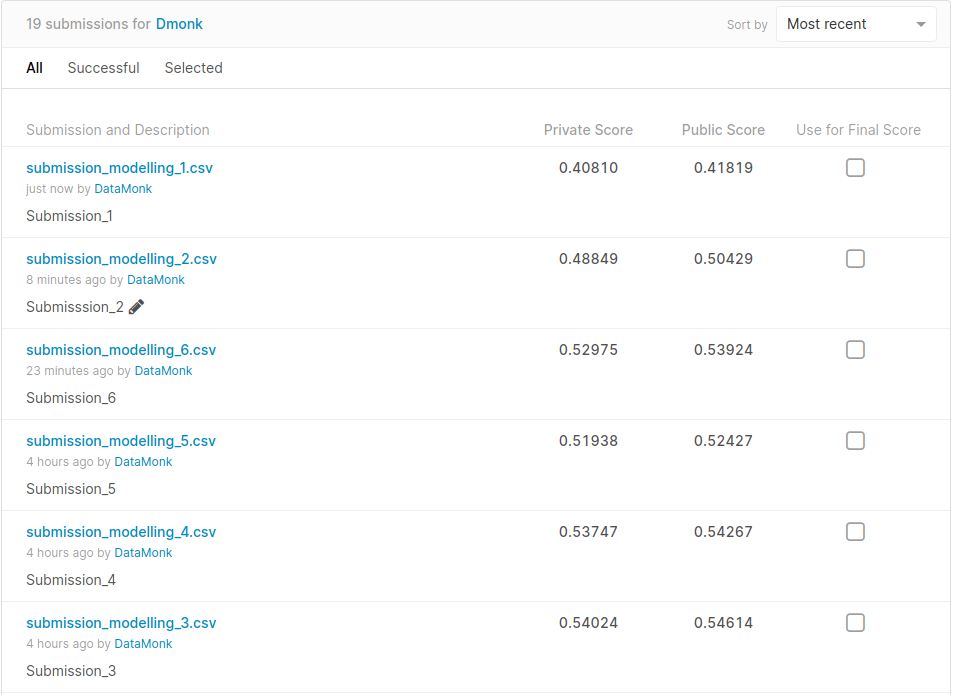

In [133]:
Image(filename = "img/Modelling_1.png" ,width = 1000 , height = 1000 )

In [105]:
print('Average Train score on data in Train.csv data ', np.mean([0.46057, 0.6235, 0.62529, 0.62609, 0.69075, 0.66022]))


print('Average Test score on data in Train.csv data ', np.mean([0.5063, 0.6025, 0.6411, 0.64588 , 0.63069, 0.63721]))


print("Average Public score ", np.mean([0.41819, 0.50429, 0.54614, 0.54267, 0.52427, 0.53924]))


print("Average Private score ", np.mean([0.40810, 0.48849, 0.54024, 0.53747, 0.51938, 0.52975]))

Average Train score on data in Train.csv data  0.6144033333333333
Average Test score on data in Train.csv data  0.6106133333333333
Average Public score  0.5124666666666666
Average Private score  0.5039049999999999


# Observation and Conclusion

1. The average train and test score are 0.6144 and 0.6106 from all the models we have tried.
2. The average Public and Private obtained from Kaggle Platform after the respective file submission's are 0.5124 and 0.5039.
3. The best performance is achieved by Simple Decision Tree Model which is 0.54614 and 0.54024 public and private score.
4. Hence, in this frist approach decision tree outperformed all the other model's, there could be several reasons for that.


## Custom Implementation

In [74]:
### Divide data into 50 : 50 into D1 and D2

D1_X ,D2_X, D1_Y, D2_Y = train_test_split(X_train_featurised, Y_train, test_size = 0.5, random_state = 42)

In [113]:
import random

def train_model(D1_X ,D2_X, D1_Y, D2_Y,num_of_samples,params,base_model,meta_clf):
    '''
    Takes that data as input which is split in D1 and D2 
    
    D1 is than again sampled with replacement to create small samples to train equal amount of base model
    
    (num_of_samples).
    
    D2 is use to predict and create new sample for metaclassifier with Y_actual in D2 as true label
    
    return base_model_dic and metaclassifier
    
    
    '''

    param_choose = 100

    sample_dic = {}

    model_dic = {}

    predict_data = pd.DataFrame()
    ## iterate for num_of_samples 
    for i in range(num_of_samples):
        clf=0
        ### Array of Index to sample the data 
        row_index =  np.array(random.sample(range(0,415),param_choose)).reshape(-1,1)
        ## sample data points from D1
        x_sample = D1_X.values[row_index,].reshape(param_choose,374)
        ## corresponding sampled labels
        y_sample = D1_Y.values[row_index,]
        ## store data of row index and col index of each sample
        sample_dic["sample"+str(i+1)] = row_index ## dictionary of samples
        ## create object as classifier
        clf = base_model() ##DecisionTreeRegressor(max_depth=3, random_state=42)
        ## fit regressor on sampled data 
        
        ### Saving model of every sampled set 
        model_dic["Model"+str(i+1)] = clf.fit(x_sample,y_sample)
        #GridSearchCV(Ridge(),param_grid= params, scoring='r2').fit(x_sample,\
                                                                # y_sample).best_estimator_ 
        ## predict using D2 data
        predict_data['Model'+str(i+1)] = model_dic["Model"+str(i+1)].predict(D2_X.values)

    ## create 
    predict_data['Y_actual'] = D2_Y.values
    

    meta_clf = GridSearchCV(meta_clf,param_grid= params, scoring='r2').fit(predict_data.drop(['Y_actual'],axis=1),\
                                                                 predict_data.Y_actual).best_estimator_ 

    return model_dic, meta_clf, predict_data

In [167]:
def evaluate(model_dic,meta_clf,data_predict, num_of_samples):
    """
    function to evaluate train model
    
    base model : model_dic
    
    meta classifier : meta_clf
    
    num_of_samples
    
    """

    evalue_df = pd.DataFrame()

    for i in range(num_of_samples):

        evalue_df['Model'+str(i+1)] = model_dic["Model"+str(i+1)].predict(data_predict)

    return meta_clf.predict(evalue_df)

###  Base Model : Decision Tree ; Meta Classifier : Lasso

In [152]:
import random
from sklearn.linear_model import Ridge,Lasso

In [89]:
### no of estimators to create

params = {'alpha':[.00001, .0001, .001, .01, 0, 1, 10,100, 1000, 10000, 100000, 500000 ],\
             "fit_intercept": [True, False]}

base_model = DecisionTreeRegressor(max_depth=3, random_state=42)

r2_score_lst = []

for i in [30, 50, 80, 100, 200, 300, 500]:

    ### train the model 
    model_dic, meta_clf = train_model(D1_X ,D2_X, D1_Y, D2_Y,i,params,\
                        DecisionTreeRegressor(max_depth=3, random_state=42),Lasso())

    ### r2_score 
    r2_score_lst.append(r2_score(Y_test,evaluate(model_dic,meta_clf,X_test_featurised,i)))

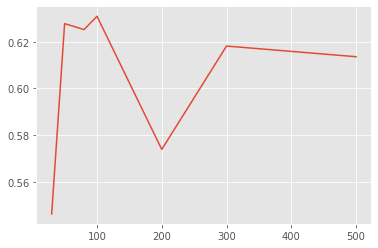

In [90]:
plt.plot([30, 50, 80, 100, 200, 300, 500],r2_score_lst)
plt.show()


In [144]:
num_of_samples = 100

params = {'alpha':[.00001, .0001, .001, .01, 0, 1, 10,100, 1000, 10000, 100000, 500000 ],\
             "fit_intercept": [True, False]}


model_dic, meta_clf = train_model(D1_X ,D2_X, D1_Y, D2_Y, num_of_samples,params,\
                        DecisionTreeRegressor(max_depth=3, random_state=42),Lasso())

print('Train r2_score :: ',r2_score(Y_train,evaluate(model_dic,meta_clf,X_train_featurised,num_of_samples)))
print('Test r2_score :: ',r2_score(Y_test,evaluate(model_dic,meta_clf,X_test_featurised,num_of_samples)))

Train r2_score ::  0.5976221563971347
Test r2_score ::  0.6272951317014197


In [145]:
import pickle

base_filename = 'Base Model : Decision Tree ; Meta Classifier : Lasso/base_model.sav'
pickle.dump(model_dic, open(base_filename, 'wb'))


meta_filename = 'Base Model : Decision Tree ; Meta Classifier : Lasso/meta_model.sav'
pickle.dump(meta_clf, open(meta_filename, 'wb'))
 
# some time later...
 
# load the model from disk
base_model = pickle.load(open(base_filename, 'rb'))

meta_model = pickle.load(open(meta_filename, 'rb'))

In [146]:
Y_pred_Custom_1 = evaluate(model_dic,meta_clf,pd.concat([final_test,decompose_test], axis=1).drop(zero_value_feat,axis=1),num_of_samples)

y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_Custom_1

y_final.to_csv('submission_modelling_7.csv', index= False)

In [92]:
meta_clf

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

###  Base Model : Lasso  ; Meta Classifier : Decision Tree

In [102]:
#params = {'alpha':[.00001, .0001, .001, .01, 0, 1, 10,100, 1000, 10000, 100000, 500000 ],\
 #            "fit_intercept": [True, False]}

#base_model = DecisionTreeRegressor(max_depth=3, random_state=42)

### parameter's to tune

max_depth = [3, 4, 5, 8, 15, 25, 30, 50, 100]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10, 20, 30] 

### parameter dictionary used to pass
params = dict( max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

params = {}

r2_score_lst = []

for i in [30, 50, 80, 100, 200, 300, 500]:

    ### train the model 
    model_dic, meta_clf = train_model(D1_X ,D2_X, D1_Y, D2_Y,i,params,\
                        Lasso(), DecisionTreeRegressor( max_depth=3,random_state=42))

    ### r2_score 
    r2_score_lst.append(r2_score(Y_test,evaluate(model_dic,meta_clf,X_test_featurised,i)))

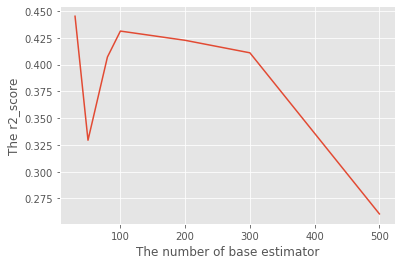

In [103]:
plt.plot([30, 50, 80, 100, 200, 300, 500],r2_score_lst)
plt.xlabel('The number of base estimator')
plt.ylabel('The r2_score')
plt.show()

In [133]:
num_of_samples = 100

params = dict( max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

model_dic, meta_clf = train_model(D1_X ,D2_X, D1_Y, D2_Y, num_of_samples,params,\
                        Lasso(), DecisionTreeRegressor(max_depth=3, random_state=42))

print('Train r2_score :: ',r2_score(Y_train,evaluate(model_dic,meta_clf,X_train_featurised,num_of_samples)))
print('Test r2_score :: ',r2_score(Y_test,evaluate(model_dic,meta_clf,X_test_featurised,num_of_samples)))

Train r2_score ::  0.337373762562197
Test r2_score ::  0.41799086395088003


In [136]:
base_filename = 'Base Model : Lasso ; Meta Classifier : Decision Tree/base_model.sav'
pickle.dump(model_dic, open(base_filename, 'wb'))


meta_filename = 'Base Model : Lasso ; Meta Classifier : Decision Tree/meta_model.sav'
pickle.dump(meta_clf, open(meta_filename, 'wb'))
 
# some time later...
 
# load the model from disk
base_model = pickle.load(open(base_filename, 'rb'))

meta_model = pickle.load(open(meta_filename, 'rb'))

In [137]:
Y_pred_Custom_2 = evaluate(model_dic,meta_clf,pd.concat([final_test,decompose_test],\
                                                        axis=1).drop(zero_value_feat,axis=1),num_of_samples)

y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_Custom_2

y_final.to_csv('submission_modelling_8.csv', index= False)

###  Base Model : Decision Tree ; Meta Classifier : Ridge Regressor

In [111]:
params = {'alpha':[.00001, .0001, .001, .01, 0, 1, 10,100, 1000, 10000, 100000, 500000 ],\
             "fit_intercept": [True, False]}

r2_score_lst = []

for i in [30, 50, 80, 100, 200, 300, 500]:

    ### train the model 
    model_dic, meta_clf = train_model(D1_X ,D2_X, D1_Y, D2_Y,i,params,\
                        DecisionTreeRegressor(max_depth=3, random_state=42),Ridge())

    ### r2_score 
    r2_score_lst.append(r2_score(Y_test,evaluate(model_dic,meta_clf,X_test_featurised,i)))

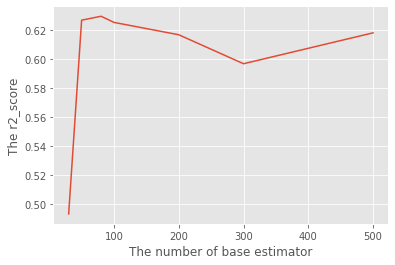

In [110]:
plt.plot([30, 50, 80, 100, 200, 300, 500],r2_score_lst)
plt.xlabel('The number of base estimator')
plt.ylabel('The r2_score')
plt.show()

In [148]:
num_of_samples = 100

params = {'alpha':[.00001, .0001, .001, .01, 0, 1, 10,100, 1000, 10000, 100000, 500000 ],\
             "fit_intercept": [True, False]}

model_dic, meta_clf = train_model(D1_X ,D2_X, D1_Y, D2_Y,num_of_samples,params,\
                        DecisionTreeRegressor(max_depth=3, random_state=42),Ridge())

print('Train r2_score :: ',r2_score(Y_train,evaluate(model_dic,meta_clf,X_train_featurised,num_of_samples)))
print('Test r2_score :: ',r2_score(Y_test,evaluate(model_dic,meta_clf,X_test_featurised,num_of_samples)))

Train r2_score ::  0.614931845895948
Test r2_score ::  0.6333276698392729


In [149]:
base_filename = 'Base Model : Decision Tree ; Meta Classifier : Ridge Regressor/base_model.sav'
pickle.dump(model_dic, open(base_filename, 'wb'))


meta_filename = 'Base Model : Decision Tree ; Meta Classifier : Ridge Regressor/meta_model.sav'
pickle.dump(meta_clf, open(meta_filename, 'wb'))
 
# some time later...
 
# load the model from disk
base_model = pickle.load(open(base_filename, 'rb'))

meta_model = pickle.load(open(meta_filename, 'rb'))

In [150]:
Y_pred_Custom_2 = evaluate(model_dic,meta_clf,pd.concat([final_test,decompose_test],\
                                                        axis=1).drop(zero_value_feat,axis=1),num_of_samples)

y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_Custom_2

y_final.to_csv('submission_modelling_9.csv', index= False)

### Kaggle Submissions Scores 

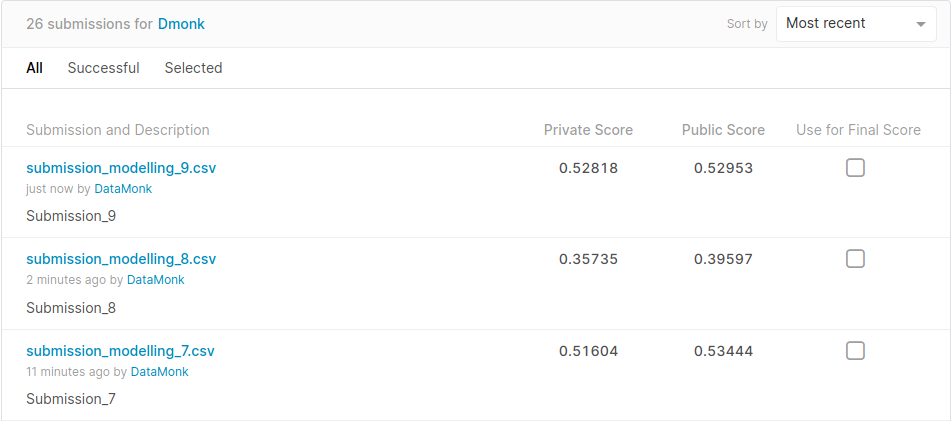

In [152]:
from IPython.display import Image

Image(filename = "img/Modelling_2.png" ,width = 1000 , height = 800 )

In [156]:
Table = PrettyTable()

row_names = ['LinearRegressor','SupportVectorRegressor','DecisonTreeRegressor','RandomForest',\
             'XGBRegressor','CatBoostRegressor','Base:DecisionTree; MetaClf: Lasso', \
             'Base:Lasso ; MetaClf: DecisionTree',\
             'Base:DecisionTree ; MetaCLf:Ridge Regressor']

#Train_score = [r2, 0.79385, 0.6485, 0.6907, 0.67082]

#Test_score = [0.311465, 0.5850, 0.63929 , 0.63069, 0.63721]

Table.add_column("Model",row_names)

Table.add_column('Train R2score',[0.46057, 0.6235, 0.62529, 0.62609, 0.69075, 0.66022, 0.59762, 0.33737, 0.61493])

Table.add_column('Test R2score',[0.5063, 0.6025, 0.6411, 0.64588 , 0.63069, 0.63721, 0.62729, 0.41799, 0.63332])

Table.add_column('Public_Score',[0.41819, 0.50429, 0.54614, 0.54267, 0.52427, 0.53924, 0.53444, 0.39597, 0.52953])

Table.add_column('Private_Score',[0.40810, 0.48849, 0.54024, 0.53747, 0.51938, 0.52975, 0.51604, 0.35735, 0.52818])

print(Table)

+---------------------------------------------+---------------+--------------+--------------+---------------+
|                    Model                    | Train R2score | Test R2score | Public_Score | Private_Score |
+---------------------------------------------+---------------+--------------+--------------+---------------+
|               LinearRegressor               |    0.46057    |    0.5063    |   0.41819    |     0.4081    |
|            SupportVectorRegressor           |     0.6235    |    0.6025    |   0.50429    |    0.48849    |
|             DecisonTreeRegressor            |    0.62529    |    0.6411    |   0.54614    |    0.54024    |
|                 RandomForest                |    0.62609    |   0.64588    |   0.54267    |    0.53747    |
|                 XGBRegressor                |    0.69075    |   0.63069    |   0.52427    |    0.51938    |
|              CatBoostRegressor              |    0.66022    |   0.63721    |   0.53924    |    0.52975    |
|      Bas

## Observation and Conclusion

1. The kaggle score from custom implementation are obtained and from those model's Base: Decision Tree and MetaCLf: Ridge Regressor gives the best score amongst the custom implementation.
2. But still simple Deceision Tree is by far the best model with 0.54614 as public and 0.54024 as private score.

## Neural Network Implementaton


### Base Model: Ridge Regression and MetaClassifier: Neural Network

In [303]:
import random

def train_model_nn(D1_X ,D2_X, D1_Y, D2_Y,num_of_samples,params,base_model):
    '''
    Takes that data as input which is split in D1 and D2 
    
    D1 is than again sampled with replacement to create small samples to train equal amount of base model
    
    (num_of_samples).
    
    We are not training here metaclassfier
    
    '''

    param_choose = 100

    sample_dic = {}

    model_dic = {}

    predict_data = pd.DataFrame()
    ## iterate for num_of_samples 
    for i in range(num_of_samples):
        clf=0
        ### Array of Index to sample the data 
        row_index =  np.array(random.sample(range(0,415),param_choose))
        ## sample data points from D1
        x_sample = D1_X.values[row_index,].reshape(param_choose,374)
        ## corresponding sampled labels
        y_sample = D1_Y.values[row_index,]
        ## store data of row index and col index of each sample
        sample_dic["sample"+str(i+1)] = row_index ## dictionary of samples
        ## create object as classifier
       ##DecisionTreeRegressor(max_depth=3, random_state=42)
        ## fit regressor on sampled data 
        
        best_model = GridSearchCV(base_model(),param_grid= params, scoring='r2').fit(x_sample,y_sample).best_estimator_
        
        #best_model = Ridge(alpha=param['alpha'] ,fit_intercept=param['fit_intercept'])

        #best_model.fit(x_sample,y_sample)
        model_dic["Model"+str(i+1)] = best_model.fit(x_sample, y_sample)
        #
        ## predict using D2 data
        predict_data['Model'+str(i+1)] = model_dic["Model"+str(i+1)].predict(D2_X.values)

    ## create 
    predict_data['Y_actual'] = D2_Y.values
    

    return model_dic, meta_clf, predict_data

### Training the Base Learners: Ridge Regressor

In [250]:
num_of_samples = 300

params = {'alpha':[.00001, .0001, .001, .01, 0, 1, 10,100, 1000, 10000, 100000, 500000 ],\
             "fit_intercept": [True, False]}

model_dic, meta_clf, predict_data = train_model_nn(D1_X ,D2_X, D1_Y, D2_Y,num_of_samples,params, Ridge)

In [251]:
predict_data

,Model1,Model2,Model3,Model4,Model5,Model6,Model7,Model8,Model9,Model10,...,Model292,Model293,Model294,Model295,Model296,Model297,Model298,Model299,Model300,Y_actual
0,94.822256,91.446405,93.780257,97.814513,100.691704,92.825219,96.485451,94.776254,90.610817,93.508165,...,91.747572,92.464062,95.099200,94.544402,95.908547,90.521909,95.820181,90.722272,92.550694,89.34
1,91.817653,99.299759,93.718048,91.661492,98.627034,91.112454,100.008002,88.349274,106.623987,96.588234,...,97.313435,98.440166,94.544040,95.179615,96.287412,94.307252,97.681857,96.540359,97.488298,88.69
2,107.859374,111.229419,103.504837,104.823459,103.538389,104.281176,106.295098,107.413071,105.563492,101.251151,...,108.696118,106.874576,113.471123,102.047361,105.468697,104.384857,110.453047,102.427363,109.084599,105.15
3,105.041850,106.488526,104.671893,112.220587,105.014703,103.028127,101.812932,109.415891,93.977892,105.289683,...,101.409348,109.234172,99.008336,109.620894,109.794750,109.732989,111.189349,105.717927,100.797229,114.07
4,93.305327,94.746271,93.525683,92.062739,102.567412,94.157254,90.523023,93.975672,90.242718,88.428504,...,90.418574,89.109387,87.328551,87.109258,93.659893,86.192512,97.000112,89.101461,92.716946,92.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,92.056092,95.143066,99.189662,96.673612,93.944395,92.446865,96.731635,90.392076,98.460768,95.974507,...,92.905567,93.682476,90.295522,93.982006,96.753098,99.941037,98.223958,95.111865,92.755807,110.07
412,78.338607,78.770769,75.453119,78.376906,79.900574,79.796260,78.218537,81.791604,98.823409,77.365334,...,81.958813,79.590115,77.608083,86.488443,75.633862,79.590803,79.264018,80.173211,85.793823,76.10
413,88.343020,89.112517,89.967631,92.204465,92.643630,92.398594,89.691788,92.158011,88.743354,85.942143,...,85.866561,89.463901,89.168832,90.097297,94.643135,90.167394,90.356486,87.378146,88.108078,89.58
414,107.604233,114.235105,110.270457,109.839561,115.254022,103.509491,108.995476,110.396933,110.521551,110.581259,...,110.995507,112.191109,113.129297,113.120608,109.148948,112.414297,118.070597,107.670096,109.448660,105.61


In [252]:
X = predict_data.drop(['Y_actual'],axis=1)

Y = predict_data.Y_actual

X.shape, Y.shape

((416, 300), (416,))

### Training Metaclassifier: Neural Network

In [253]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow

In [294]:
clear_session()

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(400, kernel_initializer='normal',input_dim = num_of_samples, activation='relu'))
# The Hidden Layers :
#NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))


my_callbacks = [
    tensorflow.keras.callbacks.EarlyStopping(patience=5),
    tensorflow.keras.callbacks.ModelCheckpoint(filepath='weights/model.{epoch:02d}-{val_loss:.2f}.h5'),
    tensorflow.keras.callbacks.TensorBoard(log_dir='./logs'),
]

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer= tensorflow.keras.optimizers.RMSprop(learning_rate=0.00001,\
    rho=0.9, momentum=0.0, epsilon=1e-07, centered=False, name="RMSprop"), metrics=['mean_absolute_error'])

NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               120400    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 160,601
Trainable params: 160,601
Non-trainable params: 0
_________________________________________________________________


In [295]:
NN_model.fit(X, Y, epochs= 100, batch_size= 100 , validation_split = 0.3, callbacks= my_callbacks)

Train on 291 samples, validate on 125 samples
Epoch 1/100
291/291 [==============================] - 0s 896us/sample - loss: 106.7505 - mean_absolute_error: 106.7505 - val_loss: 100.3734 - val_mean_absolute_error: 100.3734
Epoch 2/100
291/291 [==============================] - 0s 68us/sample - loss: 99.9155 - mean_absolute_error: 99.9155 - val_loss: 95.1918 - val_mean_absolute_error: 95.1918
Epoch 3/100
291/291 [==============================] - 0s 66us/sample - loss: 94.9965 - mean_absolute_error: 94.9965 - val_loss: 90.8029 - val_mean_absolute_error: 90.8029
Epoch 4/100
291/291 [==============================] - 0s 72us/sample - loss: 90.7163 - mean_absolute_error: 90.7163 - val_loss: 86.8045 - val_mean_absolute_error: 86.8045
Epoch 5/100
291/291 [==============================] - 0s 68us/sample - loss: 86.7633 - mean_absolute_error: 86.7633 - val_loss: 83.0252 - val_mean_absolute_error: 83.0252
Epoch 6/100
291/291 [==============================] - 0s 66us/sample - loss: 83.0059 - m

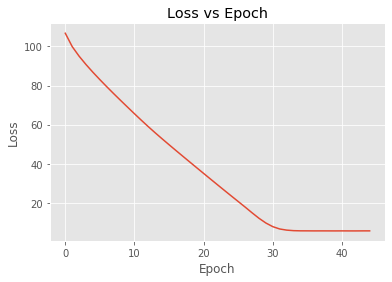

In [339]:
plt.plot(NN_model.history.history['loss'])
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [134]:
## NN_model.load_weights('weights/model.16-4.88.h5')

In [296]:
## creating the dataframe to pass the metaclassifier
evalue_df = pd.DataFrame()

for i in range(num_of_samples):

    evalue_df['Model'+str(i+1)] = model_dic["Model"+str(i+1)].predict(X_test_featurised)

evalue_df

,Model1,Model2,Model3,Model4,Model5,Model6,Model7,Model8,Model9,Model10,...,Model291,Model292,Model293,Model294,Model295,Model296,Model297,Model298,Model299,Model300
0,112.299827,108.190612,113.025784,116.183200,107.311291,108.084246,108.102558,110.602944,94.621478,105.952553,...,102.923360,106.414616,105.834094,106.931827,110.550656,110.305243,108.585417,109.226119,108.120081,106.457191
1,99.838194,90.259151,99.124911,100.532369,87.559900,97.489870,99.286601,96.538013,94.297676,91.623701,...,95.700636,92.661321,94.490087,94.976980,97.839597,98.074871,98.736958,98.475016,98.167521,97.967128
2,113.565514,117.231379,109.405638,118.640802,115.328386,110.049447,117.042520,115.033284,104.939160,108.844075,...,109.008813,116.553961,117.446956,114.005046,111.121560,117.659595,119.117017,115.416025,118.957826,118.637727
3,100.612666,106.475365,106.000912,107.906255,105.279614,100.718695,101.005288,104.896494,102.882917,108.815175,...,108.934873,101.634818,107.645263,103.118597,98.111330,104.076404,111.528332,105.162073,101.388675,104.202772
4,111.150925,107.717495,114.545697,111.350137,105.024655,108.321950,106.556502,112.234403,97.806523,102.633416,...,108.556205,107.675413,109.214501,107.426018,106.909801,108.296977,108.996929,111.779403,107.381831,105.129641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,110.350178,109.631108,114.733912,108.971838,109.362409,103.375669,107.669276,112.949942,102.932131,109.555915,...,106.410258,104.737719,107.080538,108.254915,112.681133,111.773704,118.155536,111.537582,108.615863,109.751348
3324,102.345044,102.302580,103.679314,103.772185,106.183783,100.674061,108.712976,105.672574,102.745561,99.185382,...,104.095422,103.114664,105.349140,104.512975,100.529494,102.681456,108.904687,101.982889,102.608524,102.921345
3325,82.913333,82.080248,80.455102,77.065280,83.920138,81.802963,75.567885,77.311191,104.558804,87.317571,...,87.032844,82.863492,78.438020,81.705831,84.843693,84.606602,78.446418,83.537107,78.723117,86.957651
3326,100.505291,101.897619,96.018496,97.119321,110.833807,98.608371,103.023557,97.083725,99.899330,98.555750,...,108.006160,104.025656,103.029588,100.868435,98.472519,104.728555,96.749376,99.054955,98.818825,103.671206


In [297]:
r2_score(Y_test,NN_model.predict(evalue_df))

0.5468107163713067

In [281]:
## creating the dataframe to pass the metaclassifier
evalue_df = pd.DataFrame()

for i in range(num_of_samples):

    evalue_df['Model'+str(i+1)] = model_dic["Model"+str(i+1)].predict(submission_df)

evalue_df

,Model1,Model2,Model3,Model4,Model5,Model6,Model7,Model8,Model9,Model10,...,Model291,Model292,Model293,Model294,Model295,Model296,Model297,Model298,Model299,Model300
0,74.266241,76.362632,74.695315,76.360778,80.722337,77.420930,80.046548,80.847562,94.142377,75.260753,...,69.822817,82.212164,77.106598,74.838010,80.658580,75.811794,79.317234,74.289298,79.025309,80.832930
1,97.762803,95.290347,95.964878,99.786290,94.897347,94.859069,99.528454,94.828283,95.128734,96.777415,...,94.705323,102.592143,100.268389,93.959273,95.343203,97.215422,92.375948,98.982337,95.306781,93.921587
2,82.862586,80.236702,81.557579,84.492800,83.910921,79.208305,84.090218,82.335389,96.614769,80.191659,...,81.153223,89.973012,83.375464,84.412282,82.583369,88.942165,82.578028,82.493801,79.124477,88.617891
3,79.604747,77.153660,78.775845,77.465390,78.599263,80.209614,78.898591,78.766002,97.138894,78.343158,...,82.816742,83.498788,79.706681,77.312091,80.297354,77.508085,80.599949,77.530639,78.143741,84.242138
4,106.332264,105.388031,112.930136,112.631349,106.146005,101.686208,100.526653,105.991715,91.267875,104.716754,...,110.774211,102.612585,110.121111,101.123417,107.648931,109.225342,106.508586,112.362256,104.083731,104.086831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,108.485300,110.377088,102.348240,103.105939,109.831834,103.330442,108.535467,103.786951,111.596330,108.472862,...,107.307996,103.275923,112.761285,108.852094,108.378132,101.276405,104.287209,113.175725,102.994893,107.773200
4205,96.760364,97.365076,93.259459,98.297203,105.672585,93.563810,102.947970,89.908022,102.863190,93.710701,...,98.208431,99.957529,97.886794,99.042044,95.118876,102.381794,90.287748,100.398672,94.003613,96.092587
4206,89.913433,94.413825,87.036632,92.341138,105.412837,95.726592,97.375789,96.465728,96.440240,89.438303,...,91.087536,88.690512,94.554842,90.611570,96.662774,98.500475,87.546836,97.213507,88.903292,88.029871
4207,108.291591,111.165384,111.193978,105.629380,112.090805,99.615022,110.110881,107.557927,108.875165,108.623392,...,106.987959,111.745394,111.159862,111.517862,113.542748,109.927580,108.916618,113.464693,106.474627,112.045609


In [282]:
Y_pred_NN  = NN_model.predict(evalue_df)

In [283]:
y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_NN

y_final.to_csv('submission_modelling_10.csv', index= False)

In [342]:
print('THe Public score {} and Private score {} for NN Regressor as metaclassifier and Ridge Regression and Base Learner '.format(0.45571, 0.47559))

THe Public score 0.45571 and Private score 0.47559 for NN Regressor as metaclassifier and Ridge Regression and Base Learner 


### Base Model: DecisionTree and MetaClassifier: Neural Network

### Traininge the base learners

In [311]:
num_of_samples = 300

min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10, 20, 30] 

params = dict( min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)


model_dic, meta_clf, predict_data = train_model_nn(D1_X ,D2_X, D1_Y, D2_Y,num_of_samples,params, DecisionTreeRegressor)

In [312]:
predict_data

,Model1,Model2,Model3,Model4,Model5,Model6,Model7,Model8,Model9,Model10,...,Model292,Model293,Model294,Model295,Model296,Model297,Model298,Model299,Model300,Y_actual
0,93.812222,89.788182,93.253455,88.491818,89.859167,94.859310,92.328333,89.263333,92.031613,95.257193,...,94.153684,88.227692,88.356667,95.488947,92.991429,87.732857,89.227273,94.536000,93.340000,89.34
1,91.590000,87.246667,93.253455,88.491818,93.361818,94.859310,107.772500,88.428000,95.977097,95.257193,...,94.153684,96.088333,97.365000,95.488947,92.991429,87.732857,94.956923,91.655833,93.340000,88.69
2,99.788571,106.858889,109.650222,108.788649,109.655000,108.469524,118.484000,99.977500,109.158947,109.826047,...,108.572558,100.652222,102.428750,108.849302,103.497857,101.358462,99.260000,109.890000,110.924318,105.15
3,107.181250,107.700000,109.650222,108.788649,110.275000,108.469524,106.982857,119.910000,109.158947,109.826047,...,108.572558,111.528182,112.155556,108.849302,109.045714,107.682308,112.241538,112.383333,110.924318,114.07
4,96.485000,100.430000,93.253455,95.821500,93.022857,94.859310,89.113750,88.894000,92.031613,95.257193,...,94.153684,88.227692,88.356667,95.488947,101.838000,92.718000,89.227273,84.511667,93.340000,92.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,89.223333,87.246667,93.253455,88.491818,93.361818,94.859310,107.772500,88.428000,92.031613,95.257193,...,94.153684,96.088333,97.365000,95.488947,89.893750,90.728462,94.956923,91.655833,93.340000,110.07
412,78.174000,80.417500,93.253455,88.491818,78.423750,94.859310,76.413333,78.746000,92.031613,95.257193,...,94.153684,75.052500,75.722500,95.488947,80.226000,78.913333,79.560000,84.511667,93.340000,76.10
413,89.293333,92.520000,93.253455,95.821500,89.859167,94.859310,89.545000,88.894000,92.031613,95.257193,...,94.153684,88.227692,98.860000,95.488947,87.940000,92.718000,89.227273,94.536000,93.340000,89.58
414,116.000000,113.633846,109.650222,108.788649,110.275000,108.469524,106.982857,106.198333,109.158947,109.826047,...,108.572558,107.300000,112.155556,108.849302,112.614000,119.035000,122.825000,112.383333,110.924318,105.61


In [313]:
X = predict_data.drop(['Y_actual'],axis=1)

Y = predict_data.Y_actual

X.shape, Y.shape

((416, 300), (416,))

In [323]:
clear_session()

NN_model_2 = Sequential()

# The Input Layer :
NN_model_2.add(Dense(300, kernel_initializer='normal',input_dim = num_of_samples, activation='relu'))
# The Hidden Layers :
#NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model_2.add(Dense(100, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model_2.add(Dense(1, kernel_initializer='normal',activation='linear'))


my_callbacks = [
    tensorflow.keras.callbacks.EarlyStopping(patience=5),
    tensorflow.keras.callbacks.ModelCheckpoint(filepath='weights_model_2/model.{epoch:02d}-{val_loss:.2f}.h5'),
    tensorflow.keras.callbacks.TensorBoard(log_dir='./logs'),
]

# Compile the network :
NN_model_2.compile(loss='mean_absolute_error', optimizer= tensorflow.keras.optimizers.RMSprop(learning_rate=0.00001,\
    rho=0.9, momentum=0.0, epsilon=1e-07, centered=False, name="RMSprop"), metrics=['mean_absolute_error'])

NN_model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               90300     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 120,501
Trainable params: 120,501
Non-trainable params: 0
_________________________________________________________________


In [324]:
NN_model_2.fit(X, Y, epochs= 100, batch_size= 100 , validation_split = 0.2, callbacks= my_callbacks)

Train on 332 samples, validate on 84 samples
Epoch 1/100
332/332 [==============================] - 0s 788us/sample - loss: 120.3749 - mean_absolute_error: 120.3749 - val_loss: 114.6476 - val_mean_absolute_error: 114.6476
Epoch 2/100
332/332 [==============================] - 0s 60us/sample - loss: 113.7114 - mean_absolute_error: 113.7114 - val_loss: 109.6920 - val_mean_absolute_error: 109.6920
Epoch 3/100
332/332 [==============================] - 0s 57us/sample - loss: 109.0341 - mean_absolute_error: 109.0341 - val_loss: 105.5264 - val_mean_absolute_error: 105.5264
Epoch 4/100
332/332 [==============================] - 0s 66us/sample - loss: 105.0112 - mean_absolute_error: 105.0112 - val_loss: 101.8158 - val_mean_absolute_error: 101.8158
Epoch 5/100
332/332 [==============================] - 0s 59us/sample - loss: 101.3764 - mean_absolute_error: 101.3764 - val_loss: 98.3739 - val_mean_absolute_error: 98.3739
Epoch 6/100
332/332 [==============================] - 0s 59us/sample - loss

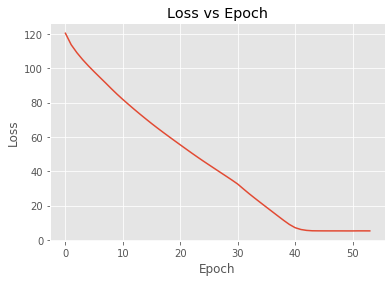

In [338]:
plt.plot(NN_model_2.history.history['loss'])
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [325]:
## creating the dataframe to pass the metaclassifier
evalue_df = pd.DataFrame()

for i in range(num_of_samples):

    evalue_df['Model'+str(i+1)] = model_dic["Model"+str(i+1)].predict(X_test_featurised)

evalue_df

,Model1,Model2,Model3,Model4,Model5,Model6,Model7,Model8,Model9,Model10,...,Model291,Model292,Model293,Model294,Model295,Model296,Model297,Model298,Model299,Model300
0,117.545000,107.700000,109.650222,108.788649,110.275000,108.469524,107.386667,109.804000,109.158947,109.826047,...,111.619000,108.572558,111.528182,116.746667,108.849302,109.045714,92.718000,112.241538,84.511667,110.924318
1,100.145556,95.648889,93.253455,95.821500,89.859167,94.859310,99.720000,88.894000,92.031613,95.257193,...,92.978462,94.153684,92.920000,97.900000,95.488947,87.940000,92.718000,90.972000,94.536000,93.340000
2,117.545000,113.633846,109.650222,108.788649,110.275000,108.469524,118.484000,119.910000,109.158947,109.826047,...,114.915625,108.572558,111.528182,124.543333,108.849302,116.860000,129.190000,112.241538,112.383333,110.924318
3,107.181250,107.700000,109.650222,108.788649,110.275000,108.469524,106.982857,106.198333,109.158947,109.826047,...,114.915625,108.572558,111.528182,105.510000,108.849302,116.860000,107.682308,112.241538,112.383333,110.924318
4,99.788571,120.735000,109.650222,108.788649,110.275000,108.469524,107.386667,109.804000,109.158947,109.826047,...,111.619000,108.572558,111.528182,116.746667,108.849302,116.860000,129.190000,112.241538,107.841667,110.924318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,117.545000,120.756667,109.650222,108.788649,110.275000,108.469524,107.386667,119.910000,109.158947,109.826047,...,114.915625,108.572558,119.520000,124.543333,108.849302,109.045714,107.682308,116.607500,112.383333,110.924318
3324,99.788571,106.858889,109.650222,108.788649,102.716923,108.469524,101.488889,99.977500,109.158947,109.826047,...,98.956667,108.572558,100.652222,102.428750,108.849302,103.497857,101.358462,99.260000,99.767857,110.924318
3325,78.174000,80.417500,93.253455,88.491818,78.423750,94.859310,76.413333,78.746000,95.977097,95.257193,...,98.956667,94.153684,75.052500,75.722500,95.488947,80.226000,78.913333,79.560000,84.511667,93.340000
3326,91.590000,87.246667,93.253455,88.491818,93.361818,94.859310,97.170000,96.001667,95.977097,95.257193,...,95.005000,94.153684,92.920000,96.631667,95.488947,94.338000,87.732857,94.956923,89.788333,93.340000


In [326]:
r2_score(Y_test,NN_model.predict(evalue_df))

0.5784041715414805

In [327]:
## creating the dataframe to pass the metaclassifier
evalue_df = pd.DataFrame()

for i in range(num_of_samples):

    evalue_df['Model'+str(i+1)] = model_dic["Model"+str(i+1)].predict(submission_df)

evalue_df

,Model1,Model2,Model3,Model4,Model5,Model6,Model7,Model8,Model9,Model10,...,Model291,Model292,Model293,Model294,Model295,Model296,Model297,Model298,Model299,Model300
0,78.174000,80.417500,93.253455,88.491818,78.423750,94.859310,76.413333,78.746000,92.031613,95.257193,...,98.956667,94.153684,75.052500,75.722500,95.488947,80.226000,78.913333,79.560000,84.511667,93.340000
1,101.850000,89.788182,93.253455,100.299524,89.859167,94.859310,89.545000,96.001667,92.031613,95.257193,...,92.978462,94.153684,88.227692,99.737500,95.488947,93.540769,87.732857,89.227273,100.412500,93.340000
2,91.590000,80.417500,93.253455,88.491818,78.423750,94.859310,76.413333,78.746000,92.031613,95.257193,...,98.956667,94.153684,75.052500,75.722500,95.488947,80.226000,78.913333,94.956923,84.511667,93.340000
3,78.174000,80.417500,93.253455,88.491818,78.423750,94.859310,76.413333,78.746000,92.031613,95.257193,...,98.956667,94.153684,75.052500,75.722500,95.488947,80.226000,78.913333,79.560000,84.511667,93.340000
4,116.000000,107.700000,109.650222,108.788649,110.275000,108.469524,106.982857,106.198333,109.158947,109.826047,...,111.619000,108.572558,107.300000,112.155556,108.849302,109.045714,119.035000,122.825000,112.383333,110.924318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,99.788571,106.858889,109.650222,108.788649,102.716923,108.469524,101.488889,99.977500,109.158947,109.826047,...,98.956667,108.572558,100.652222,102.428750,108.849302,103.497857,101.358462,104.246667,109.890000,110.924318
4205,98.605000,89.788182,93.253455,88.491818,97.517500,94.859310,95.122500,98.371667,95.977097,95.257193,...,92.978462,94.153684,92.920000,97.365000,95.488947,94.338000,94.847273,89.227273,89.788333,93.340000
4206,89.293333,92.520000,93.253455,95.821500,90.715000,94.859310,92.328333,88.894000,95.977097,95.257193,...,101.319000,94.153684,92.098000,98.860000,95.488947,92.991429,103.739091,89.227273,97.820000,93.340000
4207,107.181250,120.756667,109.650222,108.788649,110.275000,108.469524,106.982857,106.198333,109.158947,109.826047,...,114.915625,108.572558,107.300000,105.510000,108.849302,112.614000,107.682308,108.587143,112.383333,110.924318


In [329]:
Y_pred_NN  = NN_model_2.predict(evalue_df)

In [330]:
y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_NN

y_final.to_csv('submission_modelling_11.csv', index= False)

In [343]:
print('THe Public score {} and Private score {} for NN Regressor as metaclassifier and Decision Tree as baslearner'.format(0.49415, 0.47447))

THe Public score 0.49415 and Private score 0.47447 for NN Regressor as metaclassifier and Decision Tree as baslearner


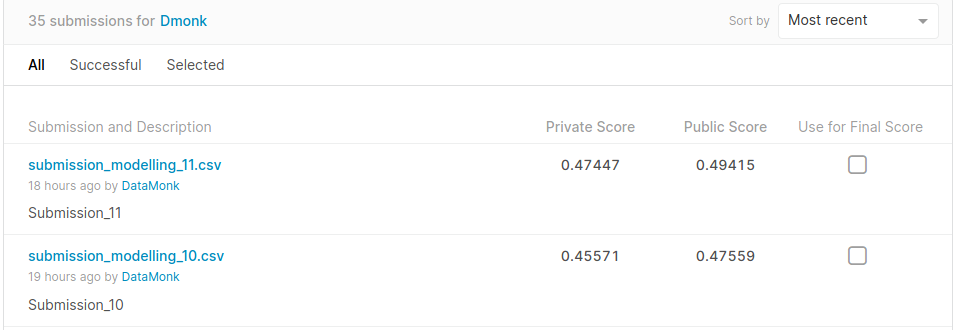

In [138]:
Image(filename = "img/kaggle_sub_10_11.png" ,width = 1000 , height = 1000 )

In [143]:
Table = PrettyTable()

row_names = ['LinearRegressor','SupportVectorRegressor','DecisonTreeRegressor','RandomForest',\
             'XGBRegressor','CatBoostRegressor','Base:DecisionTree; MetaClf: Lasso', \
             'Base:Lasso ; MetaClf: DecisionTree',\
             'Base:DecisionTree ; MetaCLf:Ridge Regressor',
            "Base: RidgeRegressor ; MetaClassifier: MLP",
            "Base: DTRegressor ; MetaClassifier: MLP"]

#Train_score = [r2, 0.79385, 0.6485, 0.6907, 0.67082]

#Test_score = [0.311465, 0.5850, 0.63929 , 0.63069, 0.63721]

Table.add_column("Model",row_names)

Table.add_column('Train R2score',[0.46057, 0.6235, 0.62529, 0.62609, 0.69075, 0.66022, 0.59762, 0.33737, 0.61493, "--","--"])

Table.add_column('Test R2score',[0.5063, 0.6025, 0.6411, 0.64588 , 0.63069, 0.63721, 0.62729, 0.41799, 0.63332,0.54681,0.57840])

Table.add_column('Public_Score',[0.41819, 0.50429, 0.54614, 0.54267, 0.52427, 0.53924, 0.53444, 0.39597, 0.52953, 0.47559, 0.49415])

Table.add_column('Private_Score',[0.40810, 0.48849, 0.54024, 0.53747, 0.51938, 0.52975, 0.51604, 0.35735, 0.52818, 0.45571, 0.47447])

print(Table)

+---------------------------------------------+---------------+--------------+--------------+---------------+
|                    Model                    | Train R2score | Test R2score | Public_Score | Private_Score |
+---------------------------------------------+---------------+--------------+--------------+---------------+
|               LinearRegressor               |    0.46057    |    0.5063    |   0.41819    |     0.4081    |
|            SupportVectorRegressor           |     0.6235    |    0.6025    |   0.50429    |    0.48849    |
|             DecisonTreeRegressor            |    0.62529    |    0.6411    |   0.54614    |    0.54024    |
|                 RandomForest                |    0.62609    |   0.64588    |   0.54267    |    0.53747    |
|                 XGBRegressor                |    0.69075    |   0.63069    |   0.52427    |    0.51938    |
|              CatBoostRegressor              |    0.66022    |   0.63721    |   0.53924    |    0.52975    |
|      Bas

## Observation and Conclusion:

    From above table, by looking at Public and Private score Decision Tree By far is the best model with 0.54614 as Public and 0.54024 as Private score.

